In [1]:
# import lib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import warnings
from matplotlib.ticker import FuncFormatter
warnings.filterwarnings('ignore')

# Disclaimer
This is combined notbook file, you can see the full version on https://github.com/C4PT41N4545/BUSA8000-LuminaTech_Analytics_Project

In [2]:
df_2012 = pd.read_csv('../data/raw/2012_Data.csv', encoding='latin1', low_memory=False)
df_2013 = pd.read_csv('../data/raw/2013_Data.csv', encoding='latin1', low_memory=False)

In [3]:
# Concatenate the two DataFrames
merged_data = pd.concat([df_2012, df_2013], ignore_index=True)

# Display the first few rows of the merged data
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1988382 entries, 0 to 1988381
Data columns (total 41 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   accounting_date           int64  
 1   fiscal_year               int64  
 2   fiscal_month              int64  
 3   calendar_year             int64  
 4   calendar_month            int64  
 5   calendar_day              int64  
 6   company_code              int64  
 7   customer_code             object 
 8   customer_district_code    int64  
 9   item_code                 object 
 10  business_area_code        object 
 11  item_group_code           object 
 12  item_class_code           object 
 13  item_type                 int64  
 14  bonus_group_code          object 
 15  environment_group_code    object 
 16  technology_group_code     object 
 17  commission_group_code     object 
 18  reporting_classification  object 
 19  light_source              object 
 20  warehouse_code          

# Section 1: Data Cleaning

1. Handling Missing Values
- Identifying Missing Data: Determine where missing values occur and why (e.g., data entry errors, collection issues).
- Strategies for Handling Missing Data:
    - Removal: Drop rows or columns with excessive missing values if they don’t significantly affect the analysis.
    - Imputation: Replace missing values using techniques like mean, median, mode, or more sophisticated methods (e.g., regression or k-nearest neighbors).
2. Correcting Inconsistent Data
- Fix inconsistencies in data entries (e.g., different formats for the same value, such as "USA" and "United States").
- Standardize formats for dates, phone numbers, and other data types.
3. Removing Duplicates
- Identify and remove duplicate records, which can skew analysis results and lead to incorrect conclusions.
4. Handling Outliers
- Outliers can distort analysis, especially in statistical modeling. Identify them using visualization techniques (e.g., boxplots).
- Decide whether to remove, transform, or keep outliers based on the context and goals of the analysis.
5. Data Type Conversion
- Ensure that each column has the appropriate data type (e.g., numeric, categorical, datetime).
- Convert data types if needed (e.g., parsing date strings into datetime objects).
6. Normalization and Scaling
- Normalization: Rescale numerical data to fit within a particular range, often [0, 1].
- Standardization: Adjust the data to have a mean of zero and a standard deviation of one, which is important for certain machine learning algorithms.
7. Handling Categorical Variables
- Convert categorical variables to numeric form if required for analysis (e.g., one-hot encoding).
- Combine similar categories to reduce complexity (e.g., grouping rare categories together).
8. Feature Engineering
- Creating New Features: Generate new variables based on existing ones to capture additional insights.
- Dropping Irrelevant Features: Remove features that do not add value or are highly correlated, to avoid multicollinearity.

### 1. Handling Missing Values
- Identifying Missing Data: Determine where missing values occur and why (e.g., data entry errors, collection issues).
- Strategies for Handling Missing Data:
    - Removal: Drop rows or columns with excessive missing values if they don’t significantly affect the analysis.
    - Imputation: Replace missing values using techniques like mean, median, mode, or more sophisticated methods (e.g., regression or k-nearest neighbors).

In [4]:
# check the length of data and rows.
merged_data.shape

(1988382, 41)

In [5]:
# indentifying the null values.
merged_data.isnull().sum()

accounting_date                   0
fiscal_year                       0
fiscal_month                      0
calendar_year                     0
calendar_month                    0
calendar_day                      0
company_code                      0
customer_code                     0
customer_district_code            0
item_code                         0
business_area_code                0
item_group_code                   0
item_class_code                   0
item_type                         0
bonus_group_code                  0
environment_group_code            0
technology_group_code             0
commission_group_code             0
reporting_classification          0
light_source                      0
warehouse_code                    0
abc_class_code                    0
abc_class_volume                  0
business_chain_l1_code            0
business_chain_l1_name            0
contact_method_code               0
salesperson_code                  0
order_type_code             

The null values are shown in column 'item_source_class', which is 1,988,382, the same as the normal data length. This means this column does not use, so we decided to remove  it.

In [6]:
# remove null values.
merged_data.drop('item_source_class', axis=1, inplace=True)

In [7]:
# recheck null value after remove
merged_data.isnull().sum()

accounting_date             0
fiscal_year                 0
fiscal_month                0
calendar_year               0
calendar_month              0
calendar_day                0
company_code                0
customer_code               0
customer_district_code      0
item_code                   0
business_area_code          0
item_group_code             0
item_class_code             0
item_type                   0
bonus_group_code            0
environment_group_code      0
technology_group_code       0
commission_group_code       0
reporting_classification    0
light_source                0
warehouse_code              0
abc_class_code              0
abc_class_volume            0
business_chain_l1_code      0
business_chain_l1_name      0
contact_method_code         0
salesperson_code            0
order_type_code             0
market_segment              0
value_sales                 0
value_cost                  0
value_quantity              0
value_price_adjustment      0
currency  

We expected that each row in each column would be unique, as each row represents a specific order item from a customer. If there are duplicate rows in any column, it could indicate an issue with data accuracy.

In [8]:
# check the length of data and rows.
merged_data.shape

(1988382, 40)

### 2. Correcting Inconsistent Data
- Fix inconsistencies in data entries (e.g., different formats for the same value, such as "USA" and "United States").
- Standardize formats for dates, phone numbers, and other data types.

First, we want to check whether the accounting date, fiscal year, and calendar year are consistent. However, the accounting date is not in the same standardised format as the others, so we will convert it to match the same format before checking consistency.

In [9]:
# Convert 'accounting_date' to datetime format
merged_data['accounting_date'] = pd.to_datetime(merged_data['accounting_date'], format='%Y%m%d')

# Create separate columns for year, month, and day from the datetime object
merged_data['accounting_year'] = merged_data['accounting_date'].dt.year
merged_data['accounting_month'] = merged_data['accounting_date'].dt.month
merged_data['accounting_day'] = merged_data['accounting_date'].dt.day

# Display the first few rows to verify the results
merged_data.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,currency,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time,accounting_year,accounting_month,accounting_day
0,2012-05-09,2012,11,2012,5,9,101,411800601,410,GENIE8WWWBC,...,AUD,2217887,1,20120509,2865354,20120509,49:58.7,2012,5,9
1,2012-02-16,2012,8,2012,2,16,101,361000403,300,GENIE8WWWBC,...,AUD,2185745,1,20120216,2833515,20120216,49:58.7,2012,2,16
2,2012-05-09,2012,11,2012,5,9,101,361000403,300,GENIE8WWWBC,...,AUD,2217807,1,20120509,2864857,20120508,49:58.7,2012,5,9
3,2012-05-18,2012,11,2012,5,18,101,565540415,500,GENIE8WWWBC,...,AUD,2222758,1,20120518,2869759,20120518,49:58.7,2012,5,18
4,2012-01-09,2012,7,2012,1,9,101,565540415,500,GENIE8WWWBC,...,AUD,2170374,1,20120109,2819189,20120109,49:58.7,2012,1,9


Now, there are new columns: 'accounting_year', 'accounting_month', and 'accounting_day'. We will use these columns to check for consistency.

After checking, the calendar and accounting columns are consistent. We then examined the fiscal year and month, which displayed unique patterns compared to other columns. To understand these differences, we checked the number of months within each fiscal year and identified the specific months for each year.

In [12]:
# Group by 'fiscal_year' and list all unique 'fiscal_month' for each year
fiscal_months_per_year = merged_data.groupby('fiscal_year')['fiscal_month'].apply(lambda x: sorted(x.unique()))

# Display the result
print(fiscal_months_per_year)

fiscal_year
2012                      [7, 8, 9, 10, 11, 12]
2013    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
2014                         [1, 2, 3, 4, 5, 6]
Name: fiscal_month, dtype: object


Upon review, we found that the fiscal year follows the financial calendar in Australia. This means that the fiscal year 2012 includes July to December 2012 and January to June 2013, while the fiscal year 2013 includes July to December 2013 and January to June 2014. In summary, the fiscal year is the same as the calendar and accounting year.

In the next step, we decided to fix inconsistencies in data entries for the following columns: 'order_type_code', 'abc_class_volume', 'abc_class_code', 'warehouse_code', 'environment_group_code', 'business_area_code', 'customer_district_code', and 'technology_group_code'.

- **order_type_code**

In [13]:
# Check unique order type
print(merged_data['order_type_code'].unique())

['NOR' 'EDI' 'CDG' 'PRO' 'NOS' 'CRR' 'EXP' 'EDS' 'CSH' 'PRD' 'CRD' 'NOH'
 'COP' 'OBS' 'MIN' 'COA' 'PSA' 'PPD' 'WDC' 'PMO' 'CPR' 'CRP' 'PM0' 'PGS'
 'SPL' 'AES' 'ZCG' 'ZCR' 'SPC' 'ZOP' 'ZC2' '5TN' 'PUP' 'PPO' 'ZD3' 'CSO'
 'PME']


It shows that 'PME' does not have any list in our document, so we check how many rows show 'PME'

In [14]:
# Filter the DataFrame for rows where 'order_type_code' is 'PME'
pme_rows = merged_data[merged_data['order_type_code'] == 'PME']

# Count the number of rows
pme_count = len(pme_rows)

# Display the count
print(f"Number of rows with 'order_type_code' as 'PME': {pme_count}")

Number of rows with 'order_type_code' as 'PME': 243


It resulted in 243 rows, so we decided to drop them.

In [15]:
# Drop rows where 'order_type_code' is 'PME'
merged_data = merged_data[merged_data['order_type_code'] != 'PME']

# Display the first few rows to confirm
merged_data.shape

(1988139, 43)

- **abc_class_volume**

In [16]:
# Check unique class volume
print(merged_data['abc_class_volume'].unique())

['J' 'U' 'D' 'I' 'C' 'E' 'G' 'B' 'A' 'H']


The results show consistency and a uniform format.

- **abc_class_code**

In [17]:
# Check unique class code
print(merged_data['abc_class_code'].unique())

['J' 'B' 'D' 'E' 'C' 'I' 'A' 'F' 'U' 'G']


The results show consistency and a uniform format.

- **warehouse_code**

In [18]:
# Check unique warehouse code
print(merged_data['warehouse_code'].unique())

['Q1 ' 'V0 ' 'S0 ' 'T0 ' 'Q0 ' 'N0 ' 'KN0' 'W0 ' 'S1 ' 'Unk' 'GS0' 'GN0'
 'CN0' 'CQ0' 'CV0' 'GW0' 'CS0' 'CW0' 'GQ0' 'AS0' 'CT0' 'CS1' 'CN1' 'CZ0'
 'LW0' 'LQ0' 'LS1' 'LV0' 'LN9' 'LS0' 'FWE' 'EN0' 'FW2' 'JT0' 'FA1' 'FWA'
 'FA2' '1N0' '1S0' '5N2' '5V0' '5S0' '5W0' '1V0' '1Q0' '1N1' '1W0' '1Q1'
 '5Q0' '5T0' '5S1' '5N1' '1T0' '1S1' '5Q1' '1T1' 'BB1' '1N2' '1N3']


The results show that there are many warehouse codes, so we need to double-check them against our reference list to identify any discrepancies.

In [19]:
# List of valid warehouse codes from our reference
valid_warehouse_codes = [
    'Q1', 'V0', 'S0', 'T0', 'Q0', 'N0', 'KN0', 'W0', 'S1', 'Unk', 'GS0', 'GN0', 
    'CN0', 'CQ0', 'CV0', 'GW0', 'CS0', 'CW0', 'GQ0', 'AS0', 'CT0', 'CS1', 'CN1', 
    'CZ0', 'LW0', 'LQ0', 'LS1', 'LV0', 'LN9', 'LS0', 'FWE', 'EN0', 'FW2', 'JT0', 
    'FA1', 'FWA', 'FA2', '1N0', '1S0', '5N2', '5V0', '5S0', '5W0', '1V0', '1Q0', 
    '1N1', '1W0', '1Q1', '5Q0', '5T0', '5S1', '5N1', '1T0', '1S1', '5Q1']

# Filter the DataFrame to get only the invalid warehouse codes
invalid_warehouse_data = merged_data[~merged_data['warehouse_code'].isin(valid_warehouse_codes)]

# Group by the invalid warehouse codes and count their occurrences
invalid_code_counts = invalid_warehouse_data['warehouse_code'].value_counts()

# Display the grouped counts of invalid codes
print("Counts of invalid warehouse codes:")
print(invalid_code_counts)
len(invalid_code_counts)

Counts of invalid warehouse codes:
warehouse_code
V0     40941
N0     30613
Q0     22310
W0     15303
S0     13876
Q1      7843
T0      3478
S1      3451
1T1       97
BB1       95
1N2       14
1N3        9
Name: count, dtype: int64


12

The results show some invalid entries compared to our reference list. However, the codes 'V0', 'N0', 'Q0', 'W0', 'S0', 'Q1', 'T0', and 'S1' are present in our list but contain extra spaces. Therefore, we need to correct their format by removing the spaces.

In [20]:
# Define a dictionary to map codes with spaces to the cleaned versions
replacement_map = {
    'V0 ': 'V0',
    'N0 ': 'N0',
    'Q0 ': 'Q0',
    'W0 ': 'W0',
    'S0 ': 'S0',
    'Q1 ': 'Q1',
    'T0 ': 'T0',
    'S1 ': 'S1'}

# Replace values in the 'warehouse_code' column based on the mapping
merged_data['warehouse_code'] = merged_data['warehouse_code'].replace(replacement_map)

# Verify the replacements
print("Unique warehouse codes after replacement:")
print(merged_data['warehouse_code'].unique())

Unique warehouse codes after replacement:
['Q1' 'V0' 'S0' 'T0' 'Q0' 'N0' 'KN0' 'W0' 'S1' 'Unk' 'GS0' 'GN0' 'CN0'
 'CQ0' 'CV0' 'GW0' 'CS0' 'CW0' 'GQ0' 'AS0' 'CT0' 'CS1' 'CN1' 'CZ0' 'LW0'
 'LQ0' 'LS1' 'LV0' 'LN9' 'LS0' 'FWE' 'EN0' 'FW2' 'JT0' 'FA1' 'FWA' 'FA2'
 '1N0' '1S0' '5N2' '5V0' '5S0' '5W0' '1V0' '1Q0' '1N1' '1W0' '1Q1' '5Q0'
 '5T0' '5S1' '5N1' '1T0' '1S1' '5Q1' '1T1' 'BB1' '1N2' '1N3']


In [21]:
# After cleaning, check for invalid warehouse codes again
invalid_warehouse_data = merged_data[~merged_data['warehouse_code'].isin(valid_warehouse_codes)]

# Count occurrences of each invalid warehouse code
invalid_code_counts = invalid_warehouse_data['warehouse_code'].value_counts()

# Display the counts of invalid warehouse codes
print("Counts of invalid warehouse codes after cleaning:")
print(invalid_code_counts)
len(invalid_warehouse_data)

Counts of invalid warehouse codes after cleaning:
warehouse_code
1T1    97
BB1    95
1N2    14
1N3     9
Name: count, dtype: int64


215

After rechecking, we found that the 'warehouse_code' has data invalid around 215 rows, So we decided to delete it.

In [22]:
# List of invalid warehouse codes to drop
invalid_codes = ['1T1', 'BB1', '1N2', '1N3']

# Drop rows where 'warehouse_code' is one of the invalid codes
merged_data = merged_data[~merged_data['warehouse_code'].isin(invalid_codes)]

# Display the shape to confirm rows have been dropped
print(merged_data.shape)

(1987924, 43)


- **environment_group_code**

In [23]:
# check unique environment column
print(merged_data['environment_group_code'].unique())

['S                             ' 'P                             '
 'D                             ' 'Z                             '
 'C                             ' 'M                             '
 'R                             ' 'I                             '
 'NA                            ']


The results show that the environment column codes contain extra spaces, so I will replace them int correct format.

In [24]:
# Define a dictionary to map codes with spaces to the cleaned versions
replacement_environ = {
    'S                             ': 'S',
    'P                             ': 'P',
    'D                             ': 'D',
    'Z                             ': 'Z',
    'C                             ': 'C',
    'M                             ': 'M',
    'R                             ': 'R',
    'I                             ': 'I',
    'NA                            ': 'NA'}

# Replace values in the 'environment_group_code' column based on the mapping
merged_data['environment_group_code'] = merged_data['environment_group_code'].replace(replacement_environ)
unique_warehouse_code = merged_data['environment_group_code'].unique()
print(unique_warehouse_code)

['S' 'P' 'D' 'Z' 'C' 'M' 'R' 'I' 'NA']


Moreover, we checked the code against our environment group list, and no invalid entries were found.

- **business_area_code**

In [25]:
# check the unique business code
print(merged_data['business_area_code'].unique())

['LMP                           ' 'FLD                           '
 'OTH                           ' 'SUR                           '
 'COM                           ' 'DLT                           '
 'TRO                           ' 'URB                           '
 'HLB                           ' 'SAE                           '
 'RWY                           ' 'LCP                           '
 'PEN                           ' 'EXL                           '
 'TAL                           ' '945' '950' '980' '920' '960' '910'
 '930' '999' '970' '940' '985' 'IAE                           '
 'IAI                           ']


The results show that there are many business codes, so we need to double-check them against our reference list to identify any discrepancies.

In [26]:
# List of valid business codes from your reference
business_area_codes = {
    'LMP', 'FLD', 'OTH', 'SUR', 'COM', 'DLT', 'TRO', 'URB', 'HLB', 'SAE', 'RWY', 
    'LCP', 'PEN', 'EXL', 'TAL', '945', '950', '980', '920', '960', '910', '930', 
    '999', '970', '940', '985', 'IAE', 'IAI'}

# Filter the DataFrame to get only the invalid business codes
invalid_business_data = merged_data[~merged_data['business_area_code'].isin(business_area_codes)]

# Group by the invalid business codes and count their occurrences
invalid_business_counts = invalid_business_data['business_area_code'].value_counts()

# Display the grouped counts of invalid codes
print("Counts of invalid business codes:")
print(invalid_business_counts)

Counts of invalid business codes:
business_area_code
LMP                               808682
SUR                               405419
COM                               201103
OTH                               187219
DLT                               103427
FLD                                91433
TRO                                33747
TAL                                33157
SAE                                28964
URB                                26905
RWY                                19288
HLB                                18168
PEN                                 8847
LCP                                 6660
EXL                                 2206
IAI                                  226
IAE                                   99
Name: count, dtype: int64


The results show some invalid entries compared to our reference list. However, some of the codes are present in our list but contain extra spaces. Therefore, we need to correct their format by removing the spaces.

In [27]:
# Define a dictionary to map codes with spaces to the cleaned versions
replacement_business_code = {
    'LMP                           ': 'LMP',
    'FLD                           ': 'FLD',
    'OTH                           ': 'OTH',
    'SUR                           ': 'SUR',
    'COM                           ': 'COM',
    'DLT                           ': 'DLT',
    'TRO                           ': 'TRO',
    'URB                           ': 'URB',
    'HLB                           ': 'HLB',
    'SAE                           ': 'SAE',
    'RWY                           ': 'RWY',
    'LCP                           ': 'LCP',
    'PEN                           ': 'PEN',
    'EXL                           ': 'EXL',
    'TAL                           ': 'TAL',
    'IAE                           ': 'IAE',
    'IAI                           ': 'IAI'}

# Replace values in the 'business_area_code' column based on the mapping
merged_data['business_area_code'] = merged_data['business_area_code'].replace(replacement_business_code)

# Verify the replacements
print("Unique business codes after replacement:")
print(merged_data['business_area_code'].unique())

Unique business codes after replacement:
['LMP' 'FLD' 'OTH' 'SUR' 'COM' 'DLT' 'TRO' 'URB' 'HLB' 'SAE' 'RWY' 'LCP'
 'PEN' 'EXL' 'TAL' '945' '950' '980' '920' '960' '910' '930' '999' '970'
 '940' '985' 'IAE' 'IAI']


In [28]:
# After cleaning, check for invalid business codes again
invalid_business_data = merged_data[~merged_data['business_area_code'].isin(business_area_codes)]

# Count occurrences of each invalid business code
invalid_business_counts = invalid_business_data['business_area_code'].value_counts()

# Display the counts of invalid business codes
print("Counts of invalid business codes:")
print(invalid_business_counts)

Counts of invalid business codes:
Series([], Name: count, dtype: int64)


After rechecking, we found that the 'business_area_code' has not data invalid.

- **customer_district_code**

In [29]:
# check the unique customer district column
print(merged_data['customer_district_code'].unique())

[410 300 500 310 400 200 210 720 710 600 510 530 535 540 520 545 100]


The results show that there are many customer codes, so we need to double-check them against our reference list to identify any discrepancies.

In [30]:
# List of valid customer district codes from your reference
customer_district_code = {'410', '300', '500', '310', '400', '200', '210', '720', '710', '600',
                          '510', '530', '535', '540', '520', '545'}

# Filter the DataFrame to get only the invalid customer codes
invalid_customer_data = merged_data[~merged_data['customer_district_code'].astype(str).isin(customer_district_code)]

# Group by the invalid customer codes and count their occurrences
invalid_customer_counts = invalid_customer_data['customer_district_code'].value_counts()

# Display the grouped counts of invalid codes
print("Counts of invalid business codes:")
print(invalid_customer_counts)

Counts of invalid business codes:
customer_district_code
100    6
Name: count, dtype: int64


After rechecking, we found that the 'customer_district_code' has data invalid around 6 rows, So we decided to delete it.

In [31]:
# List of invalid customer codes to drop
invalid_customer = ['100']

# Drop rows where 'customer_district_code' is one of the invalid codes
merged_data = merged_data[~merged_data['customer_district_code'].astype(str).isin(invalid_customer)]

# Display the shape to confirm rows have been dropped
print(merged_data.shape)

(1987918, 43)


In [32]:
# After cleaning, check for invalid customer codes again
invalid_customer_data = merged_data[~merged_data['customer_district_code'].astype(str).isin(customer_district_code)]

# Count occurrences of each invalid customer code
invalid_customer_counts = invalid_customer_data['customer_district_code'].value_counts()

# Display the counts of invalid customer codes
print("Counts of invalid business codes:")
print(invalid_customer_counts)

Counts of invalid business codes:
Series([], Name: count, dtype: int64)


- **technology_group_code**

In [33]:
# check the unique technology code
print(merged_data['technology_group_code'].unique())

['SYLV                                    '
 'NA                                      '
 'PIER                                    ' '96' '219' '92' '214' '380'
 '102' '123' '110' '98' '213' '580' '108' '999' '198'
 'SCHR                                    ' '82' '140' '540'
 'AUST                                    ' '480' '760' '460' '600' '520'
 '998' '570' '280' '330' '220' '415' '340' '225'
 'CSE                                     ' '565' '410' '560' '800' '680'
 '320' '550' '400' '160' '440' '420' '500' '555' '360' '290' '780' '545'
 '181' '240' '640' '820' '595' '300' '830' '70' '850' '86' '720' '740'
 '310' 'FGDFT                                   ' '350' '206' '64'
 'PNZ                                     ' '63'
 'CROM                                    ' '100' '78' '207' '208' '76'
 '211' '205' '85' '90' '68' '130'
 'GLG                                     '
 'INLIT                                   ' '72' '61' '880' '217' '215'
 '80' '210' 'INZ                              

The results show that there are many technology codes, so we need to double-check them against our reference list to identify any discrepancies.

In [34]:
# List of valid technology codes from your reference
technology_group_codes = [
    'SYLV', 'NA', 'PIER', '96', '219', '92', '214', '380', '102', '123', '110', 
    '98', '213', '580', '108', '999', '198', 'SCHR', '82', '140', '540', 'AUST', 
    '480', '760', '460', '600', '520', '998', '570', '280', '330', '220', '415', 
    '340', '225', 'CSE', '565', '410', '560', '800', '680', '320', '550', '400', 
    '160', '440', '420', '500', '555', '360', '290', '780', '545', '181', '240', 
    '640', '820', '595', '300', '830', '70', '850', '86', '720', '740', '310', 
    'FGDFT', '350', '206', '64', 'PNZ', '63', 'CROM', '100', '78', '207', '208', 
    '76', '211', '205', '85', '90', '68', '130', 'GLG', 'INLIT', '72', '61', 
    '880', '217', '215', '80', '210', 'INZ', '250', '118', '66']

# Filter the DataFrame to get only the invalid technology codes
invalid_technology_data = merged_data[~merged_data['technology_group_code'].isin(technology_group_codes)]

# Group by the invalid technology codes and count their occurrences
invalid_technology_counts = invalid_technology_data['technology_group_code'].value_counts()

# Display the grouped counts of invalid codes
print("Counts of invalid technology codes:")
print(invalid_technology_counts)
len(invalid_technology_counts)

Counts of invalid technology codes:
technology_group_code
CROM                                        273232
NA                                          211199
SYLV                                        185485
PIER                                        160459
PNZ                                          61144
INZ                                           3879
SCHR                                          2221
CSE                                           1252
FGDFT                                          326
GLG                                            230
AUST                                           218
128                                            189
INLIT                                          114
DIGIN                                           14
PHANT                                            3
88                                               2
112                                              1
114                                              1
Name: count, dtype: int6

18

The results show some invalid entries compared to our reference list. However, some of the codes are present in our list but contain extra spaces. Therefore, we need to correct their format by removing the spaces.

In [35]:
# Define a dictionary to map codes with spaces to the cleaned versions
replacement_technology_code = {
    'SYLV                                    ': 'SYLV',
    'NA                                      ': 'NA',
    'PIER                                    ': 'PIER',
    'SCHR                                    ': 'SCHR',
    'AUST                                    ': 'AUST',
    'CSE                                     ': 'CSE',
    'FGDFT                                   ': 'FGDFT',
    'PNZ                                     ': 'PNZ',
    'CROM                                    ': 'CROM',
    'GLG                                     ': 'GLG',
    'INLIT                                   ': 'INLIT',
    'INZ                                     ': 'INZ',
    'PHANT                                   ': 'PHANT',
    'DIGIN                                   ': 'DIGIN'}

# Replace values in the 'technology_group_code' column based on the mapping
merged_data['technology_group_code'] = merged_data['technology_group_code'].replace(replacement_technology_code)

# Verify the replacements
print("Unique technology codes after replacement:")
print(merged_data['technology_group_code'].unique())

Unique technology codes after replacement:
['SYLV' 'NA' 'PIER' '96' '219' '92' '214' '380' '102' '123' '110' '98'
 '213' '580' '108' '999' '198' 'SCHR' '82' '140' '540' 'AUST' '480' '760'
 '460' '600' '520' '998' '570' '280' '330' '220' '415' '340' '225' 'CSE'
 '565' '410' '560' '800' '680' '320' '550' '400' '160' '440' '420' '500'
 '555' '360' '290' '780' '545' '181' '240' '640' '820' '595' '300' '830'
 '70' '850' '86' '720' '740' '310' 'FGDFT' '350' '206' '64' 'PNZ' '63'
 'CROM' '100' '78' '207' '208' '76' '211' '205' '85' '90' '68' '130' 'GLG'
 'INLIT' '72' '61' '880' '217' '215' '80' '210' 'INZ' '250' '118' '66'
 'PHANT' 'DIGIN' '114' '112' '128' '88']


In [36]:
# After cleaning, check for invalid technology codes again
invalid_technology_data = merged_data[~merged_data['technology_group_code'].isin(technology_group_codes)]

# Count occurrences of each invalid technology code
invalid_technology_counts = invalid_technology_data['technology_group_code'].value_counts()

# Display the counts of invalid technology codes
print("Counts of invalid technology codes:")
print(invalid_technology_counts)
len(invalid_technology_data)

Counts of invalid technology codes:
technology_group_code
128      189
DIGIN     14
PHANT      3
88         2
112        1
114        1
Name: count, dtype: int64


210

After rechecking, we found that the 'technology_group_code' has data invalid around 210 rows, So we decided to delete it.

In [37]:
# List of invalid technology codes to drop
invalid_technology = ['128', 'DIGIN', 'PHANT', '88', '114', '112']

# Drop rows where 'technology_group_code' is one of the invalid codes
merged_data = merged_data[~merged_data['technology_group_code'].isin(invalid_technology)]

# Display the shape to confirm rows have been dropped
print(merged_data.shape)

(1987708, 43)


- **currency**

In [38]:
# check the unique currency
print(merged_data['currency'].unique())

['AUD' 'USD' 'AUS' 'NZD' '   ' 'EUR']


In [39]:
# Count the occurrences of each unique currency
print(merged_data['currency'].value_counts())

currency
AUD    1582276
AUS     287619
NZD     116633
USD        675
EUR        503
             2
Name: count, dtype: int64


Following an analysis of the currency counts, we decided to remove entries with blank spaces and standardize 'AUS' to 'AUD'.

In [40]:
# Replace 'AUS' with 'AUD'
merged_data['currency'] = merged_data['currency'].replace('AUS', 'AUD')

# Drop rows where 'currency' is blank or contains only spaces
merged_data = merged_data[merged_data['currency'].str.strip() != '']

# Verify the changes
print(merged_data['currency'].value_counts())

currency
AUD    1869895
NZD     116633
USD        675
EUR        503
Name: count, dtype: int64


In [41]:
# Define exchange rates for each currency and year
exchange_rates = {
    2012: {'NZD': 0.80, 'USD': 1.05, 'EUR': 1.30, 'AUD': 1.0},
    2013: {'NZD': 0.82, 'USD': 1.08, 'EUR': 1.35, 'AUD': 1.0}
}

# Function to convert to AUD based on currency and year
def convert_to_aud(row, column_name):
    rate = exchange_rates.get(row['calendar_year'], {}).get(row['currency'], 1)
    return row[column_name] * rate

# Apply conversion directly to value_sales and value_cost columns
merged_data['value_sales'] = merged_data.apply(lambda row: convert_to_aud(row, 'value_sales'), axis=1)
merged_data['value_cost'] = merged_data.apply(lambda row: convert_to_aud(row, 'value_cost'), axis=1)

# Display the updated DataFrame to confirm the changes
print(merged_data[['calendar_year', 'currency', 'value_sales', 'value_cost']])


         calendar_year currency  value_sales  value_cost
0                 2012      AUD       218.40    178.1976
1                 2012      AUD        38.28     25.4568
2                 2012      AUD        40.20     25.4568
3                 2012      AUD        20.10     12.7284
4                 2012      AUD        19.14     12.7284
...                ...      ...          ...         ...
1988377           2013      AUD       244.00    105.5600
1988378           2013      AUD      1185.00    681.4500
1988379           2013      AUD       232.19     58.7915
1988380           2013      AUD        31.00     13.1950
1988381           2013      AUD        37.44     14.2100

[1987706 rows x 4 columns]


In [42]:
# Replace specific currency values with 'AUD'
merged_data['currency'] = merged_data['currency'].replace(['NZD', 'USD', 'EUR'], 'AUD')

# Verify the result
print(merged_data['currency'].value_counts())

currency
AUD    1987706
Name: count, dtype: int64


- **invoice_number**

In typical cases, an invoice_number should be unique and non-zero, as it is often used as an identifier for transactions. We decided to remove the rows that contain 0 because An invoice_number value of zero could indicate one of the following:
1. Missing Data: Zero may be used as a placeholder for missing or unknown invoice numbers. It’s worth checking if there are other patterns in these rows that suggest incomplete data.
2. Data Entry Error: Zero could be an error if someone accidentally entered it instead of leaving the field blank or using a valid invoice number.
3. Dummy Data: Sometimes zero or other default values are used in testing or as placeholder data in cases where no invoice was actually generated.

In [43]:
# Count the rows where 'invoice_number' is zero
zero_invoice_number_count = (merged_data['invoice_number'] == 0).sum()

# Display the count
print("Number of rows with invoice_number equal to 0:", zero_invoice_number_count)

Number of rows with invoice_number equal to 0: 117


In [44]:
# Remove rows where 'invoice_number' is zero
merged_data = merged_data[merged_data['invoice_number'] != 0]

zero_invoice_number_count = (merged_data['invoice_number'] == 0).sum()

# Display the count
print("Number of rows with invoice_number equal to 0:", zero_invoice_number_count)

Number of rows with invoice_number equal to 0: 0


- **Check and remove blank spaces in the DataFrame**

In [45]:
# Identify cells with blank spaces in the DataFrame
blank_spaces = merged_data.applymap(lambda x: isinstance(x, str) and x.strip() == '')

# Check if any blank spaces are found
if blank_spaces.any().any():
    # Display columns with blank spaces
    blank_columns = blank_spaces.any(axis=0)
    print("Columns with blank spaces:")
    print(blank_columns[blank_columns].index.tolist())
    
    # Display rows and columns with blank spaces
    blank_locations = blank_spaces[blank_spaces]
    print("\nRows and columns with blank spaces:")
    print(blank_locations)
else:
    print("No blank spaces found in the DataFrame.")

No blank spaces found in the DataFrame.


- **Remove value Consulting from item_code**

In [46]:
# Remove leading and trailing whitespace from all string columns
merged_data = merged_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

- Remove whitespace from any rows and column

In [47]:
# Filter the DataFrame to show only rows where item_code is "CONSULTING"
consulting_data = merged_data[merged_data['item_code'] == 'CONSULTING'][['value_sales', 'value_cost', 'value_quantity']]

# Display the selected columns from the filtered data
print(consulting_data)

         value_sales  value_cost  value_quantity
525527       2400.00        0.00             1.0
525809       4162.50        0.00             1.0
525896       6460.00        0.00             1.0
526091       6440.00        0.00             1.0
526094      11960.00        0.00             1.0
...              ...         ...             ...
1662297      9647.00        0.00             1.0
1662298     17155.00        0.01             1.0
1662299     64910.92        0.01             1.0
1662309     64910.92        0.01             1.0
1662310    -64910.92        0.00             0.0

[191 rows x 3 columns]


In [48]:
# Drop rows where item_code is "CONSULTING"
merged_data = merged_data[merged_data['item_code'] != 'CONSULTING']

To align with the objective of providing actionable insights and performance recommendations related to product sales, customer demographics, and inventory management, consulting services have been excluded from the dataset. Consulting services typically have different revenue models, cost structures, and customer behavior patterns compared to physical products. Including them would likely skew performance metrics and obscure trends relevant to inventory and sales analysis. By focusing exclusively on product-related data, the analysis remains relevant, accurate, and targeted towards generating meaningful insights for product sales and inventory optimization.

show data after cleaning

In [49]:
merged_data.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,currency,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time,accounting_year,accounting_month,accounting_day
0,2012-05-09,2012,11,2012,5,9,101,411800601,410,GENIE8WWWBC,...,AUD,2217887,1,20120509,2865354,20120509,49:58.7,2012,5,9
1,2012-02-16,2012,8,2012,2,16,101,361000403,300,GENIE8WWWBC,...,AUD,2185745,1,20120216,2833515,20120216,49:58.7,2012,2,16
2,2012-05-09,2012,11,2012,5,9,101,361000403,300,GENIE8WWWBC,...,AUD,2217807,1,20120509,2864857,20120508,49:58.7,2012,5,9
3,2012-05-18,2012,11,2012,5,18,101,565540415,500,GENIE8WWWBC,...,AUD,2222758,1,20120518,2869759,20120518,49:58.7,2012,5,18
4,2012-01-09,2012,7,2012,1,9,101,565540415,500,GENIE8WWWBC,...,AUD,2170374,1,20120109,2819189,20120109,49:58.7,2012,1,9


### 3. Removing Duplicates
- Identify and remove duplicate records, which can skew analysis results and lead to incorrect conclusions.

In [50]:
# Check for duplicate rows based on all columns
duplicate_rows = merged_data[merged_data.duplicated(keep='first')]

# Display the duplicate rows
print("Duplicate rows based on all columns:")
display(duplicate_rows)

Duplicate rows based on all columns:


,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,currency,invoice_number,line_number,invoice_date,customer_order_number,order_date,dss_update_time,accounting_year,accounting_month,accounting_day
342,2012-05-31,2012,11,2012,5,31,101,411800601,410,GENIE14WWWBC,...,AUD,2228160,1,20120531,2875352,20120531,49:58.7,2012,5,31
546,2012-03-09,2012,9,2012,3,9,101,299480705,200,GENIE11WWWBC,...,AUD,2194962,1,20120309,2842567,20120309,49:58.7,2012,3,9
852,2012-02-07,2012,8,2012,2,7,101,254500401,200,GENIE14WCDLES,...,AUD,2181735,1,20120207,2829953,20120207,49:58.7,2012,2,7
940,2012-01-05,2012,7,2012,1,5,101,565540406,500,GENIE11WWWBC,...,AUD,2169721,1,20120105,2818837,20120105,49:58.7,2012,1,5
1257,2012-05-08,2012,11,2012,5,8,100,234750001,720,BWP/TLED219840,...,AUD,7002039,-2,20120508,5119676,20120508,49:58.7,2012,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985196,2013-09-19,2014,3,2013,9,19,205,502988001,500,BWP/T236H,...,AUD,2408807,2,20130919,3042762,20130812,49:58.7,2013,9,19
1985511,2013-08-16,2014,2,2013,8,16,101,200000000,200,JS97Q01,...,AUD,822811,0,20130816,1503017,20130816,49:58.7,2013,8,16
1986320,2013-10-18,2014,4,2013,10,18,205,478000711,410,27099,...,AUD,309571,0,20131018,938028,20131018,49:58.7,2013,10,18
1987850,2013-10-18,2014,4,2013,10,18,950,Z85033902,535,603356NZ,...,AUD,149953,2,20131018,3068879,20131015,49:58.7,2013,10,18


After identifying the duplicate records, it shows the duplicate records 8,209 rows, which we will remove.

In [51]:
# Remove duplicate rows based on all columns
cleaned_data = merged_data.drop_duplicates()

# Display the shape to confirm duplicates were removed
print("Data after removing duplicates:", cleaned_data.shape)

Data after removing duplicates: (1979195, 43)


### 4. Data Type Conversion
- Ensure that each column has the appropriate data type (e.g., numeric, categorical, datetime).
- Convert data types if needed (e.g., parsing date strings into datetime objects).

In [52]:
# Check data types of each column
print(merged_data.dtypes)

accounting_date             datetime64[ns]
fiscal_year                          int64
fiscal_month                         int64
calendar_year                        int64
calendar_month                       int64
calendar_day                         int64
company_code                         int64
customer_code                       object
customer_district_code               int64
item_code                           object
business_area_code                  object
item_group_code                     object
item_class_code                     object
item_type                            int64
bonus_group_code                    object
environment_group_code              object
technology_group_code               object
commission_group_code               object
reporting_classification            object
light_source                        object
warehouse_code                      object
abc_class_code                      object
abc_class_volume                    object
business_ch

- Datetime conversion improves flexibility for time-based analysis, enables accurate date calculations, and enhances data filtering.

In [53]:
merged_data['invoice_date'] = pd.to_datetime(merged_data['invoice_date'], format='%Y%m%d', errors='coerce')
merged_data['order_date'] = pd.to_datetime(merged_data['order_date'], format='%Y%m%d', errors='coerce')

- Categorical conversion reduces memory usage, speeds up processing, aids in machine learning, and maintains data integrity

In [54]:
categorical_columns = [
    'customer_code', 'item_code', 'business_area_code', 'item_group_code', 'item_class_code',
    'bonus_group_code', 'environment_group_code', 'technology_group_code', 'commission_group_code',
    'reporting_classification', 'light_source', 'warehouse_code', 'abc_class_code', 'business_chain_l1_code',
    'business_chain_l1_name', 'contact_method_code', 'salesperson_code', 'order_type_code', 'market_segment', 
    'currency', 'customer_order_number'
]
merged_data[categorical_columns] = merged_data[categorical_columns].astype('category')

Check data types after data type conversion

In [55]:
# Check data types of each column
print(merged_data.dtypes)

accounting_date             datetime64[ns]
fiscal_year                          int64
fiscal_month                         int64
calendar_year                        int64
calendar_month                       int64
calendar_day                         int64
company_code                         int64
customer_code                     category
customer_district_code               int64
item_code                         category
business_area_code                category
item_group_code                   category
item_class_code                   category
item_type                            int64
bonus_group_code                  category
environment_group_code            category
technology_group_code             category
commission_group_code             category
reporting_classification          category
light_source                      category
warehouse_code                    category
abc_class_code                    category
abc_class_volume                    object
business_ch

### 5. Handling Outliers
- Outliers can distort analysis, especially in statistical modeling. Identify them using visualization techniques (e.g., boxplots).
- Decide whether to remove, transform, or keep outliers based on the context and goals of the analysis.

Outliers can distort analysis, especially in statistical modelling. We will identify them using visualisation techniques like boxplots and histograms, then decide whether to remove, transform, or keep these outliers based on the analysis context and objectives.

We focus on key value columns ‘value_sales’, ‘value_cost’, and ‘value_quantity’ as these impact financial performance and operational decisions. Since ‘value_price_adjustment’ is mostly binary (0 or 1), indicating it's a categorical variable, it doesn't require outlier handling and can be used as-is for analysis and modelling.

In [56]:
print(merged_data['value_price_adjustment'].value_counts())

value_price_adjustment
0    1938851
1      48547
Name: count, dtype: int64


Based on the output of value_price_adjustment, it seems that this column primarily contains binary values (0 and 1), with an overwhelming majority being 0. This suggests that value_price_adjustment is likely a categorical or indicator variable rather than a continuous one.

- Boxplot before cleaning outlier

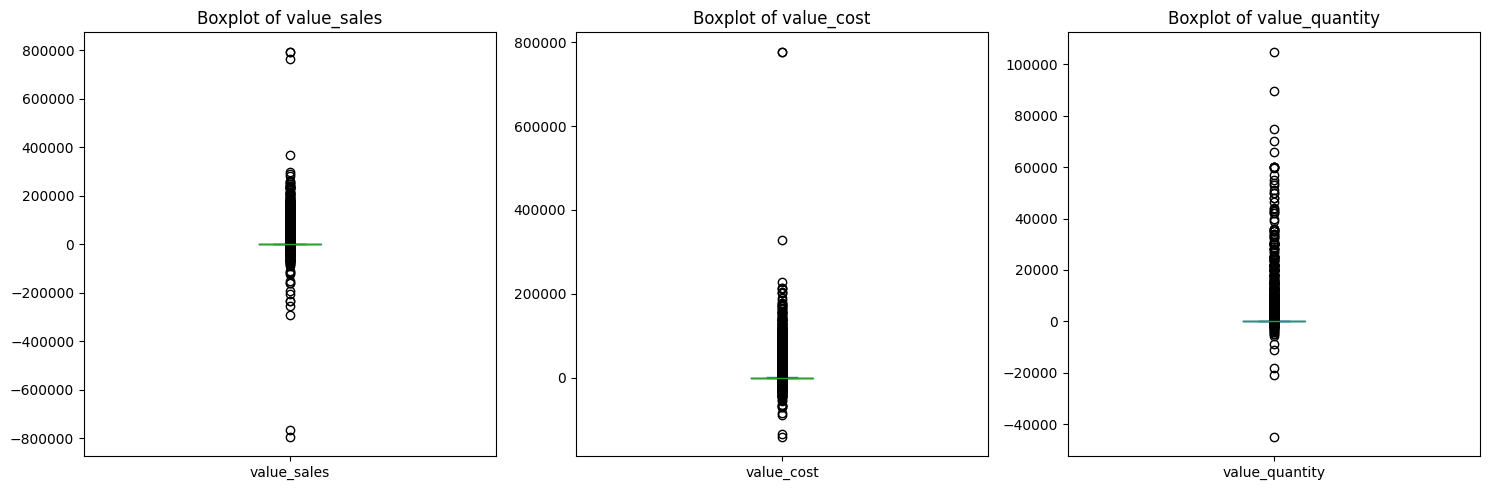

In [57]:
# Set up the figure with a grid of 1x3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the box plot for 'value_sales' in the first subplot
merged_data['value_sales'].plot(kind='box', ax=axes[0])
axes[0].set_title('Boxplot of value_sales')

# Plot the box plot for 'value_cost' in the second subplot
merged_data['value_cost'].plot(kind='box', ax=axes[1])
axes[1].set_title('Boxplot of value_cost')

# Plot the box plot for 'value_quantity' in the third subplot
merged_data['value_quantity'].plot(kind='box', ax=axes[2])
axes[2].set_title('Boxplot of value_quantity')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

- Histograms before cleaning outlier

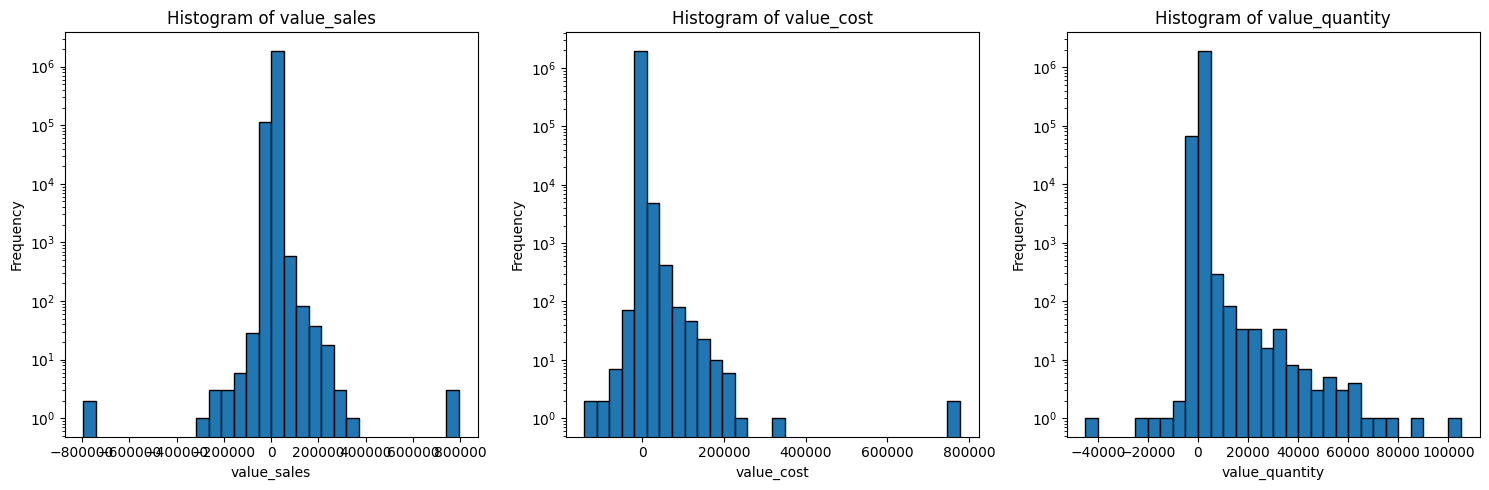

In [58]:
# Plot histograms for each variable
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for value_sales
axes[0].hist(merged_data['value_sales'], bins=30, edgecolor='black',log=True)
axes[0].set_title('Histogram of value_sales')
axes[0].set_xlabel('value_sales')
axes[0].set_ylabel('Frequency')

# Histogram for value_cost
axes[1].hist(merged_data['value_cost'], bins=30, edgecolor='black',log=True)
axes[1].set_title('Histogram of value_cost')
axes[1].set_xlabel('value_cost')
axes[1].set_ylabel('Frequency')

# Histogram for value_quantity
axes[2].hist(merged_data['value_quantity'], bins=30, edgecolor='black',log=True)
axes[2].set_title('Histogram of value_quantity')
axes[2].set_xlabel('value_quantity')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

1. Highly Skewed Data:
The data for each of these columns is highly skewed, meaning there are many low or zero values and only a few high values.
This often occurs when there is a large number of small transactions (or even no transactions in some cases), and only a few large transactions.
2. Sparse Distribution:
The narrow and high central bars suggest that the vast majority of values are very close to zero, with few values spreading out across the range.
This could indicate that only a small percentage of transactions have high value_sales, value_cost, or value_quantity.
3. Potential Need for Transformation:
Because of the skewness, the data may benefit from a log transformation or another method to spread the values more evenly, especially if you plan to perform analyses or modeling that assume normality.
4. Zero or Minimal Transactions:
If there are many transactions with zero or minimal values in these columns, it might be useful to analyze these zero-value transactions separately. This could be a sign of canceled orders, unpaid invoices, or other business cases where no significant sales, cost, or quantity were recorded.

- Outlier management in core metric

In [59]:
# Define extreme boundaries based on your boxplot
extreme_sales_upper = 600000
extreme_sales_lower = -600000
extreme_cost_upper = 600000
extreme_cost_lower = -600000
extreme_quantity_upper = 80000
extreme_quantity_lower = -80000

# Filter rows that meet any of these extreme conditions
extreme_rows = merged_data[
    (merged_data['value_sales'] > extreme_sales_upper) | 
    (merged_data['value_sales'] < extreme_sales_lower) | 
    (merged_data['value_cost'] > extreme_cost_upper) | 
    (merged_data['value_cost'] < extreme_cost_lower) |
    (merged_data['value_quantity'] > extreme_quantity_upper) | 
    (merged_data['value_quantity'] < extreme_quantity_lower)
]

# Display the rows with extreme outliers
# Display only the selected columns with extreme outliers
extreme_columns = extreme_rows[['value_sales', 'value_cost', 'value_quantity','order_type_code','value_price_adjustment','customer_code','item_code']]

# Show the result
print("Extreme values in value_sales, value_cost, and value_quantity:")
print(extreme_columns)

Extreme values in value_sales, value_cost, and value_quantity:
         value_sales  value_cost  value_quantity order_type_code  \
51580   -765100.0000     -383.00            -5.0             CRR   
51768    765100.0000      383.00             5.0             NOR   
1683043  192388.9000   203595.15         89650.0             NOR   
1858931  793541.9800   777669.20            11.0             NOR   
1860865 -793541.9800        0.00             0.0             CRD   
1860866  793541.9800   777669.20            11.0             NOR   
1910302    1196.9964     1428.84        105000.0             EXP   

         value_price_adjustment customer_code     item_code  
51580                         0     602050300          GR99  
51768                         0     602050300          GR99  
1683043                       0     231920100        200767  
1858931                       0     400100300      NS010015  
1860865                       1     400100300      NS010015  
1860866             

In [60]:
filtered_data_gr99 = merged_data[merged_data['item_code'] == 'GR99'][['value_sales', 'value_cost', 'value_quantity','order_type_code','customer_code']].sort_values(by=['value_sales'], ascending=True)
print(filtered_data_gr99)

         value_sales  value_cost  value_quantity order_type_code customer_code
51580     -765100.00     -383.00            -5.0             CRR     602050300
1823212     -3750.00    -1934.25           -25.0             CRR     646185705
53013       -1414.16     -612.80            -8.0             CRR     361000410
846528      -1060.62     -459.60            -6.0             CRR     361000414
15084        -784.60     -761.76           -10.0             NOR     234750001
...              ...         ...             ...             ...           ...
1220601      8643.24     8242.56           108.0             NOR     234750001
852050      12004.50    11448.00           150.0             NOR     234750001
1220733     13284.98    12669.12           166.0             NOR     234750001
1823950     24104.80    23865.84           290.0             NOR     234750001
51768      765100.00      383.00             5.0             NOR     602050300

[308 rows x 5 columns]


Drop extream outlier with item code GR99
1. Both rows have reversed, extreme values for value_sales and value_cost, indicating potential data entry errors.
2. These values are inconsistent with other entries for the same item_code (GR99) and the same customer, which follow a more typical pattern.
3. One entry is marked as a normal order (order_type_code = NOR), while the other appears to be a credit return (order_type_code = CRR). This mixed coding, coupled with reversed values, suggests that these entries are likely erroneous.

In [61]:
# Drop rows with indices 51580 and 51768
merged_data = merged_data.drop(index=[51580, 51768])

In [62]:
filtered_data_200767 = merged_data[merged_data['item_code'] == '200767'][['value_sales', 'value_cost', 'value_quantity','order_type_code','customer_code']].sort_values(by=['value_sales'], ascending=True)
print(filtered_data_200767)

         value_sales  value_cost  value_quantity order_type_code customer_code
595042      -2928.00        0.00             0.0             CRD     134860100
596849      -2065.00        0.00             0.0             CRD     471000816
1682855      -790.00        0.00             0.0             CRD     471200007
521263       -531.30     -531.42          -300.0             CRD     231920100
510829       -522.24     -339.32           -85.0             ZCG     Z45501801
...              ...         ...             ...             ...           ...
1683763     13330.00    13307.06          6200.0             NOR     231900101
1683002     15360.00    10730.00          5000.0             NOR     471000816
1683452     26825.00    26828.75         12500.0             NOR     231920100
1682374    102847.05   108837.68         47925.0             NOR     231920100
1683043    192388.90   203595.15         89650.0             NOR     231920100

[4288 rows x 5 columns]


In [63]:
# Define a threshold for high quantity
high_quantity_threshold = 50000

# Filter similar transactions with 'NOR' order_type_code and high quantities
similar_nor_transactions = merged_data[
    (merged_data['order_type_code'] == 'NOR') &
    (merged_data['value_quantity'] >= high_quantity_threshold)
][['value_sales', 'value_cost', 'value_quantity', 'order_type_code', 'customer_code']]

# Display the first few rows to observe any patterns
print(similar_nor_transactions.head(20))

         value_sales  value_cost  value_quantity order_type_code customer_code
1528007      32400.0    32400.00         54000.0             NOR     231920100
1683043     192388.9   203595.15         89650.0             NOR     231920100
1808060      11480.0    11466.00         70000.0             NOR     231920100
1820001      56180.0    56180.00         53000.0             NOR     231920100


For the extream outlier with item code 200767, keeping this outlier is reasonable, as it exhibits consistent characteristics with other high-quantity transactions, especially for the same customer. Dropping it would mean losing a valid record of a high-volume sale that aligns with expected business patterns.

In [64]:
filtered_data_NS010015 = merged_data[merged_data['item_code'] == 'NS010015'][['value_sales', 'value_cost', 'value_quantity','order_type_code','customer_code']]
print(filtered_data_NS010015)

         value_sales  value_cost  value_quantity order_type_code customer_code
1858931    793541.98    777669.2            11.0             NOR     400100300
1860865   -793541.98         0.0             0.0             CRD     400100300
1860866    793541.98    777669.2            11.0             NOR     400100300


1. When looking at the three rows for this item code, there’s one row (ID 1860865) that has a negative value_sales (-793541.98) and a value_cost of 0. This pattern is unusual, as it represents a "credit" transaction with no cost and may indicate an adjustment or erroneous entry.
2. The other two rows (1858931 and 1860866) are identical in terms of value_sales, value_cost, and value_quantity. Retaining both would double-count the transaction, thus distorting the actual revenue, cost, and quantity figures for this item and customer.

In this section we decided to drop Rows 1860865 (the row with a negative sales value) and 1860866 (one of the duplicate entries).

In [65]:
# Drop rows with indices 1860865 and 1860866
merged_data = merged_data.drop(index=[1860865, 1860866])

In [66]:
filtered_data_TJ01 = merged_data[merged_data['item_code'] == 'TJ01-0002-00'][['value_sales', 'value_cost', 'value_quantity','order_type_code','customer_code']]
print(filtered_data_TJ01)

         value_sales  value_cost  value_quantity order_type_code customer_code
1910300    -216.0000       0.000             0.0             CRD     800640100
1910301     205.2000       0.000             0.0             COP     800640100
1910302    1196.9964    1428.840        105000.0             EXP     800640100
1910303     216.0000     244.944         18000.0             EXP     800640100
1910304     143.9964     163.296         12000.0             EXP     800640100
1910305     855.0036    1020.600         75000.0             EXP     800640100


The outlier in row 1910302, this high-quantity transaction fits within the expected context of export orders and does not present data inconsistencies, it should be kept as a valid entry in your dataset. The reasoning is grounded in the typical behavior of export transactions and the item’s sales characteristics.

- Outlier management with zero and olaceholder values

In [67]:
# Count zero values in each column
zero_value_sales = (merged_data['value_sales'] == 0).sum()
zero_value_cost = (merged_data['value_cost'] == 0).sum()
zero_value_quantity = (merged_data['value_quantity'] == 0).sum()

# Display the counts
print("Number of zero values in value_sales:", zero_value_sales)
print("Number of zero values in value_cost:", zero_value_cost)
print("Number of zero values in value_quantity:", zero_value_quantity)

Number of zero values in value_sales: 22134
Number of zero values in value_cost: 49923
Number of zero values in value_quantity: 48549


- If all three columns (value_sales, value_cost, and value_quantity) have a value of zero, it likely means that the transaction didn't result in any sales, cost, or quantity. This might indicate a canceled transaction, a placeholder entry, or data that was recorded without any real financial or quantitative impact
- we decided to dropping rows with zero values in value_sales, value_cost, and value_quantity ensures data relevance, avoids distortion in aggregated metrics, maintains consistency in transaction records, and upholds data integrity. This approach helps your analysis reflect actual, meaningful transactions, leading to more accurate insights and decision-making.

In [68]:
# Step 1: Filter out rows where 'value_sales', 'value_cost', and 'value_quantity' are all zero
merged_data = merged_data[
    ~((merged_data['value_sales'] == 0) &
      (merged_data['value_cost'] == 0) &
      (merged_data['value_quantity'] == 0))
]

# Display the filtered data to confirm the rows are removed
print("Data after filtering out rows with all zero values in 'value_sales', 'value_cost', and 'value_quantity':")
print(merged_data)

Data after filtering out rows with all zero values in 'value_sales', 'value_cost', and 'value_quantity':
        accounting_date  fiscal_year  fiscal_month  calendar_year  \
0            2012-05-09         2012            11           2012   
1            2012-02-16         2012             8           2012   
2            2012-05-09         2012            11           2012   
3            2012-05-18         2012            11           2012   
4            2012-01-09         2012             7           2012   
...                 ...          ...           ...            ...   
1988377      2013-11-06         2014             5           2013   
1988378      2013-07-17         2014             1           2013   
1988379      2013-10-21         2014             4           2013   
1988380      2013-11-01         2014             5           2013   
1988381      2013-09-25         2014             3           2013   

         calendar_month  calendar_day  company_code customer_code 

In [69]:
# Check the result to ensure rows are removed
zero_values_data = merged_data[
    (merged_data['value_sales'] == 0) &
    (merged_data['value_cost'] == 0) &
    (merged_data['value_quantity'] == 0)
]

# Count the occurrences of each unique order_type_code
order_type_code_counts = zero_values_data.value_counts()

# Display the results
print("Order Type Codes where value_sales, value_cost, and value_quantity are all zero:")
print(order_type_code_counts)

Order Type Codes where value_sales, value_cost, and value_quantity are all zero:
Series([], Name: count, dtype: int64)


- Outlier management in data anomalies

In [70]:
# Filter rows where value_sales is less than value_cost
sales_less_than_cost = merged_data[merged_data['value_sales'] < merged_data['value_cost']]

# Display the number of rows that meet this condition
print("Number of rows where value_sales is less than value_cost:", sales_less_than_cost.shape[0])

Number of rows where value_sales is less than value_cost: 148474


In [71]:
# Get the unique order_type_code values for rows where value_sales < value_cost
order_class_code_counts = sales_less_than_cost['abc_class_code'].value_counts()

# Display the result
print("Order class Codes where value_sales is less than value_cost:")
print(order_class_code_counts)

Order class Codes where value_sales is less than value_cost:
abc_class_code
J    57655
D    26979
A    16063
U    13670
B     9250
C     8917
G     8366
E     3802
I     3168
F      604
Name: count, dtype: int64


The rationale for considering the removal of rows where value_sales < value_cost for abc_class_code categories C, G, I, and F is as follows:

- C (Low Sellers): This category consists of low-selling products. Selling these items at a loss may indicate inefficiency or business challenges, as these products typically shouldn't be sold below cost continuously.
- G (Component with no usage): This category includes components with no usage. Selling these below cost may not add real value to the business and suggests that they are being sold at a loss without generating a clear benefit.
- I (Indent Items - full lead time applies): Items that require full lead time to import, usually with higher associated costs due to import and storage. Selling these at a loss may be unwise, as they typically shouldn't be heavily discounted due to their import-related costs.
- F (New Items <6 months old): Newly introduced items less than six months old are expected to sell at a profitable price, as they are fresh in the market. Selling them below cost may indicate improper pricing or valuation issues.

In [72]:
# Define the categories to analyze
categories_to_check = ['C', 'G', 'I', 'F']

# Loop over each category and filter the data
for category in categories_to_check:
    # Filter rows where value_sales < value_cost and value_price_adjustment = 1 for each abc_class_code
    price_adjustment_data = merged_data[
        (merged_data['value_sales'] < merged_data['value_cost']) &
        (merged_data['value_price_adjustment'] == 1) &
        (merged_data['abc_class_code'] == category)
    ]

    # Filter rows where value_sales < value_cost and value_price_adjustment = 0 for each abc_class_code
    no_price_adjustment_data = merged_data[
        (merged_data['value_sales'] < merged_data['value_cost']) &
        (merged_data['value_price_adjustment'] == 0) &
        (merged_data['abc_class_code'] == category)
    ]

    # Display the counts
    print(f"Rows with price adjustment (value_price_adjustment = 1) where value_sales < value_cost for abc_class_code '{category}':", price_adjustment_data.shape[0])
    print(f"Rows without price adjustment (value_price_adjustment = 0) where value_sales < value_cost for abc_class_code '{category}':", no_price_adjustment_data.shape[0])
    print("\n")

Rows with price adjustment (value_price_adjustment = 1) where value_sales < value_cost for abc_class_code 'C': 3221
Rows without price adjustment (value_price_adjustment = 0) where value_sales < value_cost for abc_class_code 'C': 5696


Rows with price adjustment (value_price_adjustment = 1) where value_sales < value_cost for abc_class_code 'G': 5179
Rows without price adjustment (value_price_adjustment = 0) where value_sales < value_cost for abc_class_code 'G': 3187


Rows with price adjustment (value_price_adjustment = 1) where value_sales < value_cost for abc_class_code 'I': 731
Rows without price adjustment (value_price_adjustment = 0) where value_sales < value_cost for abc_class_code 'I': 2437


Rows with price adjustment (value_price_adjustment = 1) where value_sales < value_cost for abc_class_code 'F': 12
Rows without price adjustment (value_price_adjustment = 0) where value_sales < value_cost for abc_class_code 'F': 592




Dropping rows where value_sales < value_cost and value_price_adjustment = 0 for specific abc_class_codes like ['C', 'G', 'I', 'F']
- Removing rows with value_sales < value_cost and value_price_adjustment = 0 for specific product categories ensures that the dataset aligns with realistic business scenarios, enhances data quality, and prevents errors from impacting analysis and decision-making

In [73]:
# Define the categories to filter for dropping
categories_to_drop = ['C', 'G', 'I', 'F']

# Filter the rows to keep (i.e., those that don't meet the criteria for dropping)
filtered_data = merged_data[
    ~((merged_data['value_sales'] < merged_data['value_cost']) &
      (merged_data['value_price_adjustment'] == 0) &
      (merged_data['abc_class_code'].isin(categories_to_drop)))
]

# Assign the filtered data back to merged_data
merged_data = filtered_data

# Display the new shape of merged_data to confirm rows have been dropped
print("Data shape after dropping rows:", merged_data.shape)

Data shape after dropping rows: (1975247, 43)


In [74]:
# Get the unique order_type_code values for rows where value_sales < value_cost
order_type_code_counts = sales_less_than_cost['order_type_code'].value_counts()

# Display the result
print("Order Type Codes where value_sales is less than value_cost:")
print(order_type_code_counts)

Order Type Codes where value_sales is less than value_cost:
order_type_code
CRD    47206
CRR    45018
NOR    30759
CDG    11781
NOH     3339
SPC     2740
ZCG     1883
ZCR     1402
PMO     1025
EXP      530
CPR      519
PRD      417
PRO      345
CRP      294
AES      238
PUP      232
CSH      218
5TN      215
PPO      121
NOS       78
EDI       73
MIN       13
COA       12
PSA       11
WDC        2
OBS        1
ZD3        1
ZC2        1
PGS        0
EDS        0
COP        0
CSO        0
PM0        0
PPD        0
SPL        0
ZOP        0
Name: count, dtype: int64


In [75]:
# Filtering for rows where quantity is negative for normal orders (NOR, NOH, NOS)
negative_quantity_normal_orders = merged_data[
    (merged_data['order_type_code'].isin(['NOR', 'NOH', 'NOS'])) & 
    (merged_data['value_quantity'] < 0)
]

# Count the rows that meet this condition
negative_quantity_count = negative_quantity_normal_orders.shape[0]
negative_quantity_count

3584

For normal orders (NOR, NOH, NOS), in a typical business context, these orders should not have returns or negative quantities. These are straightforward purchases where the customer orders goods, and the transaction reflects normal sales figures. Generally, if there is a negative quantity in these types of orders

In [76]:
# Remove rows where quantity is negative in normal orders (NOR, NOH, NOS)
merged_data = merged_data[
    ~((merged_data['order_type_code'].isin(['NOR', 'NOH', 'NOS'])) & 
      (merged_data['value_quantity'] < 0))
]

# Filtering for rows where quantity is negative for normal orders (NOR, NOH, NOS)
negative_quantity_normal_orders = merged_data[
    (merged_data['order_type_code'].isin(['NOR', 'NOH', 'NOS'])) & 
    (merged_data['value_quantity'] < 0)
]

# Count the rows that meet this condition
negative_quantity_count = negative_quantity_normal_orders.shape[0]
negative_quantity_count

0

- Outlier management with day gap

In [77]:
# Calculate the day gap
merged_data['day_gap'] = (merged_data['accounting_date'] - merged_data['order_date']).dt.days

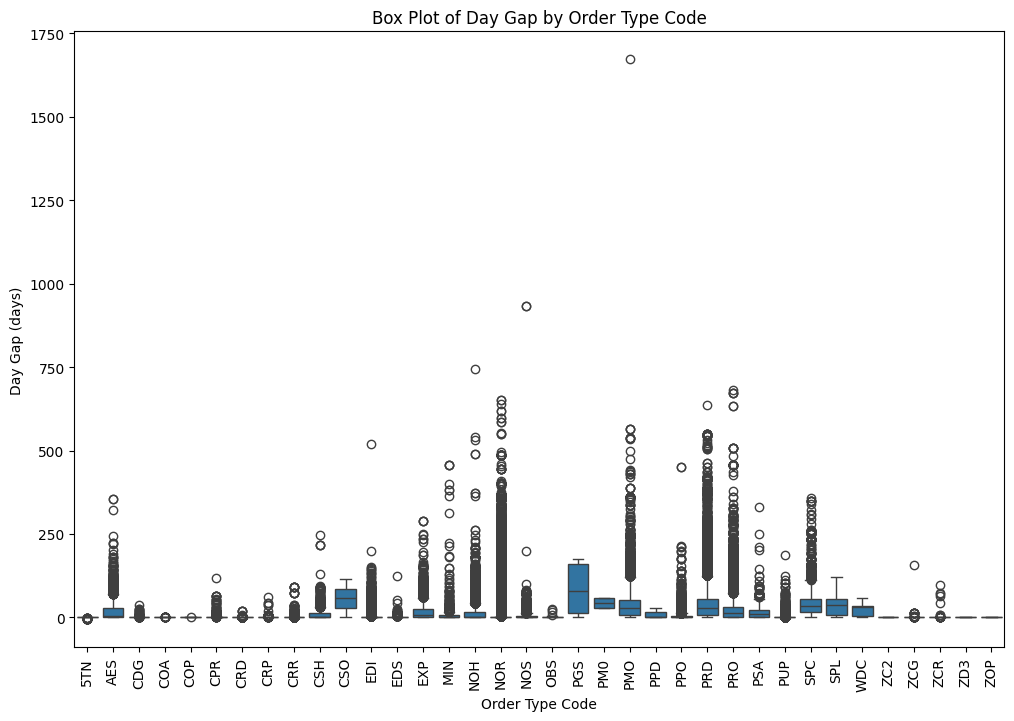

In [78]:
# Plotting a box plot for day gap by each order type code
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_data, x='order_type_code', y='day_gap')
plt.xticks(rotation=90)
plt.title("Box Plot of Day Gap by Order Type Code")
plt.xlabel("Order Type Code")
plt.ylabel("Day Gap (days)")
plt.show()

In [79]:
max_day_gap = merged_data['day_gap'].max()
min_day_gap = merged_data['day_gap'].min()
median_day_gap = merged_data['day_gap'].median()
average_day_gap = merged_data['day_gap'].mean()
print(f"Max day gap: {max_day_gap} days")
print(f"Min day gap: {min_day_gap} days")
print(f"Median day gap: {median_day_gap} days")
print(f"The average day gap between order date and accounting date is: {average_day_gap:.2f} days")

Max day gap: 1672 days
Min day gap: -6 days
Median day gap: 0.0 days
The average day gap between order date and accounting date is: 3.69 days


For max day gap 1672 days it is unrealistic Processing Time: A day gap of 1,672 days (almost 4.5 years) is highly unusual for typical order processing. This value far exceeds the reasonable timeframe for any order-to-accounting process, suggesting an error or anomaly in data entry. So we decided to drop that column.

In [80]:
merged_data = merged_data[merged_data['day_gap'] != 1672]

- Check day gap with negative value

In [81]:
# Filter rows where day_gap is less than 0
negative_day_gap = merged_data[merged_data['day_gap'] < 0]

# Display the result
print(negative_day_gap[['order_date', 'accounting_date', 'day_gap','order_type_code']])

       order_date accounting_date  day_gap order_type_code
526191 2012-01-10      2012-01-09       -1             5TN
526192 2012-01-10      2012-01-09       -1             5TN
526193 2012-01-10      2012-01-09       -1             5TN
526194 2012-01-10      2012-01-09       -1             5TN
526195 2012-01-10      2012-01-09       -1             5TN
526196 2012-01-10      2012-01-09       -1             5TN
527063 2012-01-09      2012-01-03       -6             5TN
527064 2012-01-09      2012-01-03       -6             5TN
527065 2012-01-09      2012-01-03       -6             5TN
527066 2012-01-09      2012-01-03       -6             5TN
527651 2012-01-09      2012-01-03       -6             5TN
527652 2012-01-09      2012-01-03       -6             5TN
527653 2012-01-09      2012-01-03       -6             5TN
527654 2012-01-09      2012-01-03       -6             5TN
527655 2012-01-09      2012-01-03       -6             5TN
527656 2012-01-09      2012-01-03       -6             5

Typically, it would be unusual for the order_date to be later than the accounting_date (resulting in a negative day_gap). This might indicate that data entry errors dates may have been recorded incorrectly, either for order_date or accounting_date. So we decided to drop it.

In [82]:
# Drop rows where day_gap is less than 0
merged_data = merged_data[merged_data['day_gap'] >= 0]

Define Grouping for order_type_code

- Normal Order: NOR, NOS, NOH
- Project Order: PRO, PRD, PMO, PM0
- Credit Adjustment: CRD, CRP, CRR, COP, COA
- Specialty Orders: AES, SPC, PUP
- Export Order: EXP
- Do Not Use: EDS, OBS, PPD, WDC, PGS, SPL, ZOP, ZC2, 5TN, PPO, ZD3, CSO
- Other: Any remaining types (such as EDI or specific exceptions like ZCG, ZCR)

In [83]:
# Define a mapping dictionary for order_type_code to group
group_mapping = {
    'NOR': 'Normal Order', 'NOS': 'Normal Order', 'NOH': 'Normal Order',
    'PRO': 'Project Order', 'PRD': 'Project Order', 'PMO': 'Project Order', 'PM0': 'Project Order',
    'CRD': 'Credit Adjustment', 'CRP': 'Credit Adjustment', 'CRR': 'Credit Adjustment', 
    'COP': 'Credit Adjustment', 'COA': 'Credit Adjustment',
    'AES': 'Specialty Orders', 'SPC': 'Specialty Orders', 'PUP': 'Specialty Orders',
    'EXP': 'Export Order',
    'EDS': 'Do Not Use', 'OBS': 'Do Not Use', 'PPD': 'Do Not Use', 'WDC': 'Do Not Use', 
    'PGS': 'Do Not Use', 'SPL': 'Do Not Use', 'ZOP': 'Do Not Use', 'ZC2': 'Do Not Use', 
    '5TN': 'Do Not Use', 'PPO': 'Do Not Use', 'ZD3': 'Do Not Use', 'CSO': 'Do Not Use',
    # Default group for any other type codes not explicitly mentioned
    'EDI': 'Other', 'ZCG': 'Other', 'ZCR': 'Other'
}

# Map the group to a new column in the DataFrame
merged_data['order_group'] = merged_data['order_type_code'].map(group_mapping)

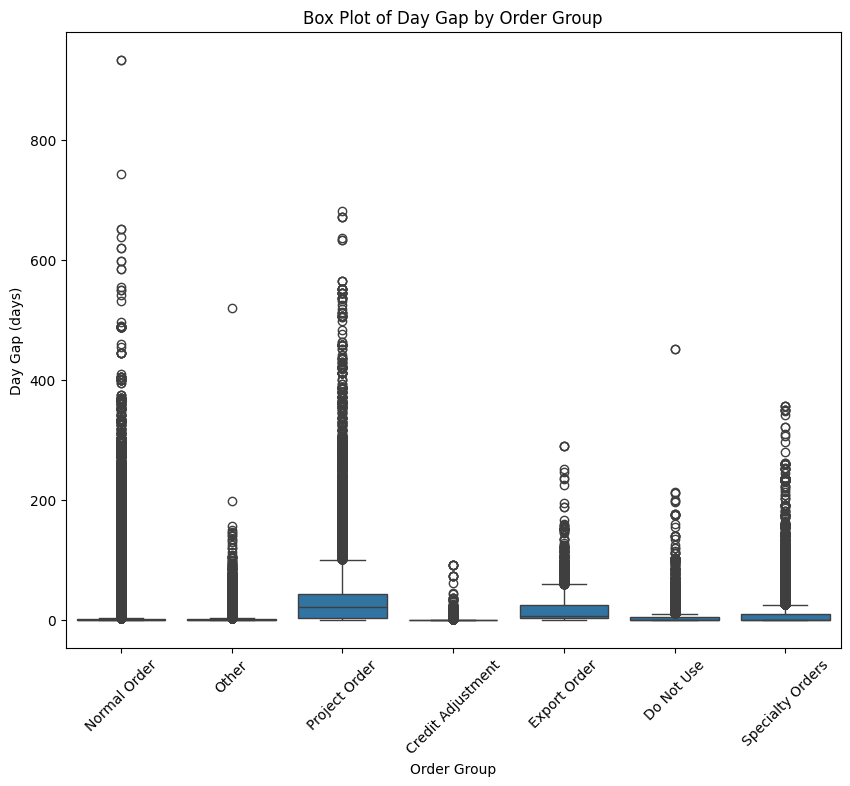

In [84]:
# Set figure size
plt.figure(figsize=(10, 8))

# Create a box plot for day_gap by order_group
sns.boxplot(data=merged_data, x='order_group', y='day_gap')
plt.xticks(rotation=45)
plt.title("Box Plot of Day Gap by Order Group")
plt.xlabel("Order Group")
plt.ylabel("Day Gap (days)")
plt.show()

In [85]:
# Define the high day_gap threshold for Normal Orders
normal_order_threshold = 365  # Set this threshold based on expected processing time for normal orders

# Filter for Normal Orders (NOR, NOH, NOS) with day_gap above the threshold
high_day_gap_normal_orders = merged_data[
    (merged_data['order_type_code'].isin(['NOR', 'NOH', 'NOS'])) &
    (merged_data['day_gap'] > normal_order_threshold)
]

# Display the filtered high day_gap records for Normal Orders
print("High day_gap entries in Normal Orders:")
print(high_day_gap_normal_orders[['order_type_code', 'order_date', 'accounting_date', 'day_gap']])

High day_gap entries in Normal Orders:
        order_type_code order_date accounting_date  day_gap
342113              NOR 2010-11-15      2012-02-02      444
345386              NOR 2010-11-15      2012-02-02      444
345478              NOR 2010-11-15      2012-02-02      444
359045              NOR 2010-11-15      2012-02-02      444
375231              NOR 2010-11-15      2012-02-02      444
...                 ...        ...             ...      ...
1971202             NOR 2012-05-18      2013-09-18      488
1971495             NOR 2012-09-17      2013-09-18      366
1973585             NOR 2012-09-17      2013-09-18      366
1978731             NOR 2012-05-18      2013-09-18      488
1979980             NOR 2012-05-18      2013-09-18      488

[130 rows x 4 columns]


- Choosing a threshold of 365 days (one year) for day_gap in Normal Orders could be a reasonable approach.
- Business Logic: In most businesses, it’s unusual for a normal order to take more than a year to be recorded in the accounting system, especially for straightforward, routine orders. Therefore, any day_gap exceeding 365 days likely indicates an anomaly or data inconsistency.

In [86]:
# Dropping rows with high day_gap for Normal Orders (NOR, NOH, NOS) above the threshold of 365 days
merged_data = merged_data[~(
    (merged_data['order_type_code'].isin(['NOR', 'NOH', 'NOS'])) &
    (merged_data['day_gap'] > 365)
)]

- Check outlier after managing high day gap

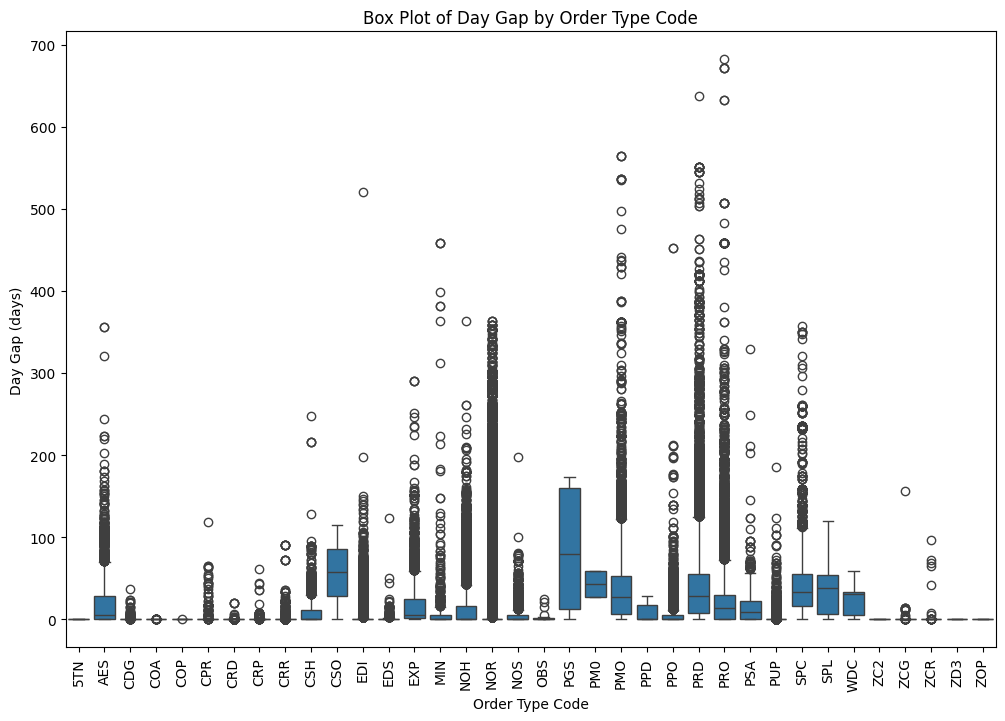

In [87]:
# Plotting a box plot for day gap by each order type code
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_data, x='order_type_code', y='day_gap')
plt.xticks(rotation=90)
plt.title("Box Plot of Day Gap by Order Type Code")
plt.xlabel("Order Type Code")
plt.ylabel("Day Gap (days)")
plt.show()

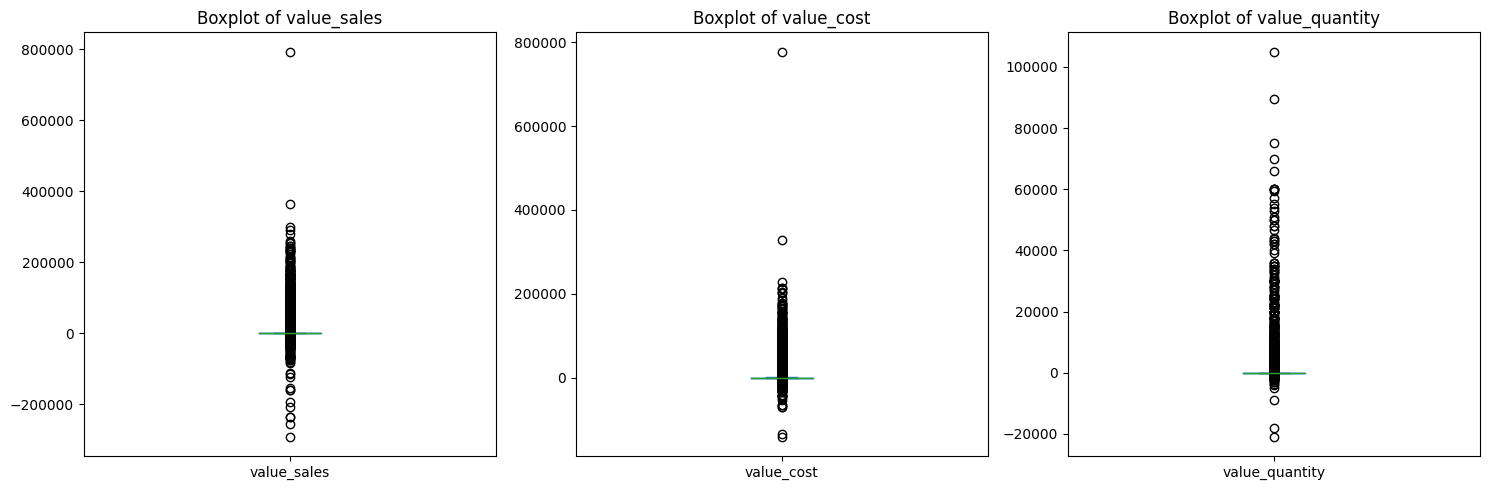

In [88]:
# Set up the figure with a grid of 1x3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the box plot for 'value_sales' in the first subplot
merged_data['value_sales'].plot(kind='box', ax=axes[0])
axes[0].set_title('Boxplot of value_sales')

# Plot the box plot for 'value_cost' in the second subplot
merged_data['value_cost'].plot(kind='box', ax=axes[1])
axes[1].set_title('Boxplot of value_cost')

# Plot the box plot for 'value_quantity' in the third subplot
merged_data['value_quantity'].plot(kind='box', ax=axes[2])
axes[2].set_title('Boxplot of value_quantity')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

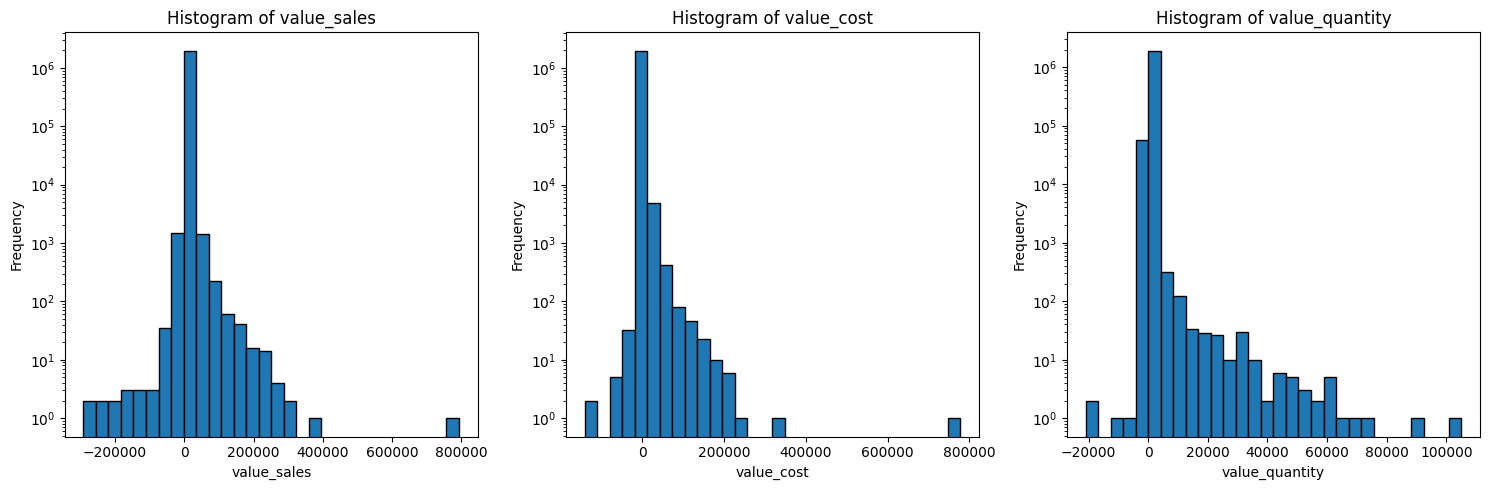

In [89]:
# Plot histograms for each variable
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for value_sales
axes[0].hist(merged_data['value_sales'], bins=30, edgecolor='black',log=True)
axes[0].set_title('Histogram of value_sales')
axes[0].set_xlabel('value_sales')
axes[0].set_ylabel('Frequency')

# Histogram for value_cost
axes[1].hist(merged_data['value_cost'], bins=30, edgecolor='black',log=True)
axes[1].set_title('Histogram of value_cost')
axes[1].set_xlabel('value_cost')
axes[1].set_ylabel('Frequency')

# Histogram for value_quantity
axes[2].hist(merged_data['value_quantity'], bins=30, edgecolor='black',log=True)
axes[2].set_title('Histogram of value_quantity')
axes[2].set_xlabel('value_quantity')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

- Check shape after mananging outlier

In [90]:
merged_data.shape

(1971500, 45)

- Check skewness after mananging outlier

In [91]:
# Calculate skewness for each numerical column in the DataFrame
skewness = merged_data[['value_sales', 'value_cost', 'value_quantity']].skew()

# Display the skewness values
print("Skewness of each numerical column:")
print(skewness)

Skewness of each numerical column:
value_sales        38.740576
value_cost         63.282809
value_quantity    117.404821
dtype: float64


### 6. Normalization and Scaling 
Log Transformation
1. Reduce Skewness: Log transformations are particularly useful for data that has a long tail or is highly skewed. They compress the range, making the data more "normal" or symmetric, which can improve the performance of statistical analyses and machine learning models.
2. Handle Wide Ranges: If your data has a large range of values (e.g., from very small to very large numbers), a log transformation can help compress this range, allowing models to process the data more effectively.

Columns Not Typically Scaled

1. Date-related Columns (accounting_date, fiscal_year, fiscal_month, calendar_year, calendar_month, calendar_day, invoice_date, order_date):
Date and time columns generally don't need normalization or standardization as they are either categorical (year, month, day) or timestamp-based. However, you may consider extracting specific features (e.g., day of the week, month, quarter) if these attributes are relevant to your analysis.
2. Categorical Columns (customer_code, item_code, business_area_code, etc.):
Categorical columns should be encoded rather than scaled. You could use One-Hot Encoding for non-ordinal categorical columns (e.g., item_class_code, order_type_code) or Label Encoding if they have an ordinal nature. For example, abc_class_code could potentially be ordinal, depending on its meaning.
3. Integer Columns (e.g., company_code, customer_district_code, item_type):
While some integer columns represent IDs or categorical codes (such as company_code, customer_code), they don’t need scaling. However, for any numerical columns that actually represent measurements or counts (like value_quantity), scaling could be useful.

In [92]:
merged_data.shape

(1971500, 45)

1. Condition 1 (data > 0) is ideal when only need to transform strictly positive data and can exclude zero or negative values.
2. Condition 2 (data >= 0) allows to retain zero values in the transformation, which is helpful if the zeros are meaningful in this analysis and do not lose data rows with zero values.

In [93]:
# Condition 1: Count rows with data > 0 for standard log transformation
value_sales_log_count = merged_data[merged_data['value_sales'] > 0].shape[0]
value_cost_log_count = merged_data[merged_data['value_cost'] > 0].shape[0]
value_quantity_log_count = merged_data[merged_data['value_quantity'] > 0].shape[0]

# Condition 2: Count rows with data >= 0 for log(1 + x) transformation
value_sales_log_plus1_count = merged_data[merged_data['value_sales'] >= 0].shape[0]
value_cost_log_plus1_count = merged_data[merged_data['value_cost'] >= 0].shape[0]
value_quantity_log_plus1_count = merged_data[merged_data['value_quantity'] >= 0].shape[0]

# Display the results
print("Row counts for standard log transformation (data > 0):")
print(f"value_sales_log: {value_sales_log_count}")
print(f"value_cost_log: {value_cost_log_count}")
print(f"value_quantity_log: {value_quantity_log_count}")

print("\nRow counts for log(1 + x) transformation (data >= 0):")
print(f"value_sales_log_plus1: {value_sales_log_plus1_count}")
print(f"value_cost_log_plus1: {value_cost_log_plus1_count}")
print(f"value_quantity_log_plus1: {value_quantity_log_plus1_count}")

Row counts for standard log transformation (data > 0):
value_sales_log: 1849971
value_cost_log: 1865684
value_quantity_log: 1867000

Row counts for log(1 + x) transformation (data >= 0):
value_sales_log_plus1: 1868753
value_cost_log_plus1: 1915339
value_quantity_log_plus1: 1915314


- Log Transformation with Data Adjustment (log(1 + x))
- To address skewness and improve data distribution, I applied log transformations to certain features. Traditional log transformation (log(x)) can only be used with positive values (x > 0), requiring exclusion or separate handling of zeros, which risks data loss. By using log(1 + x), zero values are transformed to log(1) = 0, preserving all data points, including zeros. This approach is particularly beneficial when zero values indicate meaningful information, allowing for a complete and interpretable dataset.

Log Transformation with Data Adjustment (log(1 + x))

In [94]:
# Apply log(1 + x) transformation for non-negative values and retain original negative values
merged_data['value_sales_log_plus1_transformed'] = np.where(
    merged_data['value_sales'] >= 0,
    np.log1p(merged_data['value_sales']),
    merged_data['value_sales']  # Retain original value for negative numbers
)

merged_data['value_cost_log_plus1_transformed'] = np.where(
    merged_data['value_cost'] >= 0,
    np.log1p(merged_data['value_cost']),
    merged_data['value_cost']  # Retain original value for negative numbers
)

merged_data['value_quantity_log_plus1_transformed'] = np.where(
    merged_data['value_quantity'] >= 0,
    np.log1p(merged_data['value_quantity']),
    merged_data['value_quantity']  # Retain original value for negative numbers
)

# Display the first few rows to confirm
print("Data with log(1 + x) transformation applied to non-negative values and negative values retained:")
print(merged_data[['value_sales', 'value_sales_log_plus1_transformed',
                   'value_cost', 'value_cost_log_plus1_transformed',
                   'value_quantity', 'value_quantity_log_plus1_transformed']].head())

# Check for missing values to confirm
print("\nMissing values check:")
print("value_sales_log_plus1_transformed:", merged_data['value_sales_log_plus1_transformed'].isnull().sum())
print("value_cost_log_plus1_transformed:", merged_data['value_cost_log_plus1_transformed'].isnull().sum())
print("value_quantity_log_plus1_transformed:", merged_data['value_quantity_log_plus1_transformed'].isnull().sum())

Data with log(1 + x) transformation applied to non-negative values and negative values retained:
   value_sales  value_sales_log_plus1_transformed  value_cost  \
0       218.40                           5.390897    178.1976   
1        38.28                           3.670715     25.4568   
2        40.20                           3.718438     25.4568   
3        20.10                           3.049273     12.7284   
4        19.14                           3.002708     12.7284   

   value_cost_log_plus1_transformed  value_quantity  \
0                          5.188489            84.0   
1                          3.275513            12.0   
2                          3.275513            12.0   
3                          2.619467             6.0   
4                          2.619467             6.0   

   value_quantity_log_plus1_transformed  
0                              4.442651  
1                              2.564949  
2                              2.564949  
3            

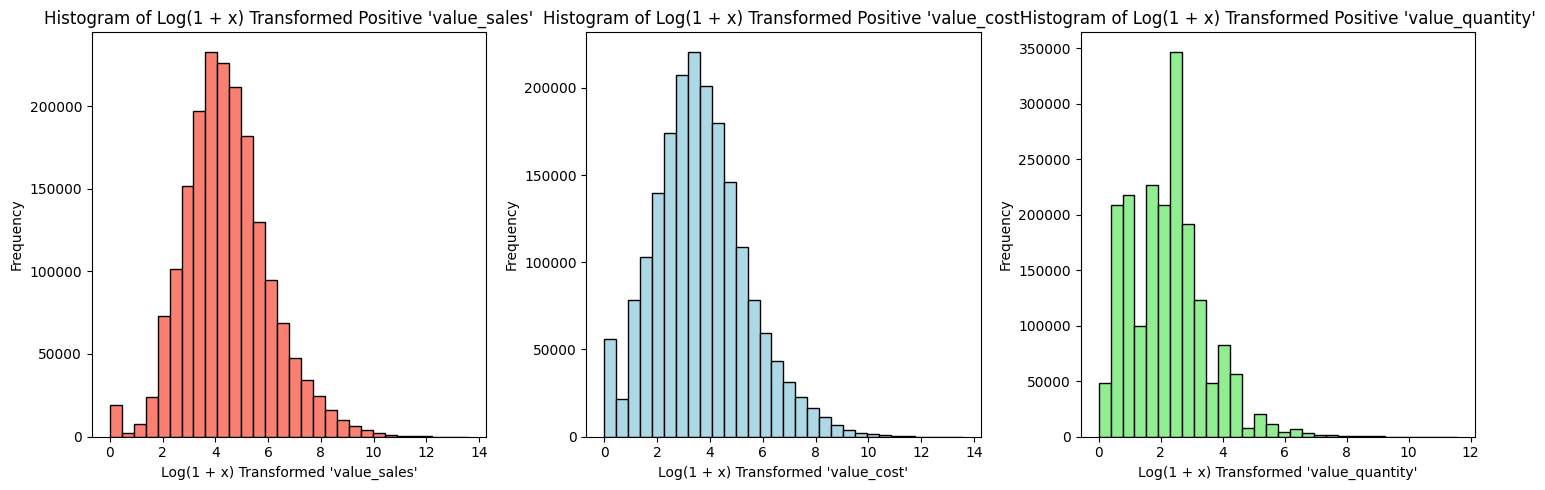

In [95]:
import matplotlib.pyplot as plt

# Filter out negative values for each transformed column
positive_sales_log_plus1 = merged_data[merged_data['value_sales_log_plus1_transformed'] >= 0]['value_sales_log_plus1_transformed']
positive_cost_log_plus1 = merged_data[merged_data['value_cost_log_plus1_transformed'] >= 0]['value_cost_log_plus1_transformed']
positive_quantity_log_plus1 = merged_data[merged_data['value_quantity_log_plus1_transformed'] >= 0]['value_quantity_log_plus1_transformed']

# Plot histograms for only positive values in each transformed column
plt.figure(figsize=(15, 5))

# Histogram for value_sales_log_plus1_transformed
plt.subplot(1, 3, 1)
plt.hist(positive_sales_log_plus1, bins=30, color='salmon', edgecolor='black')
plt.title("Histogram of Log(1 + x) Transformed Positive 'value_sales'")
plt.xlabel("Log(1 + x) Transformed 'value_sales'")
plt.ylabel("Frequency")

# Histogram for value_cost_log_plus1_transformed
plt.subplot(1, 3, 2)
plt.hist(positive_cost_log_plus1, bins=30, color='lightblue', edgecolor='black')
plt.title("Histogram of Log(1 + x) Transformed Positive 'value_cost'")
plt.xlabel("Log(1 + x) Transformed 'value_cost'")
plt.ylabel("Frequency")

# Histogram for value_quantity_log_plus1_transformed
plt.subplot(1, 3, 3)
plt.hist(positive_quantity_log_plus1, bins=30, color='lightgreen', edgecolor='black')
plt.title("Histogram of Log(1 + x) Transformed Positive 'value_quantity'")
plt.xlabel("Log(1 + x) Transformed 'value_quantity'")
plt.ylabel("Frequency")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

1. value_sales (Log(1 + x) Transformed)
- Distribution: The transformed value_sales data shows a more balanced distribution compared to a raw, typically skewed dataset. The histogram has a peak around 4, indicating that many values fall within this range.
- Compression of High Values: The transformation compresses the higher end of the range, seen by the spread of values around 8–12, which likely would have been much larger without transformation. This is characteristic of log transformation, making high values more comparable to smaller ones.
- Zero Values: Since the transformation includes log(1 + x), any zero values in the original data would now be represented at log(1) = 0, preventing the loss of data points.
  
2. value_cost (Log(1 + x) Transformed)
- Distribution: The value_cost transformed data also displays a relatively symmetric pattern with a peak around 3. This indicates that most values of value_cost fall within this range.
- Tail Distribution: There’s a notable tail extending from about 5 onwards, indicating the presence of higher values, though less prominent due to the compression effect of log transformation.
- Zero Handling: As with value_sales, any zero values are preserved, appearing at log(1) = 0, allowing the full range of data, including zero, to be captured effectively.
  
3. value_quantity (Log(1 + x) Transformed)
- Distribution: The value_quantity transformed data shows a wider spread compared to value_sales and value_cost, with a peak around 3.5–4. This suggests that the transformed data has slightly higher variance, possibly due to a wider range of original values.
- Extended Tail: Similar to value_cost, there is a tail reaching from about 6 onwards, indicating a small set of higher values that are less compressed than the peak area.
- Zero Values: The log(1 + x) approach ensures that zero values are retained as 0, which is essential for datasets where zero may carry meaningful information.

- Calculates the skewness for each column after applying the log(1 + x) transformation, considering only non-negative values (≥ 0).

In [96]:
from scipy.stats import skew

# Filter out negative values for each transformed column and calculate skewness
sales_log_plus1_skew = skew(merged_data[merged_data['value_sales_log_plus1_transformed'] >= 0]['value_sales_log_plus1_transformed'])
cost_log_plus1_skew = skew(merged_data[merged_data['value_cost_log_plus1_transformed'] >= 0]['value_cost_log_plus1_transformed'])
quantity_log_plus1_skew = skew(merged_data[merged_data['value_quantity_log_plus1_transformed'] >= 0]['value_quantity_log_plus1_transformed'])

# Display the skewness results
print("Skewness of Log(1 + x) Transformed Positive Values:")
print(f"value_sales_log_plus1_transformed: {sales_log_plus1_skew}")
print(f"value_cost_log_plus1_transformed: {cost_log_plus1_skew}")
print(f"value_quantity_log_plus1_transformed: {quantity_log_plus1_skew}")

Skewness of Log(1 + x) Transformed Positive Values:
value_sales_log_plus1_transformed: 0.3988138427590785
value_cost_log_plus1_transformed: 0.4509351020455682
value_quantity_log_plus1_transformed: 0.8093614276248743


1. Reduced Skewness: All three columns show a reduced skewness due to the log(1 + x) transformation, making them more suitable for further statistical analysis, as this transformation typically improves normality.
2. Preserving Zero Values: The log(1 + x) approach allows zero values to be retained in the dataset as log(1) = 0, preventing any data loss or distortion that could have arisen if zero values were simply removed.
3. Impact on Positive Data Only: By applying this transformation to only positive values, the log transformation effectively handles both large and small positive values while retaining the structure of the data.

- Preview data after Log Transformation

In [97]:
merged_data.head()

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,...,order_date,dss_update_time,accounting_year,accounting_month,accounting_day,day_gap,order_group,value_sales_log_plus1_transformed,value_cost_log_plus1_transformed,value_quantity_log_plus1_transformed
0,2012-05-09,2012,11,2012,5,9,101,411800601,410,GENIE8WWWBC,...,2012-05-09,49:58.7,2012,5,9,0,Normal Order,5.390897,5.188489,4.442651
1,2012-02-16,2012,8,2012,2,16,101,361000403,300,GENIE8WWWBC,...,2012-02-16,49:58.7,2012,2,16,0,Normal Order,3.670715,3.275513,2.564949
2,2012-05-09,2012,11,2012,5,9,101,361000403,300,GENIE8WWWBC,...,2012-05-08,49:58.7,2012,5,9,1,Normal Order,3.718438,3.275513,2.564949
3,2012-05-18,2012,11,2012,5,18,101,565540415,500,GENIE8WWWBC,...,2012-05-18,49:58.7,2012,5,18,0,Other,3.049273,2.619467,1.945910
4,2012-01-09,2012,7,2012,1,9,101,565540415,500,GENIE8WWWBC,...,2012-01-09,49:58.7,2012,1,9,0,Other,3.002708,2.619467,1.945910


### 7. Handling Categorical Variables
- Convert categorical variables to numeric form if required for analysis (e.g., one-hot encoding).
- Combine similar categories to reduce complexity (e.g., grouping rare categories together).

1. Dropping Redundant Date-Related Columns
- The redundant date-related columns (fiscal_year, fiscal_month, calendar_year, calendar_month, calendar_day, accounting_year, accounting_month, and accounting_day) were removed to simplify the dataset, as their information can be derived from primary date fields like accounting_date, invoice_date, and order_date. Dropping these columns reduces redundancy, minimizes multicollinearity, and improves processing efficiency, which is especially beneficial for large datasets. By keeping only essential date columns, the dataset remains adaptable, allowing for flexible creation of custom time-based features while preserving clarity and interpretability in time series analysis.

In [98]:
# Define the columns to drop
columns_to_drop = [
    'fiscal_year', 'fiscal_month', 'calendar_year', 'calendar_month', 
    'calendar_day', 'accounting_year', 'accounting_month', 'accounting_day'
]

# Drop the columns from the DataFrame
merged_data = merged_data.drop(columns=columns_to_drop)

# Verify the result
print("Remaining columns after drop:", merged_data.columns)

Remaining columns after drop: Index(['accounting_date', 'company_code', 'customer_code',
       'customer_district_code', 'item_code', 'business_area_code',
       'item_group_code', 'item_class_code', 'item_type', 'bonus_group_code',
       'environment_group_code', 'technology_group_code',
       'commission_group_code', 'reporting_classification', 'light_source',
       'warehouse_code', 'abc_class_code', 'abc_class_volume',
       'business_chain_l1_code', 'business_chain_l1_name',
       'contact_method_code', 'salesperson_code', 'order_type_code',
       'market_segment', 'value_sales', 'value_cost', 'value_quantity',
       'value_price_adjustment', 'currency', 'invoice_number', 'line_number',
       'invoice_date', 'customer_order_number', 'order_date',
       'dss_update_time', 'day_gap', 'order_group',
       'value_sales_log_plus1_transformed', 'value_cost_log_plus1_transformed',
       'value_quantity_log_plus1_transformed'],
      dtype='object')


2. Grouping Rare Categories:
- The first step groups rare categories (those that appear in less than 1% of the data) into a single category labeled "Other" for each categorical column in categorical_cols.
- For each column, value_counts(normalize=True) calculates the frequency of each category as a proportion.
- Categories with a frequency below 0.01 are identified as rare_categories.
- The .apply(lambda x: 'Other' if x in rare_categories else x) statement replaces any rare category with "Other" in the column. This helps reduce the number of unique categories, which is beneficial for models by decreasing noise and complexity.

In [99]:
# Define thresholds for comparison
thresholds = [0.01, 0.05]
# List of categorical columns that actually exist in merged_data
categorical_cols = [
    col for col in [
    'business_area_code', 
        'item_group_code', 
        'item_class_code',
        'item_type',
        'bonus_group_code', 
        'environment_group_code', 
        'technology_group_code', 
        'commission_group_code', 
        'reporting_classification', 
        'light_source', 
        'warehouse_code', 
        'abc_class_code',
        'abc_class_volume',
        'business_chain_l1_code',  
        'contact_method_code',  
        'order_type_code'
    ] if col in merged_data.columns
]
for threshold in thresholds:
    # Make a copy of the original data for each threshold
    temp_data = merged_data.copy()

    # Apply grouping of rare categories for each categorical column
    for col in categorical_cols:
        category_counts = temp_data[col].value_counts(normalize=True)
        rare_categories = category_counts[category_counts < threshold].index
        temp_data[col] = temp_data[col].apply(lambda x: 'Other' if x in rare_categories else x)

    # Display the count of unique groups for each threshold
    print(f"\nNumber of unique groups after grouping rare categories with threshold {int(threshold*100)}%:")
    for col in categorical_cols:
        unique_count = temp_data[col].nunique()
        print(f"  {col}: {unique_count} unique groups")


Number of unique groups after grouping rare categories with threshold 1%:
  business_area_code: 11 unique groups
  item_group_code: 25 unique groups
  item_class_code: 23 unique groups
  item_type: 7 unique groups
  bonus_group_code: 2 unique groups
  environment_group_code: 6 unique groups
  technology_group_code: 15 unique groups
  commission_group_code: 3 unique groups
  reporting_classification: 2 unique groups
  light_source: 3 unique groups
  warehouse_code: 23 unique groups
  abc_class_code: 10 unique groups
  abc_class_volume: 4 unique groups
  business_chain_l1_code: 17 unique groups
  contact_method_code: 3 unique groups
  order_type_code: 8 unique groups

Number of unique groups after grouping rare categories with threshold 5%:
  business_area_code: 6 unique groups
  item_group_code: 2 unique groups
  item_class_code: 6 unique groups
  item_type: 5 unique groups
  bonus_group_code: 2 unique groups
  environment_group_code: 5 unique groups
  technology_group_code: 10 unique 

- Explanation of Threshold Selection (1% and 5%)
1. Purpose of Grouping Rare Categories: When working with categorical data, especially in cases where categories are numerous and imbalanced, rare categories can add noise to the model. Grouping rare categories helps reduce the number of unique values, which simplifies the model, reduces overfitting, and can improve model performance.
2. 1% Threshold: A lower threshold means only the very rare categories (those appearing in less than 1% of the data) are grouped as "Other." This allows us to retain more detail from the original categories while still reducing some complexity. It might be suitable if the model benefits from having more detailed categorical distinctions.
3. 5% Threshold: A higher threshold groups more categories together, making the data even simpler. This can be beneficial for models that work better with fewer categorical variables or when the focus is on general patterns rather than finer distinctions.

In [100]:
# Initialize empty DataFrames for the two thresholds
data_1_percent = merged_data.copy()
data_5_percent = merged_data.copy()

In [101]:
# Group rare categories in data_1_percent for each categorical column based on 1% threshold
for col in categorical_cols:
    # Calculate the frequency of each category as a proportion
    category_counts = data_1_percent[col].value_counts(normalize=True)
    
    # Identify rare categories that appear in less than 1% of the data
    rare_categories = category_counts[category_counts < 0.01].index
    
    # Replace rare categories with 'Other'
    data_1_percent[col] = data_1_percent[col].apply(lambda x: 'Other' if x in rare_categories else x)

In [102]:
# Group rare categories in data_5_percent for each categorical column based on 5% threshold
for col in categorical_cols:
    # Calculate the frequency of each category as a proportion
    category_counts = data_5_percent[col].value_counts(normalize=True)
    
    # Identify rare categories that appear in less than 5% of the data
    rare_categories = category_counts[category_counts < 0.05].index
    
    # Replace rare categories with 'Other'
    data_5_percent[col] = data_5_percent[col].apply(lambda x: 'Other' if x in rare_categories else x)

In [103]:
# Display the first few rows of each DataFrame to verify
print("DataFrame with 1% Threshold Grouping:")
data_1_percent.head()

DataFrame with 1% Threshold Grouping:


,accounting_date,company_code,customer_code,customer_district_code,item_code,business_area_code,item_group_code,item_class_code,item_type,bonus_group_code,...,line_number,invoice_date,customer_order_number,order_date,dss_update_time,day_gap,order_group,value_sales_log_plus1_transformed,value_cost_log_plus1_transformed,value_quantity_log_plus1_transformed
0,2012-05-09,101,411800601,410,GENIE8WWWBC,LMP,LMP01008,LMP01,5,Trade,...,1,2012-05-09,2865354,2012-05-09,49:58.7,0,Normal Order,5.390897,5.188489,4.442651
1,2012-02-16,101,361000403,300,GENIE8WWWBC,LMP,LMP01008,LMP01,5,Trade,...,1,2012-02-16,2833515,2012-02-16,49:58.7,0,Normal Order,3.670715,3.275513,2.564949
2,2012-05-09,101,361000403,300,GENIE8WWWBC,LMP,LMP01008,LMP01,5,Trade,...,1,2012-05-09,2864857,2012-05-08,49:58.7,1,Normal Order,3.718438,3.275513,2.564949
3,2012-05-18,101,565540415,500,GENIE8WWWBC,LMP,LMP01008,LMP01,5,Trade,...,1,2012-05-18,2869759,2012-05-18,49:58.7,0,Other,3.049273,2.619467,1.945910
4,2012-01-09,101,565540415,500,GENIE8WWWBC,LMP,LMP01008,LMP01,5,Trade,...,1,2012-01-09,2819189,2012-01-09,49:58.7,0,Other,3.002708,2.619467,1.945910


In [104]:
data_1_percent.shape

(1971500, 40)

In [105]:
print("\nDataFrame with 5% Threshold Grouping:")
data_5_percent.head()


DataFrame with 5% Threshold Grouping:


,accounting_date,company_code,customer_code,customer_district_code,item_code,business_area_code,item_group_code,item_class_code,item_type,bonus_group_code,...,line_number,invoice_date,customer_order_number,order_date,dss_update_time,day_gap,order_group,value_sales_log_plus1_transformed,value_cost_log_plus1_transformed,value_quantity_log_plus1_transformed
0,2012-05-09,101,411800601,410,GENIE8WWWBC,LMP,Other,LMP01,5,Trade,...,1,2012-05-09,2865354,2012-05-09,49:58.7,0,Normal Order,5.390897,5.188489,4.442651
1,2012-02-16,101,361000403,300,GENIE8WWWBC,LMP,Other,LMP01,5,Trade,...,1,2012-02-16,2833515,2012-02-16,49:58.7,0,Normal Order,3.670715,3.275513,2.564949
2,2012-05-09,101,361000403,300,GENIE8WWWBC,LMP,Other,LMP01,5,Trade,...,1,2012-05-09,2864857,2012-05-08,49:58.7,1,Normal Order,3.718438,3.275513,2.564949
3,2012-05-18,101,565540415,500,GENIE8WWWBC,LMP,Other,LMP01,5,Trade,...,1,2012-05-18,2869759,2012-05-18,49:58.7,0,Other,3.049273,2.619467,1.945910
4,2012-01-09,101,565540415,500,GENIE8WWWBC,LMP,Other,LMP01,5,Trade,...,1,2012-01-09,2819189,2012-01-09,49:58.7,0,Other,3.002708,2.619467,1.945910


In [106]:
data_5_percent.shape

(1971500, 40)

- Effect of One-Hot Encoding on Category Counts: After grouping, we will apply one-hot encoding, which converts each category into a separate binary column. Having different thresholds (1% and 5%) will result in a different number of unique categories across columns. Therefore, if we applied one-hot encoding directly without separating the DataFrames, the resulting encoded DataFrames would have different structures (different numbers of columns), making it challenging to compare results directly.
- Purpose of Separate DataFrames:
Separate DataFrames ensure that each one has consistent grouping, making it easy to observe the effects of each threshold on the model’s performance independently.

3. One-Hot Encoding:
- After grouping rare categories, one-hot encoding is applied using pd.get_dummies, which converts categorical variables into a series of binary columns.
- The drop_first=True parameter is used to avoid multicollinearity by dropping the first category for each original categorical column. This results in one less column per category, reducing redundancy.

- Using one-hot encoding after grouping rare categories at a 5% threshold streamlines the dataset while preserving key categorical insights. By consolidating categories with less than 5% representation into an "Other" group, we reduce the number of unique categories, effectively lowering the dataset's dimensionality. This simplification enhances modeling efficiency and interpretability, as infrequent categories are grouped together

In [107]:
# List of columns to one-hot encode
columns_to_encode = [
    'business_area_code', 
    'item_group_code', 
    'item_class_code',
    'item_type',
    'bonus_group_code', 
    'environment_group_code', 
    'technology_group_code', 
    'commission_group_code', 
    'reporting_classification', 
    'light_source', 
    'warehouse_code', 
    'abc_class_code',
    'abc_class_volume',
    'business_chain_l1_code',  
    'contact_method_code',  
    'order_type_code'
]

# One-hot encode specified columns in data_5_percent
data_5_percent_encoded = pd.get_dummies(data_5_percent, columns=columns_to_encode, drop_first=False)

# Display shapes to confirm encoding
print("Shape of data after one-hot encoding with 5% threshold:", data_5_percent_encoded.shape)

Shape of data after one-hot encoding with 5% threshold: (1971500, 96)


In [108]:
data_5_percent_encoded.head()

,accounting_date,company_code,customer_code,customer_district_code,item_code,business_chain_l1_name,salesperson_code,market_segment,value_sales,value_cost,...,business_chain_l1_code_MED,business_chain_l1_code_NES,business_chain_l1_code_Other,business_chain_l1_code_ZZ1,business_chain_l1_code_ZZ2,contact_method_code_NA,contact_method_code_Other,order_type_code_EDI,order_type_code_NOR,order_type_code_Other
0,2012-05-09,101,411800601,410,GENIE8WWWBC,ElectraCorp Ltd,T612,Commercial & Industrial,218.40,178.1976,...,False,False,False,False,False,True,False,False,True,False
1,2012-02-16,101,361000403,300,GENIE8WWWBC,BrightPower Solutions,P345,Commercial & Industrial,38.28,25.4568,...,False,False,False,False,False,True,False,False,True,False
2,2012-05-09,101,361000403,300,GENIE8WWWBC,BrightPower Solutions,P345,Commercial & Industrial,40.20,25.4568,...,False,False,False,False,False,True,False,False,True,False
3,2012-05-18,101,565540415,500,GENIE8WWWBC,Global Electric Wholesalers,T504,Commercial & Industrial,20.10,12.7284,...,False,False,True,False,False,True,False,True,False,False
4,2012-01-09,101,565540415,500,GENIE8WWWBC,Global Electric Wholesalers,T504,Commercial & Industrial,19.14,12.7284,...,False,False,True,False,False,True,False,True,False,False


### 8. Feature Engineering
- Creating New Features: Generate new variables based on existing ones to capture additional insights.
- Dropping Irrelevant Features: Remove features that do not add value or are highly correlated, to avoid multicollinearity.

In [109]:
# Calculate Profit
data_5_percent_encoded['Profit'] = data_5_percent_encoded['value_sales'] - data_5_percent_encoded['value_cost']

# Calculate Unit Price
data_5_percent_encoded['Unit_Price'] = data_5_percent_encoded['value_sales'] / data_5_percent_encoded['value_quantity']
# Ensure no division by zero errors
data_5_percent_encoded['Unit_Price'] = data_5_percent_encoded['Unit_Price'].replace([float('inf'), -float('inf')], 0)

# Calculate Profit Margin
data_5_percent_encoded['Profit_Margin'] = (data_5_percent_encoded['Profit'] / data_5_percent_encoded['value_sales']) * 100
# Replace any NaN or infinite values in Profit_Margin with 0, for cases where value_sales might be zero
data_5_percent_encoded['Profit_Margin'] = data_5_percent_encoded['Profit_Margin'].fillna(0).replace([float('inf'), -float('inf')], 0)

In [110]:
data_5_percent_encoded.head()

,accounting_date,company_code,customer_code,customer_district_code,item_code,business_chain_l1_name,salesperson_code,market_segment,value_sales,value_cost,...,business_chain_l1_code_ZZ1,business_chain_l1_code_ZZ2,contact_method_code_NA,contact_method_code_Other,order_type_code_EDI,order_type_code_NOR,order_type_code_Other,Profit,Unit_Price,Profit_Margin
0,2012-05-09,101,411800601,410,GENIE8WWWBC,ElectraCorp Ltd,T612,Commercial & Industrial,218.40,178.1976,...,False,False,True,False,False,True,False,40.2024,2.60,18.407692
1,2012-02-16,101,361000403,300,GENIE8WWWBC,BrightPower Solutions,P345,Commercial & Industrial,38.28,25.4568,...,False,False,True,False,False,True,False,12.8232,3.19,33.498433
2,2012-05-09,101,361000403,300,GENIE8WWWBC,BrightPower Solutions,P345,Commercial & Industrial,40.20,25.4568,...,False,False,True,False,False,True,False,14.7432,3.35,36.674627
3,2012-05-18,101,565540415,500,GENIE8WWWBC,Global Electric Wholesalers,T504,Commercial & Industrial,20.10,12.7284,...,False,False,True,False,True,False,False,7.3716,3.35,36.674627
4,2012-01-09,101,565540415,500,GENIE8WWWBC,Global Electric Wholesalers,T504,Commercial & Industrial,19.14,12.7284,...,False,False,True,False,True,False,False,6.4116,3.19,33.498433


In [111]:
# Calculate min, max, and average for Profit, Unit Price, and Profit Margin with two decimal places
summary_stats = data_5_percent_encoded[['Profit', 'Unit_Price', 'Profit_Margin']].agg(['min', 'max', 'mean']).round(2)

# Display the results
summary_stats

,Profit,Unit_Price,Profit_Margin
min,-255917.56,0.00,-1764706.00
max,246407.77,239216.00,100.00
mean,146.24,43.63,43.65


In [112]:
# Convert negative Profit_Margin values to 0
data_5_percent_encoded['Profit_Margin'] = data_5_percent_encoded['Profit_Margin'].apply(lambda x: max(x, 0))

In our dataset, the Profit_Margin column includes a mix of positive and negative values. Positive values indicate profitable transactions, while negative values indicate transactions with a loss. However, for the purpose of this analysis, our focus is primarily on distinguishing between profitable and non-profitable transactions, rather than quantifying the degree of loss.

To simplify this distinction, we decided to transform all negative values in the Profit_Margin column to 0. This approach allows us to treat Profit_Margin as an indicator of profitability, where:

0 represents a non-profitable transaction.
Positive values represent profitable transactions, with higher values indicating greater profitability.

In [113]:
# Calculate min, max, and average for Profit, Unit Price, and Profit Margin with two decimal places
summary_stats = data_5_percent_encoded[['Profit', 'Unit_Price', 'Profit_Margin']].agg(['min', 'max', 'mean']).round(2)

# Display the results
summary_stats

,Profit,Unit_Price,Profit_Margin
min,-255917.56,0.00,0.00
max,246407.77,239216.00,100.00
mean,146.24,43.63,50.89


- Histogram and skewness before data transfromed

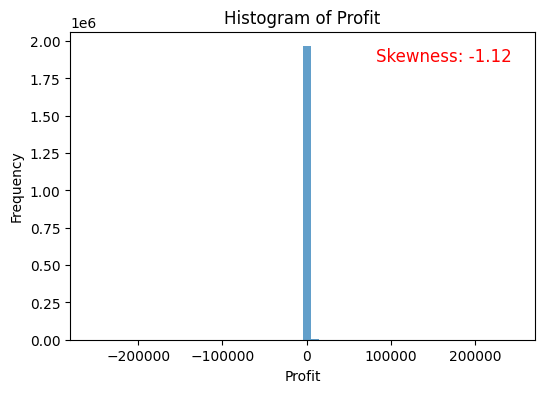

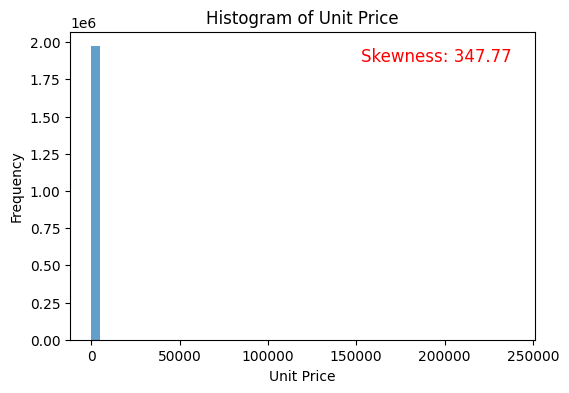

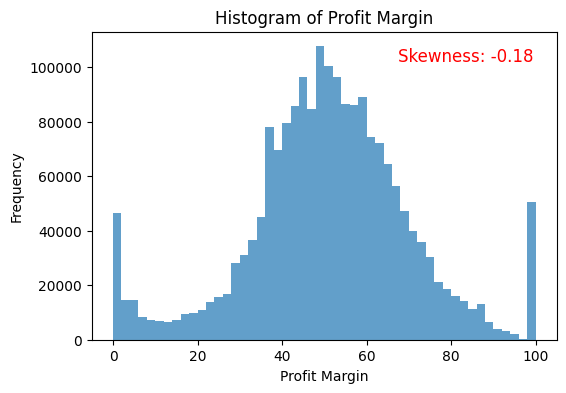

In [114]:
# Histogram and skewness for Profit
plt.figure(figsize=(6, 4))
plt.hist(data_5_percent_encoded['Profit'], bins=50, alpha=0.7)
plt.title('Histogram of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
profit_skewness = skew(data_5_percent_encoded['Profit'].dropna())
plt.text(0.95, 0.95, f'Skewness: {profit_skewness:.2f}', 
         verticalalignment='top', horizontalalignment='right', 
         transform=plt.gca().transAxes, color='red', fontsize=12)
plt.show()

# Histogram and skewness for Unit Price
plt.figure(figsize=(6, 4))
plt.hist(data_5_percent_encoded['Unit_Price'], bins=50, alpha=0.7)
plt.title('Histogram of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
unit_price_skewness = skew(data_5_percent_encoded['Unit_Price'].dropna())
plt.text(0.95, 0.95, f'Skewness: {unit_price_skewness:.2f}', 
         verticalalignment='top', horizontalalignment='right', 
         transform=plt.gca().transAxes, color='red', fontsize=12)
plt.show()

# Histogram and skewness for Profit Margin
plt.figure(figsize=(6, 4))
plt.hist(data_5_percent_encoded['Profit_Margin'], bins=50, alpha=0.7)
plt.title('Histogram of Profit Margin')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
profit_margin_skewness = skew(data_5_percent_encoded['Profit_Margin'].dropna())
plt.text(0.95, 0.95, f'Skewness: {profit_margin_skewness:.2f}', 
         verticalalignment='top', horizontalalignment='right', 
         transform=plt.gca().transAxes, color='red', fontsize=12)
plt.show()

- Using specific transformations to the Profit and Unit_Price columns to reduce skewness and make the data closer to a normal distribution, which can be beneficial for various types of analyses, such as regression modeling or statistical testing.

In [115]:
# Apply square root transformation for Profit (on absolute values to handle negatives)
data_5_percent_encoded['Transformed_Profit'] = np.sqrt(data_5_percent_encoded['Profit'].abs()) * np.sign(data_5_percent_encoded['Profit'])
print("Skewness after Sqrt Transformation (Transformed_Profit):", skew(data_5_percent_encoded['Transformed_Profit'].dropna()))

# Apply log transformation for Unit Price, adding 1 to handle zeros
data_5_percent_encoded['Transformed_Unit_Price'] = np.log1p(data_5_percent_encoded['Unit_Price'])
print("Skewness after Log Transformation (Transformed_Unit_Price):", skew(data_5_percent_encoded['Transformed_Unit_Price'].dropna()))

Skewness after Sqrt Transformation (Transformed_Profit): 3.695971542989159
Skewness after Log Transformation (Transformed_Unit_Price): 0.42771816479812613


- Histogram and skewness after data transfromed

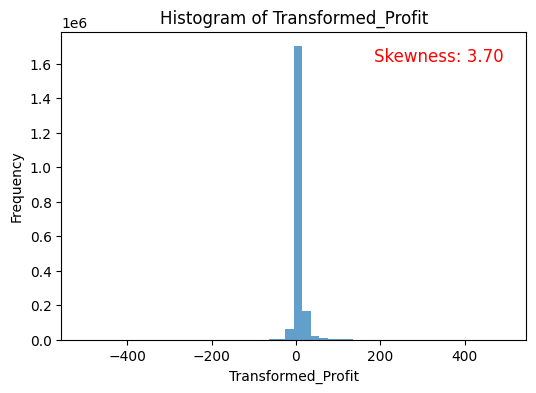

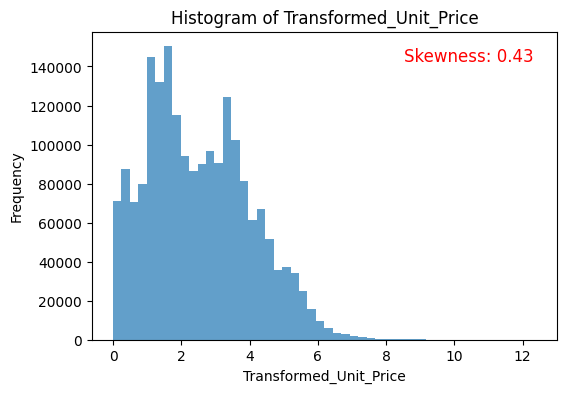

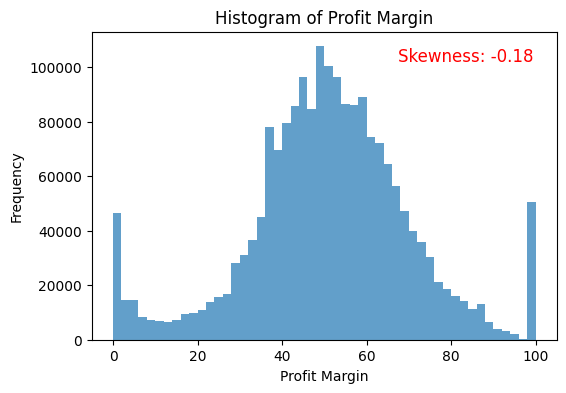

In [116]:
# Histogram and skewness for Profit
plt.figure(figsize=(6, 4))
plt.hist(data_5_percent_encoded['Transformed_Profit'], bins=50, alpha=0.7)
plt.title('Histogram of Transformed_Profit')
plt.xlabel('Transformed_Profit')
plt.ylabel('Frequency')
profit_skewness = skew(data_5_percent_encoded['Transformed_Profit'].dropna())
plt.text(0.95, 0.95, f'Skewness: {profit_skewness:.2f}', 
         verticalalignment='top', horizontalalignment='right', 
         transform=plt.gca().transAxes, color='red', fontsize=12)
plt.show()

# Histogram and skewness for Unit Price
plt.figure(figsize=(6, 4))
plt.hist(data_5_percent_encoded['Transformed_Unit_Price'], bins=50, alpha=0.7)
plt.title('Histogram of Transformed_Unit_Price')
plt.xlabel('Transformed_Unit_Price')
plt.ylabel('Frequency')
unit_price_skewness = skew(data_5_percent_encoded['Transformed_Unit_Price'].dropna())
plt.text(0.95, 0.95, f'Skewness: {unit_price_skewness:.2f}', 
         verticalalignment='top', horizontalalignment='right', 
         transform=plt.gca().transAxes, color='red', fontsize=12)
plt.show()

# Histogram and skewness for Profit Margin
plt.figure(figsize=(6, 4))
plt.hist(data_5_percent_encoded['Profit_Margin'], bins=50, alpha=0.7)
plt.title('Histogram of Profit Margin')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
profit_margin_skewness = skew(data_5_percent_encoded['Profit_Margin'].dropna())
plt.text(0.95, 0.95, f'Skewness: {profit_margin_skewness:.2f}', 
         verticalalignment='top', horizontalalignment='right', 
         transform=plt.gca().transAxes, color='red', fontsize=12)
plt.show()

# Section 2: Exploratory Data Analysis

In [117]:
df =  cleaned_data.copy()

### Insight 1: Warehouses with the highest damage and return rate

In [118]:
warehouse_metadata = pd.read_excel("../data/raw/Metadata.xlsx", sheet_name='warehouse_code')
#clean blank space using strip
warehouse_metadata['warehouse_code'] = warehouse_metadata['warehouse_code'].str.strip()
warehouse_metadata['warehouse_code&name'] = warehouse_metadata['warehouse_code&name'].str.replace('*', '')
warehouse_metadata['warehouse_code&name'] = warehouse_metadata['warehouse_code&name'].str.strip()


In [119]:
# Filter for returned or damaged items
returned_or_damaged = df[df['order_type_code'].isin(['CDG', 'CRR'])]

# Group by warehouse_code to calculate count of returned/damaged items
warehouse_damage_count = returned_or_damaged.groupby('warehouse_code').size().reset_index(name='damage_return_count')

# Count the total number of orders by warehouse_code
total_orders_count_by_warehouse = df.groupby('warehouse_code').size().reset_index(name='total_count')

# Merge to calculate return/damage rate by warehouse_code
warehouse_analysis = pd.merge(warehouse_damage_count, total_orders_count_by_warehouse, on='warehouse_code', how='right').fillna(0)
warehouse_analysis['damage_return_rate'] = warehouse_analysis['damage_return_count'] / warehouse_analysis['total_count']

# Sort to identify warehouses with the highest damage/return rate
warehouse_analysis = warehouse_analysis.sort_values(by='damage_return_rate', ascending=False)
warehouse_analysis.head()

,warehouse_code,damage_return_count,total_count,damage_return_rate
24,CT0,27.0,105,0.257143
25,CV0,1267.0,8650,0.146474
15,5T0,457.0,3736,0.122323
21,CQ0,1203.0,11911,0.100999
12,5Q1,716.0,7740,0.092506


In [120]:
plot1 = warehouse_analysis[:10]
plot1 = pd.merge(plot1, warehouse_metadata, on='warehouse_code', how='left')
plot1.fillna('Unknown', inplace=True)
plot1

,warehouse_code,damage_return_count,total_count,damage_return_rate,warehouse_code&name
0,CT0,27.0,105,0.257143,CT0 - Crompton - Tasmania
1,CV0,1267.0,8650,0.146474,CV0 - Crompton - Melbourne
2,5T0,457.0,3736,0.122323,5T0 - Gerard Trade - Tasmania
3,CQ0,1203.0,11911,0.100999,CQ0 - Crompton - Brisbane
4,5Q1,716.0,7740,0.092506,5Q1 - Gerard Trade - Townsville
5,5N1,3620.0,47720,0.075859,5N1 - Gerard Trade - Padstow
6,Q0,1676.0,22254,0.075312,Q0 - PIERLITE - Queensland
7,5V0,6632.0,100253,0.066153,5V0 - Gerard Trade - Melbourne
8,5Q0,5778.0,88177,0.065527,5Q0 - Gerard Trade - Brisbane
9,1T0,35.0,612,0.057190,1T0 - Gerard Lighting - Tasmania


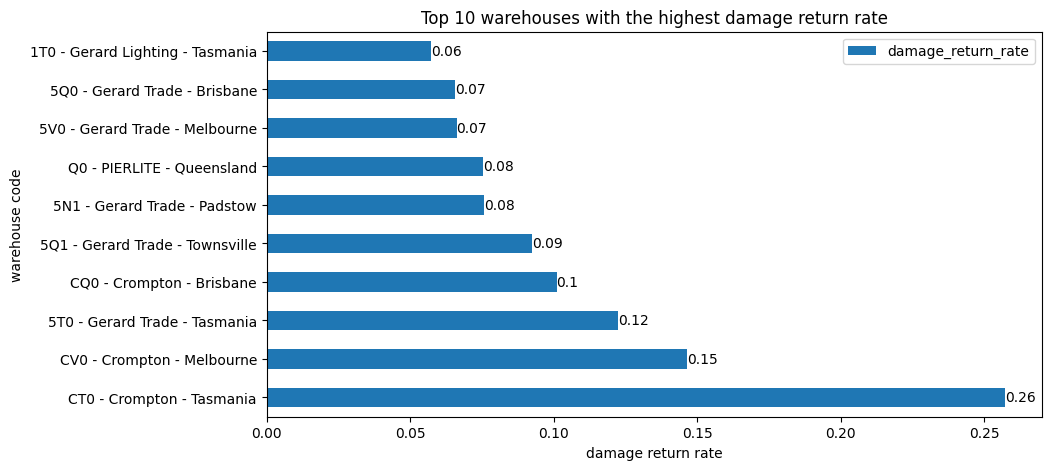

In [121]:
plot1.plot(kind='barh', x='warehouse_code&name', y='damage_return_rate', figsize=(10, 5))
plt.title("Top 10 warehouses with the highest damage return rate")
plt.xlabel("damage return rate")
plt.ylabel("warehouse code")
plt.xticks(rotation=0);
#add value label
for i, v in enumerate(plot1['damage_return_rate']):
    plt.text(v, i, str(round(v, 2)), va='center')
plt.savefig("../reports/figures/warehouse_damage_return_rate.png", bbox_inches='tight')
plt.show()

The analysis revealed significant variability in damage return rates across warehouses. From the bar chart, the highest return rate was observed for warehouse code 'CT0 - Crompton - Tasmania', with a rate of 0.26, followed by 'CV0 - Crompton - Melbourne' at 0.18, and '5T0 - Gerard Trade - Tasmania' at 0.12. This insight indicates that specific warehouses have disproportionately high return rates, which could signal handling, packaging, or quality control issues. The insight enables targeted investigations into warehouse processes to identify and address weaknesses. By focusing on the highlighted warehouses, management can better understand and mitigate factors contributing to higher return rates. Reducing these rates can improve customer satisfaction, lower return-related costs, and streamline operations. Additionally, this insight supports resource allocation for process improvements in targeted locations, enhancing overall operational efficiency.

### Insight 2: Damage/Return rate by item type

In [122]:
# Assuming df has columns 'item_code', 'item_type', 'order_type_code'

# Filter for returned or damaged items
returned_or_damaged = df[df['order_type_code'].isin(['CDG', 'CRR'])]

# Group by item_type to calculate count of returned/damaged items
item_type_damage_count = returned_or_damaged.groupby('item_type').size().reset_index(name='damage_return_count')

# Count the total number of orders by item_type
total_orders_count_by_type = df.groupby('item_type').size().reset_index(name='total_count')

# Merge to calculate return/damage rate by item_type
item_type_analysis = pd.merge(item_type_damage_count, total_orders_count_by_type, on='item_type', how='right').fillna(0)
item_type_analysis['damage_return_rate'] = item_type_analysis['damage_return_count'] / item_type_analysis['total_count']

# Sort to identify item types with the highest damage/return rate
item_type_analysis = item_type_analysis.sort_values(by='damage_return_rate', ascending=False)


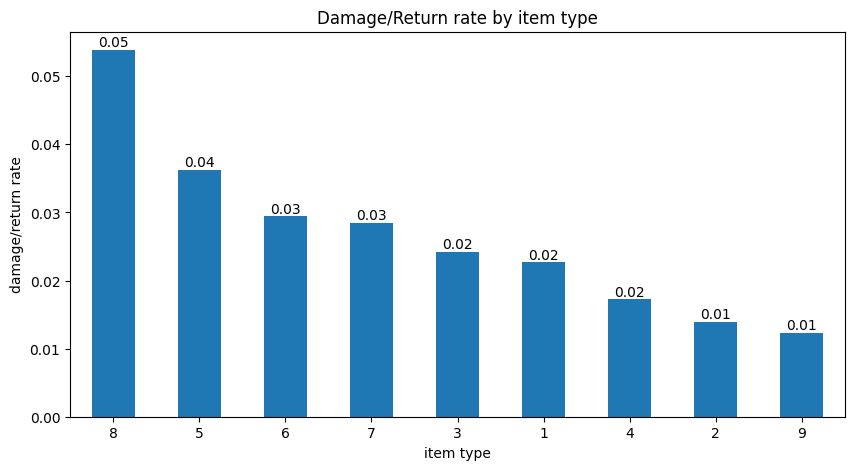

In [123]:
item_type_analysis.plot(kind='bar', x='item_type', y='damage_return_rate', figsize=(10, 5))
plt.title("Damage/Return rate by item type")
plt.ylabel("damage/return rate")
plt.xlabel("item type")
plt.legend().remove()
plt.xticks(rotation=0);
#add value label
for i, v in enumerate(item_type_analysis['damage_return_rate']):
    plt.text(i, v+0.0005, str(round(v, 2)), ha='center')
#save figure
plt.savefig("../reports/figures/item_type_damage_return_rate.png", bbox_inches='tight')
plt.show()

The analysis reveals that item type ‘8’ has the highest damage/return rate at 5%, followed by item type ‘5’ at 4% and ‘6’ at 3%, respectively. This indicates that specific item types are more prone to returns or damages, which could be due to product fragility, packaging issues, or handling concerns. Meanwhile, item types 2, 4, and 9 have the lowest return rates, indicating they are more stable and align well with customer expectations. This insight is valuable for management in identifying and investigating item types with high return rates, suggesting a need for quality improvements. Additionally, enhancing product descriptions and providing proactive customer support can help align customer expectations, reducing returns.

### Insight 3: Unprofitable Transactions by Salesperson

In [124]:
#count rows where cost is greater than sales
cost_greater_sales = df[df['value_cost'] > df['value_sales']] #cost greater than sales
print(f"count of cost greater than sales: {cost_greater_sales.shape[0]}") #count of cost greater than sales
cost_greater_sales[['item_code', 'value_sales', 'value_cost', 'value_quantity', 'value_price_adjustment', 'order_type_code']].head()


count of cost greater than sales: 144093


,item_code,value_sales,value_cost,value_quantity,value_price_adjustment,order_type_code
61,GENIE14WCDLES,-6.38,-4.2428,-2.0,0,CDG
115,GENIE18WCDLES,-95.70,-63.6420,-30.0,0,CDG
176,GENIE11WWWES,-3.28,-1.9300,-1.0,0,CRR
182,GENIE14WCDLBC,-77.56,-59.3992,-28.0,0,CDG
220,GENIE11WCDLES,-2.90,-1.9300,-1.0,0,CRR


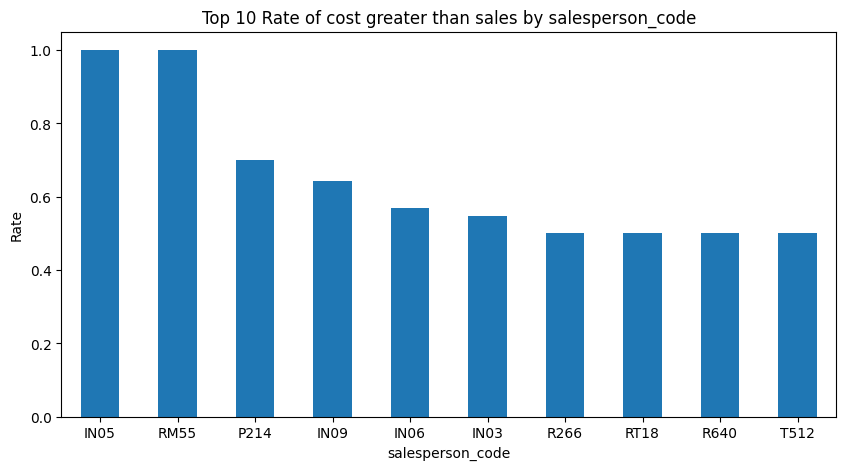

In [125]:
cost_greater_sales_rate = cost_greater_sales['salesperson_code'].value_counts() / df['salesperson_code'].value_counts()
cost_greater_sales_rate.sort_values(ascending=False)[:10].plot(kind='bar', figsize=(10, 5))
plt.title("Top 10 Rate of cost greater than sales by salesperson_code")
plt.ylabel("Rate")
plt.xticks(rotation=0);


The chart reveals that salesperson IN05 has an exceptionally high rate of transactions where costs exceed sales, nearing 100%. This suggests a pattern where IN05 is frequently involved in unprofitable sales, which may be due to factors like pricing inaccuracies, excessive discounts, or issues with specific product lines. Other salespeople, like IN09, IN06, and IN03, also show relatively high rates, although considerably lower than IN05. This trend suggests that certain salespeople are either regularly handling items with pricing or cost issues or might be offering discounts or adjustments that lead to unprofitable sales. This insight is valuable for management as it identifies specific salespeople and items associated with unprofitable sales. Additionally, management can provide focused support or resources to salespeople like IN05 to enhance decision-making and sales effectiveness.

### Insight 4: Monthly Sales by light source

In [126]:
df = data_5_percent.copy()
df['Profit'] = df['value_sales'] - df['value_cost']
df['Profit_margin'] = df['Profit'] / df['value_sales']
df = df[df['order_date'] > "2012-01-01"]

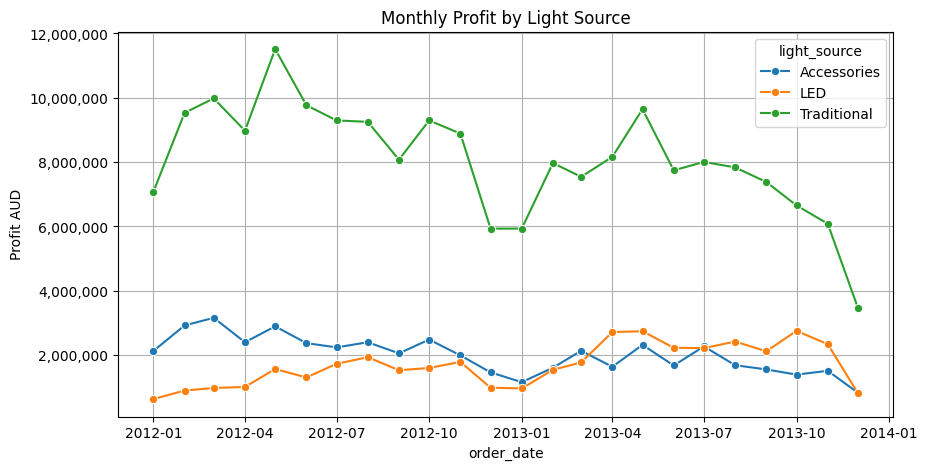

In [127]:
grouped_df = df.groupby([df['order_date'].dt.to_period('M'), 'light_source'])['Profit'].sum().reset_index()
grouped_df['order_date'] = grouped_df['order_date'].dt.to_timestamp()
plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_df, x='order_date', y='Profit', hue='light_source', ci=None, palette='tab10', marker='o')
plt.title('Monthly Profit by Light Source')
plt.ylabel('Profit AUD')
plt.grid()
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)
#save figure
plt.savefig("../reports/figures/monthly_profit_light_source.png", bbox_inches='tight')
plt.show()

The analysis reveals that ‘Traditional’ lighting consistently outperforms other categories in profit, suggesting it dominated the market during this period. However, profits for this category exhibit notable volatility, with peaks potentially linked to specific promotions or seasonal demand cycles. In contrast, ‘LED’ lights show a slow but steady profit growth, indicating gradual consumer adoption, likely due to increasing awareness of energy efficiency. The ‘Accessories’ category maintains a lower and more stable profit level, suggesting either a smaller demand or a niche market for these products. These insights are valuable for management to inform inventory and marketing strategies. The dominance of ‘Traditional’ lighting suggests an opportunity to capitalise on this category during peak seasons, while the growth in LED sales underscores a shift toward sustainable options, warranting increased investment in LED products to capture a growing market.

### Insight 5: Monthly Average Profit margin by light source

In [128]:
df = df[(df != -np.inf).all(axis=1)]
df = df[(df != np.inf).all(axis=1)]
df = df[df['Profit_margin'] >0]


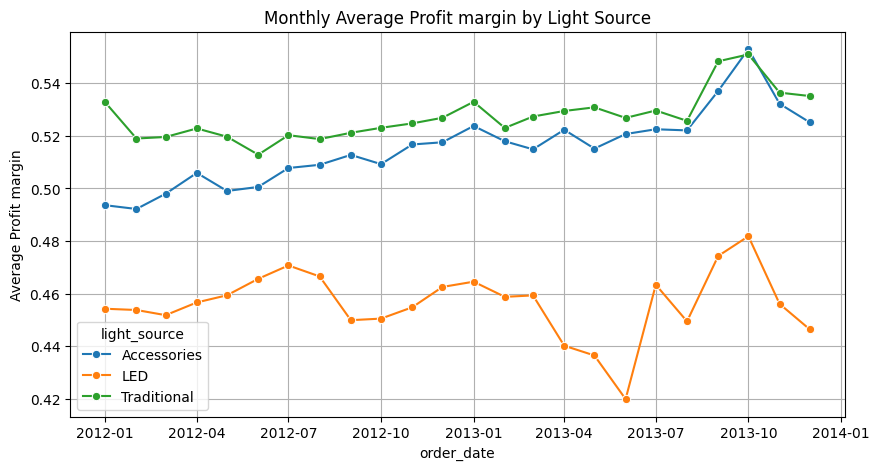

In [129]:
grouped_df = df.groupby([df['order_date'].dt.to_period('M'), 'light_source'])['Profit_margin'].mean().reset_index()
grouped_df['order_date'] = grouped_df['order_date'].dt.to_timestamp()
plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_df, x='order_date', y='Profit_margin', hue='light_source', ci=None, palette='tab10', marker='o')
plt.title('Monthly Average Profit margin by Light Source')
plt.ylabel('Average Profit margin')
plt.grid()
#save figure
plt.savefig("../reports/figures/monthly_average_profit_margin_light_source.png", bbox_inches='tight')
plt.show()

The ‘Traditional’ light source category consistently shows the highest average profit margin, exceeding 50% and trending slightly upward over time, indicating it’s a strong revenue driver. ‘Accessories’ maintain moderate and stable margins, while ‘LED’ profit margins exhibit volatility and a declining trend in mid-2013. This fluctuation in the LED category could signal increasing market competition or pricing adjustments impacting profitability. This analysis offers management valuable insights into profit margins across different light source categories, guiding strategic pricing, production, and marketing decisions. The stable, high margins in ‘Traditional’ lighting suggest a strong revenue base, making it ideal for continued investment and promotion. In contrast, the declining margins for ‘LED’ products indicate challenges that may be mitigated by negotiating supplier costs, optimising production, or adjusting pricing.

# Section 3: Test Sub Sample Differences 

In [130]:
from scipy import stats

In [131]:
sample_test =data_5_percent_encoded.copy()

## Q1. Is there a significant difference in the log-transformed average value_sales between Top Sellers and Low Sellers categories?

To determine if there is a significant difference in the average log-transformed value_sales between Top Sellers and Low Sellers (classified by abc_class_code as 'A' for Top Sellers and 'C' for Low Sellers), we will perform a two-sample t-test to compare the means of these two independent groups.

**Formulate Hypotheses:**

Null Hypothesis (H₀) -  The mean of the log-transformed value_sales is the same for Top Sellers and Low Sellers. (H₀:μTopSellers =μLowSellers)

Alternative Hypothesis (H₁) - The mean of the log-transformed value_sales is different between Top Sellers and Low Sellers. (H₁:μTopSellers =/ μLowSellers)

​**Analysis Approach** If the p-value from the t-test is less than the chosen significance level (usually 0.05), we will reject the null hypothesis, suggesting a significant difference in the average log-transformed value_sales between Top Sellers and Low Sellers. If the p-value is greater than 0.05, we will fail to reject the null hypothesis, indicating no significant difference in the means of these two groups.

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Filtering data for top sellers (A) and low sellers (C)
abc_class = sample_test[(sample_test['abc_class_code_A'] == 1) | (sample_test['abc_class_code_C'] == 1)]

# Separating data into two groups for the t-test
top_sellers_sales = abc_class[abc_class['abc_class_code_A'] == 1]['value_sales_log_plus1_transformed']
low_sellers_sales = abc_class[abc_class['abc_class_code_C'] == 1]['value_sales_log_plus1_transformed']

# Performing the two-sample t-test
t_stat, p_value = stats.ttest_ind(top_sellers_sales, low_sellers_sales, equal_var=False)  # Using Welch's t-test for unequal variance

# Displaying the test results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The mean log-transformed value_sales are significantly different between Top Sellers and Low Sellers.")
else:
    print("There is no significant difference in the log-transformed value_sales between Top Sellers and Low Sellers.")

T-statistic: -5.987554554500018
P-value: 2.131954785068421e-09
The mean log-transformed value_sales are significantly different between Top Sellers and Low Sellers.


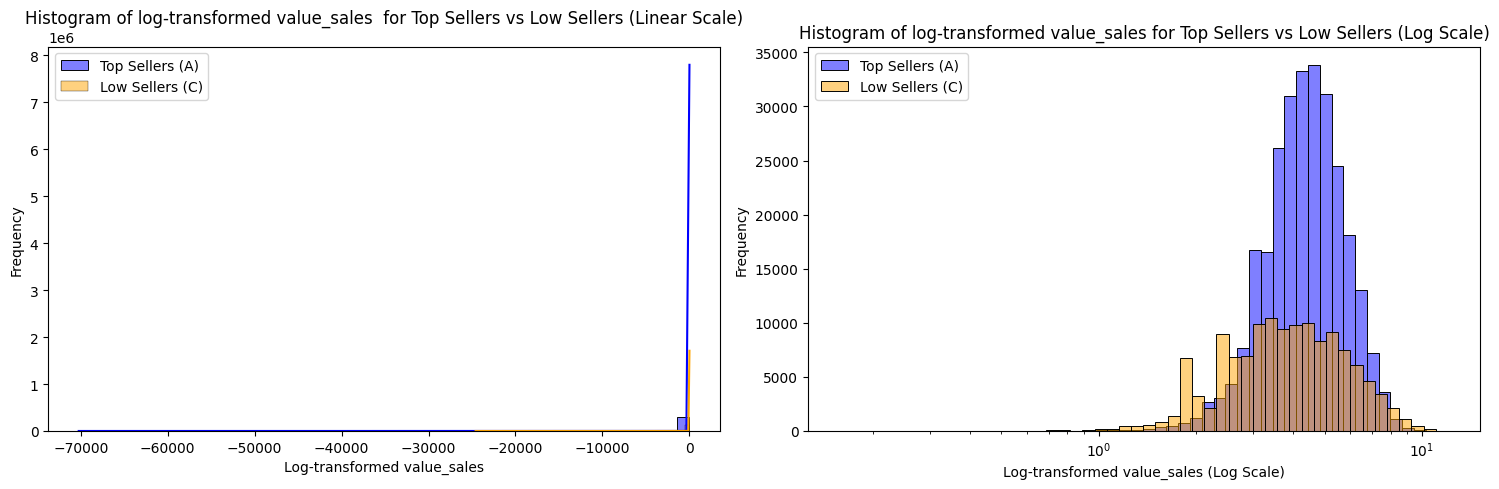

In [133]:
# Create 2 subplot layout
plt.figure(figsize=(15, 5))

# First histogram: Linear scale
plt.subplot(1, 2, 1)
sns.histplot(top_sellers_sales, bins=50, kde=True, color='blue', label='Top Sellers (A)', log_scale=False)
sns.histplot(low_sellers_sales, bins=50, kde=True, color='orange', label='Low Sellers (C)', log_scale=False)
plt.title("Histogram of log-transformed value_sales  for Top Sellers vs Low Sellers (Linear Scale)")
plt.xlabel("Log-transformed value_sales")
plt.ylabel("Frequency")
plt.legend()

# Second histogram: Log scale
plt.subplot(1, 2, 2)
sns.histplot(top_sellers_sales, bins=50, kde=True, color='blue', label='Top Sellers (A)', log_scale=True)
sns.histplot(low_sellers_sales, bins=50, kde=True, color='orange', label='Low Sellers (C)', log_scale=True)
plt.title("Histogram of log-transformed value_sales for Top Sellers vs Low Sellers (Log Scale)")
plt.xlabel("Log-transformed value_sales (Log Scale)")
plt.ylabel("Frequency")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

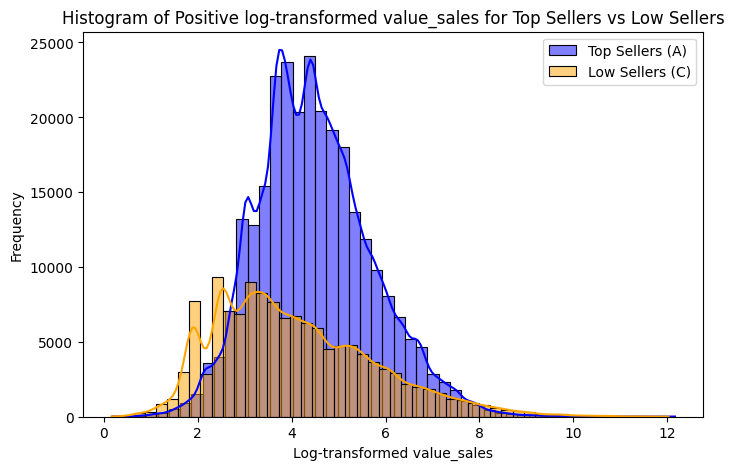

In [134]:
# Filter out negative values in value_sales for both top sellers and low sellers
top_sellers_sales_positive = top_sellers_sales[top_sellers_sales > 0]
low_sellers_sales_positive = low_sellers_sales[low_sellers_sales > 0]

# Plotting histogram with only positive values
plt.figure(figsize=(8, 5))
sns.histplot(top_sellers_sales_positive, bins=50, kde=True, color='blue', label='Top Sellers (A)', log_scale=False, alpha=0.5)
sns.histplot(low_sellers_sales_positive, bins=50, kde=True, color='orange', label='Low Sellers (C)', log_scale=False, alpha=0.5)
plt.title("Histogram of Positive log-transformed value_sales for Top Sellers vs Low Sellers")
plt.xlabel("Log-transformed value_sales")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**In summary**

The result of the p-value shows that it is significantly less than the standard significance level of 0.05; hence, we **reject the null hypothesis**. This indicates that there is a statistically significant difference in the mean log-transformed value of sales between Top Sellers (A) and Low Sellers (C).

Referring to the histogram visualization above, we observe clear differences in the distributions between the two groups: Top Sellers have higher log-transformed sales values than Low Sellers. This aligns with the t-test results, which indicate a statistically significant difference, reinforcing that Top Sellers and Low Sellers perform differently in terms of sales. This information is valuable for management as it highlights the distinct performance characteristics of these categories, potentially informing decisions on inventory, pricing strategies, and marketing focus.

## Q2. Is there a statistically significant difference in the average Transformed_Profit between products with LED lights and those with Traditional lights?

To determine if there is a significant difference in the average Transformed_Profit between LED and Traditional light sources, we will perform a two-sample t-test to compare the means of these two independent groups.

**Formulate Hypotheses:**

Null Hypothesis (H₀) -  The mean Transformed_Profit is the same for LED and Traditional light sources. (H₀:μLED =μTraditional)

Alternative Hypothesis (H₁) - The mean Transformed_Profit is different between LED and Traditional light sources. (H₁:μLED =/ μTraditional)

​**Analysis Approach** If the p-value from the t-test is less than the chosen significance level (usually 0.05), we will reject the null hypothesis, suggesting a significant difference in the average Transformed_Profit between LED and Traditional light sources. If the p-value is greater than 0.05, we will fail to reject the null hypothesis, indicating no significant difference in the means of these two groups.

In [135]:
# Filtering data for LED and Traditional light sources
light_source_data = sample_test[(sample_test['light_source_LED'] == 1) | (sample_test['light_source_Traditional'] == 1)]

# Separating data into two groups for the t-test
led_profit = light_source_data[light_source_data['light_source_LED'] == 1]['Transformed_Profit']
traditional_profit = light_source_data[light_source_data['light_source_Traditional'] == 1]['Transformed_Profit']

# Performing the two-sample t-test
t_stat, p_value = stats.ttest_ind(led_profit, traditional_profit, equal_var=False)  # Using Welch's t-test for unequal variance

# Displaying the test results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The mean Transformed_Profit is significantly different between LED and Traditional light sources.")
else:
    print("There is no significant difference in Transformed_Profit between LED and Traditional light sources.")

T-statistic: 90.08206518375088
P-value: 0.0
The mean Transformed_Profit is significantly different between LED and Traditional light sources.


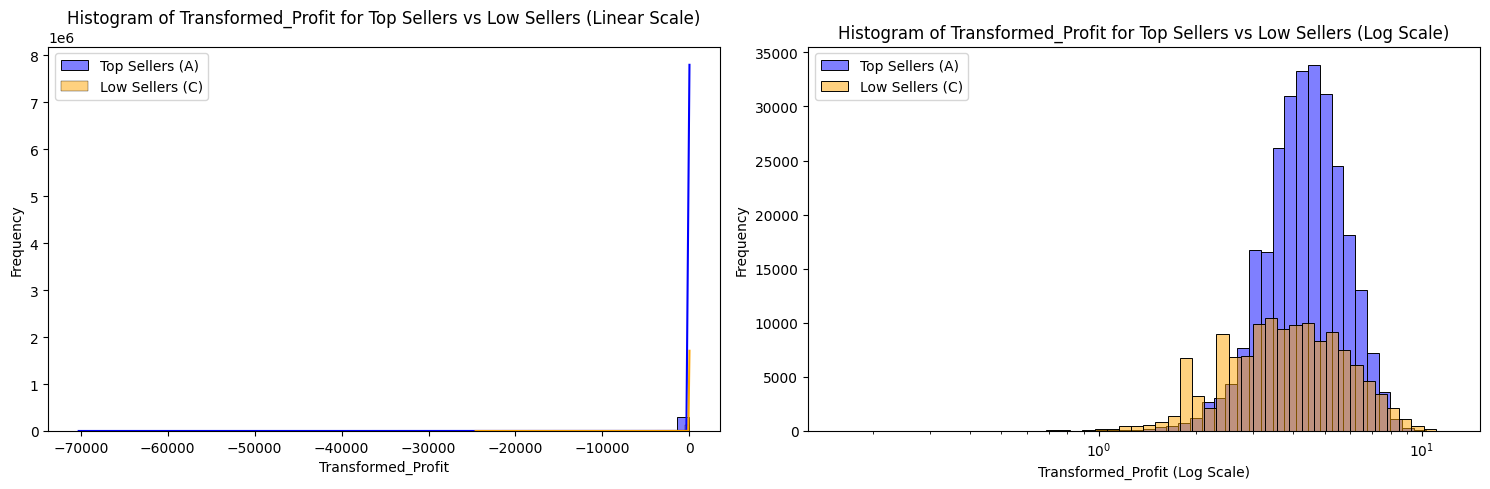

In [136]:
# Set up 2 subplot layout
plt.figure(figsize=(15, 5))

# First histogram: Transformed_Profit for Top Sellers vs Low Sellers (Linear Scale)
plt.subplot(1, 2, 1)
sns.histplot(top_sellers_sales, bins=50, kde=True, color='blue', label='Top Sellers (A)', log_scale=False)
sns.histplot(low_sellers_sales, bins=50, kde=True, color='orange', label='Low Sellers (C)', log_scale=False)
plt.title("Histogram of Transformed_Profit for Top Sellers vs Low Sellers (Linear Scale)")
plt.xlabel("Transformed_Profit")
plt.ylabel("Frequency")
plt.legend()

# Second histogram: Log-transformed Transformed_Profit for Top Sellers vs Low Sellers
plt.subplot(1, 2, 2)
sns.histplot(top_sellers_sales, bins=50, kde=True, color='blue', label='Top Sellers (A)', log_scale=True)
sns.histplot(low_sellers_sales, bins=50, kde=True, color='orange', label='Low Sellers (C)', log_scale=True)
plt.title("Histogram of Transformed_Profit for Top Sellers vs Low Sellers (Log Scale)")
plt.xlabel("Transformed_Profit (Log Scale)")
plt.ylabel("Frequency")
plt.legend()

# Show both subplots with a tight layout
plt.tight_layout()
plt.show()

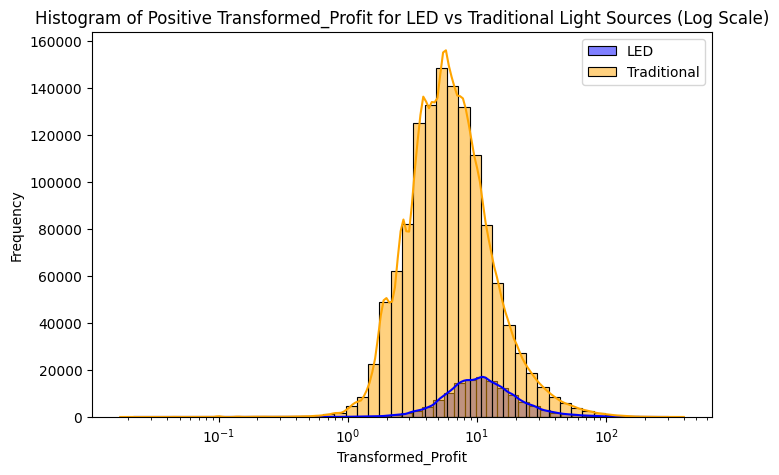

In [137]:
# Filtering out negative Transformed_Profit for both LED and Traditional
led_profit_positive = led_profit[led_profit > 0]
traditional_profit_positive = traditional_profit[traditional_profit > 0]

# Plotting histogram with only positive Transformed_Profit values
plt.figure(figsize=(8, 5))
sns.histplot(led_profit_positive, bins=50, kde=True, color='blue', label='LED', log_scale=True, alpha=0.5)
sns.histplot(traditional_profit_positive, bins=50, kde=True, color='orange', label='Traditional', log_scale=True, alpha=0.5)
plt.title("Histogram of Positive Transformed_Profit for LED vs Traditional Light Sources (Log Scale)")
plt.xlabel("Transformed_Profit")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**In summary**

The result of the t-test produced a T-statistic of approximately 90.08 and a P-value of 0. This extremely low P-value indicates a statistically significant difference in the means of Transformed_Profit between the LED and Traditional categories, so we **reject the null hypothesis**. This implies that the average profitability differs substantially between these two types of light sources, with the Traditional category likely showing higher profits.

Referring to the histogram visualised above, the traditional lights appear to be consistently more profitable, with fewer cases of negative profits. These insights can guide inventory decisions, pricing adjustments, and marketing focus. Additionally, management may want to investigate why LED products yield lower or even negative profits, possibly by improving production efficiency or adjusting pricing strategies

# Section 4: Inference

In [138]:
# import lib
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

In [139]:
data = data_5_percent_encoded

In [140]:
data.head()

,accounting_date,company_code,customer_code,customer_district_code,item_code,business_chain_l1_name,salesperson_code,market_segment,value_sales,value_cost,...,contact_method_code_NA,contact_method_code_Other,order_type_code_EDI,order_type_code_NOR,order_type_code_Other,Profit,Unit_Price,Profit_Margin,Transformed_Profit,Transformed_Unit_Price
0,2012-05-09,101,411800601,410,GENIE8WWWBC,ElectraCorp Ltd,T612,Commercial & Industrial,218.40,178.1976,...,True,False,False,True,False,40.2024,2.60,18.407692,6.340536,1.280934
1,2012-02-16,101,361000403,300,GENIE8WWWBC,BrightPower Solutions,P345,Commercial & Industrial,38.28,25.4568,...,True,False,False,True,False,12.8232,3.19,33.498433,3.580950,1.432701
2,2012-05-09,101,361000403,300,GENIE8WWWBC,BrightPower Solutions,P345,Commercial & Industrial,40.20,25.4568,...,True,False,False,True,False,14.7432,3.35,36.674627,3.839687,1.470176
3,2012-05-18,101,565540415,500,GENIE8WWWBC,Global Electric Wholesalers,T504,Commercial & Industrial,20.10,12.7284,...,True,False,True,False,False,7.3716,3.35,36.674627,2.715069,1.470176
4,2012-01-09,101,565540415,500,GENIE8WWWBC,Global Electric Wholesalers,T504,Commercial & Industrial,19.14,12.7284,...,True,False,True,False,False,6.4116,3.19,33.498433,2.532114,1.432701


In [141]:
data.shape

(1971500, 101)

- Display the column name

In [142]:
data.columns

Index(['accounting_date', 'company_code', 'customer_code',
       'customer_district_code', 'item_code', 'business_chain_l1_name',
       'salesperson_code', 'market_segment', 'value_sales', 'value_cost',
       ...
       'contact_method_code_NA', 'contact_method_code_Other',
       'order_type_code_EDI', 'order_type_code_NOR', 'order_type_code_Other',
       'Profit', 'Unit_Price', 'Profit_Margin', 'Transformed_Profit',
       'Transformed_Unit_Price'],
      dtype='object', length=101)

- Check type of data

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1971500 entries, 0 to 1988381
Columns: 101 entries, accounting_date to Transformed_Unit_Price
dtypes: bool(72), category(7), datetime64[ns](3), float64(11), int64(6), object(2)
memory usage: 532.1+ MB


#### 1. Question 1: What factors drive sales revenue across different customer segments?

Objective
- The goal of this question is to understand the key drivers of sales revenue across different customer segments. By analyzing the impact of factors such as product quantity, cost, discounts, and regional segmentation, LuminaTech can identify which factors most significantly contribute to increased revenue. This insight can inform marketing strategies, inventory planning, and pricing adjustments, enabling the company to optimize revenue across diverse customer groups.

- Define X with Log-Transformed Columns

In [144]:
# Define the independent variables (features) with log-transformed columns
X = data[['value_quantity_log_plus1_transformed', 'value_cost_log_plus1_transformed', 
                  'value_price_adjustment', 'day_gap', 
                  'business_area_code_DLT', 'business_area_code_LMP', 
                  'business_area_code_OTH', 'business_area_code_Other', 
                  'business_area_code_SUR']]


y = data['value_sales_log_plus1_transformed']

- Split Data into Training and Testing Sets

In [145]:
# Perform an 80-20 split for training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Build and Fit the Multiple Regression Model

In [146]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

- Evaluate the Model’s Performance

In [147]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared and RMSE (Root Mean Squared Error) for performance evaluation
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

R-squared: 0.2805906505343273
RMSE: 415.45364863705424


R-squared & RMSE
- R-squared (0.281): This indicates that approximately 28.1% of the variance in value_sales_log_plus1_transformed (log-transformed sales revenue) is explained by the selected features. While this isn't very high, it suggests that other factors not included in the model might also influence sales revenue.

In practical terms, the model explains a limited portion of the revenue drivers, implying the need for additional variables or more complex models if higher predictive power is desired.
- RMSE (415.45): The Root Mean Squared Error (RMSE) provides a measure of the model’s average prediction error. A lower RMSE would indicate better model fit. Here, an RMSE of 415.45 suggests that there is a moderate level of error in the model’s predictions of sales revenue.

- Interpret the Coefficients

In [148]:
# Print the coefficients along with their respective feature names
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coefficients)

                                Feature  Coefficient
0  value_quantity_log_plus1_transformed    -0.596836
1      value_cost_log_plus1_transformed     1.603947
2                value_price_adjustment  -180.585334
3                               day_gap     0.034158
4                business_area_code_DLT    -1.611231
5                business_area_code_LMP     4.287038
6                business_area_code_OTH     0.047396
7              business_area_code_Other   -10.600578
8                business_area_code_SUR     2.468903


- Interpret the Coefficients
Each coefficient represents the effect of a unit change in the feature on the log-transformed sales revenue, holding other features constant.

1. value_quantity_log_plus1_transformed (-0.5968): The negative coefficient here suggests that, after accounting for other variables, an increase in the quantity (log-transformed) is associated with a slight decrease in revenue. This could indicate that high sales quantities do not necessarily lead to higher revenue, possibly due to discounts on bulk purchases.
2. value_cost_log_plus1_transformed (1.6040): This positive coefficient indicates that as the cost (log-transformed) increases, revenue increases as well. This is expected, as higher-cost items are often sold at higher prices.
3. value_price_adjustment (-180.59): This significant negative coefficient implies that higher price adjustments (discounts) reduce sales revenue. Discounts appear to have a negative impact on revenue, which might suggest that they reduce profit without sufficiently boosting sales volume.
4. day_gap (0.0342): The small positive coefficient suggests that a longer gap between order and invoice is slightly associated with higher revenue. This could indicate that higher-value items or large orders take longer to process.
- Regional Codes:
1. business_area_code_LMP (4.2870) and business_area_code_SUR (2.4689): These positive coefficients suggest that sales revenue is higher in these regions, indicating potentially profitable markets.
2. business_area_code_DLT (-1.6112) and business_area_code_Other (-10.6006): These negative coefficients indicate that revenue might be lower in these regions, suggesting that these areas are less profitable for LuminaTech.

- Convert Boolean Columns to Numeric: convert them to integers (0 and 1), which are compatible with VIF calculations.

In [149]:
X = X.astype(float)

- Check for Multicollinearity Using Variance Inflation Factor (VIF)

In [150]:
# Ensure all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Calculate VIF for each feature without an explicit loop
vif_data = pd.DataFrame({
    "Feature": X.columns,
    "VIF": X.apply(lambda i: variance_inflation_factor(X.values, X.columns.get_loc(i.name)))
})

print(vif_data)

                                                                   Feature  \
value_quantity_log_plus1_transformed  value_quantity_log_plus1_transformed   
value_cost_log_plus1_transformed          value_cost_log_plus1_transformed   
value_price_adjustment                              value_price_adjustment   
day_gap                                                            day_gap   
business_area_code_DLT                              business_area_code_DLT   
business_area_code_LMP                              business_area_code_LMP   
business_area_code_OTH                              business_area_code_OTH   
business_area_code_Other                          business_area_code_Other   
business_area_code_SUR                              business_area_code_SUR   

                                           VIF  
value_quantity_log_plus1_transformed  1.062628  
value_cost_log_plus1_transformed      1.056339  
value_price_adjustment                1.025621  
day_gap                

- VIF (Variance Inflation Factor)
The VIF values are used to assess multicollinearity among features. A VIF value greater than 5 typically indicates a high level of multicollinearity.

- VIFs for all features are close to 1, with none exceeding 2. This suggests that multicollinearity is not a concern in this model, meaning the independent variables are not strongly correlated with each other. This is desirable as it indicates that each feature contributes uniquely to the model’s predictive power.

- Perform Cross-Validation

In [151]:
# Perform cross-validation with 5 folds and evaluate the R-squared
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared Score:", cv_scores.mean())

Cross-Validation R-squared Scores: [0.84264484 0.86136497 0.64104513 0.36437966 0.09098071]
Mean R-squared Score: 0.5600830607777013


- Cross-Validation
1. Cross-Validation R-squared Scores: The cross-validation scores are relatively high in some folds (0.84 and 0.86), while they drop considerably in others (0.36 and 0.01). This variability suggests that the model’s performance is inconsistent across different subsets of the data, which could indicate that the model may not generalize well to new data.
2. Mean R-squared Score (0.5601): The average cross-validation R-squared score is higher than the R-squared from the initial model, indicating that, on average, the model explains around 56% of the variance in revenue across different subsets. However, due to the variability in cross-validation scores, there might still be room to improve the model’s stability.

Summary and Recommendations
- Insights:
The negative impact of value_price_adjustment on revenue suggests that discounts might be eroding revenue without driving sufficient additional volume. LuminaTech may want to review its discount strategy.
The positive coefficients for business_area_code_LMP and business_area_code_SUR indicate that these regions are strong revenue drivers, suggesting potential areas to focus marketing efforts.
value_quantity_log_plus1_transformed has a negative relationship with revenue, which could imply that high-quantity sales are not necessarily profitable, possibly due to bulk discounts or lower-priced items.

Recommendations:
- Reassess the Discount Strategy: Since value_price_adjustment negatively impacts revenue, LuminaTech should consider targeted discount strategies, potentially reducing discounts in low-margin products or regions.
- Focus on High-Performing Regions: The positive impact of regions like LMP and SUR on revenue suggests that LuminaTech could focus resources or marketing efforts in these areas to maximize revenue.
- Explore Additional Variables: Given the relatively low R-squared, additional factors influencing sales revenue should be considered for analysis, such as customer demographics, seasonal trends, or more granular product features.

#### 2. Question 2: What Factors Influence Profit Margin Across Product Categories and Customer Segments?


Objective
- This question aims to identify factors that impact profit margin across different product types and customer segments. Understanding the factors that lead to higher profit margins enables LuminaTech to focus on high-margin products, optimize discount strategies, and target profitable customer segments. Insights from this analysis can aid in pricing, product prioritization, and regional strategies to maximize profitability.

- Define X with Log-Transformed Columns

In [152]:
# Define X without a loop, using transformed versions of value_cost and value_quantity
X = data[['value_cost_log_plus1_transformed', 'value_quantity_log_plus1_transformed', 'value_price_adjustment', 
                  'light_source_LED', 'light_source_Traditional', 
                  'business_area_code_DLT', 'business_area_code_LMP', 
                  'business_area_code_OTH', 'business_area_code_Other', 
                  'business_area_code_SUR']]

y = data['Profit_Margin']  # Replace with the calculated column if needed

- Split Data into Training and Testing Sets

In [153]:
# Perform an 80-20 split for training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Build and Fit the Multiple Regression Model

In [154]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

- Evaluate the Model’s Performance

In [155]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

R-squared: 0.21060057117085507
RMSE: 17.415020842023186


R-squared & RMSE
- R-squared (0.2106): This indicates that approximately 21.06% of the variance in Profit_Margin is explained by the selected features. This is a relatively low R-squared value, which implies that other factors, not included in the model, may also play a significant role in determining profit margins.
- RMSE (17.42): The Root Mean Squared Error suggests that there is an average error of 17.42 in predicting the profit margin, which might be substantial depending on the scale of profit margin values. This level of error suggests that the model's predictions may not be highly accurate.

- Interpret the Coefficients

In [156]:
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coefficients)

                                Feature  Coefficient
0      value_cost_log_plus1_transformed     0.000606
1  value_quantity_log_plus1_transformed    -0.001771
2                value_price_adjustment    50.280524
3                      light_source_LED    -8.881002
4              light_source_Traditional    -3.731200
5                business_area_code_DLT     5.323921
6                business_area_code_LMP    11.004612
7                business_area_code_OTH    -0.302864
8              business_area_code_Other     2.014051
9                business_area_code_SUR     3.742928


Interpret the Coefficients

1. value_cost_log_plus1_transformed (0.0006): This small positive coefficient suggests a minimal positive impact on profit margin with increased cost. However, the effect size is extremely small, indicating it’s not a strong driver.
2. value_quantity_log_plus1_transformed (-0.0018): This negative coefficient suggests that higher sales quantities are associated with a slight decrease in profit margin, possibly due to discounts on bulk purchases that reduce profitability.
3. value_price_adjustment (50.28): This positive and substantial coefficient indicates that price adjustments (discounts) are actually increasing the profit margin. This could imply that discounts are effectively encouraging profitable sales or that they’re applied to high-margin products.
4. light_source_LED (-8.88) and light_source_Traditional (-3.73): Both product types have negative coefficients, suggesting they may slightly reduce profit margin. However, LED products have a stronger negative impact, which might indicate higher costs or competitive pricing challenges in the LED segment.
- Regional Codes:
1. business_area_code_LMP (11.00) and business_area_code_SUR (3.74): These positive coefficients indicate that these regions are associated with higher profit margins, identifying them as more profitable customer segments.
2. business_area_code_DLT (5.32) and business_area_code_Other (2.01): Both regions also show positive impacts on profit margin, although smaller than LMP and SUR. These regions may still be worth focusing on, though they are less impactful.

- Convert Boolean Columns to Numeric: convert them to integers (0 and 1), which are compatible with VIF calculations.

In [157]:
X = X.astype(float)

- Check for Multicollinearity Using Variance Inflation Factor (VIF)

In [158]:
# Ensure all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Calculate VIF for each feature without an explicit loop
vif_data = pd.DataFrame({
    "Feature": X.columns,
    "VIF": X.apply(lambda i: variance_inflation_factor(X.values, X.columns.get_loc(i.name)))
})

print(vif_data)

                                                                   Feature  \
value_cost_log_plus1_transformed          value_cost_log_plus1_transformed   
value_quantity_log_plus1_transformed  value_quantity_log_plus1_transformed   
value_price_adjustment                              value_price_adjustment   
light_source_LED                                          light_source_LED   
light_source_Traditional                          light_source_Traditional   
business_area_code_DLT                              business_area_code_DLT   
business_area_code_LMP                              business_area_code_LMP   
business_area_code_OTH                              business_area_code_OTH   
business_area_code_Other                          business_area_code_Other   
business_area_code_SUR                              business_area_code_SUR   

                                           VIF  
value_cost_log_plus1_transformed      1.056442  
value_quantity_log_plus1_transformed  1.062

VIF (Variance Inflation Factor)

- VIF for light_source_Traditional (5.03) and business_area_code_LMP (3.80)**: Although these values are higher than others, they are still below critical thresholds, suggesting multicollinearity is not severe in this model.
All other VIFs are close to 1, meaning that multicollinearity is not a significant issue for most variables. Each variable appears to contribute uniquely to the model.

- Perform Cross-Validation

In [159]:
# Perform cross-validation with 5 folds and evaluate the R-squared
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared Score:", cv_scores.mean())

Cross-Validation R-squared Scores: [0.25716496 0.16010633 0.22576452 0.20225858 0.18277347]
Mean R-squared Score: 0.20561356775195838


Cross-Validation
1. Cross-Validation R-squared Scores: The cross-validation scores vary, but they are all relatively low, ranging between 0.16 and 0.26, indicating that the model’s performance is somewhat inconsistent across different folds.
2. Mean R-squared Score (0.2056): The average cross-validation R-squared score aligns closely with the initial R-squared, confirming that the model explains only a small portion of the variability in profit margin. This suggests that the selected features have a limited effect on profit margin, and additional variables may be needed for better predictive power.

Summary and Recommendations

1. Insights:
Discounting appears to increase profit margin, as suggested by the positive coefficient for value_price_adjustment. This could indicate that discounts are well-targeted or that they are applied in ways that still maintain profitability.
Certain regions (LMP and SUR) have a strong positive influence on profit margin, suggesting that LuminaTech could focus resources on these areas.
Higher quantities sold slightly reduce profit margins, potentially due to bulk discounts or reduced prices for large orders.
LED products negatively impact profit margins more than traditional products, which might warrant a review of pricing or cost management strategies for the LED product line.
2. Recommendations:
- Targeted Discounts: Since discounts seem to support profit margin, LuminaTech could further optimize discount strategies to balance revenue and profit.
- Regional Focus: Focus efforts on the most profitable regions, like LMP and SUR, where margins are higher.
Reevaluate LED Product Pricing: Since LED products are associated with lower profit margins, LuminaTech could explore cost-reduction strategies, potentially by negotiating with suppliers or adjusting pricing.

# Section 5: Prediction Model

In [160]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
data = data_5_percent_encoded.copy()
data.head()

,accounting_date,company_code,customer_code,customer_district_code,item_code,business_chain_l1_name,salesperson_code,market_segment,value_sales,value_cost,...,contact_method_code_NA,contact_method_code_Other,order_type_code_EDI,order_type_code_NOR,order_type_code_Other,Profit,Unit_Price,Profit_Margin,Transformed_Profit,Transformed_Unit_Price
0,2012-05-09,101,411800601,410,GENIE8WWWBC,ElectraCorp Ltd,T612,Commercial & Industrial,218.40,178.1976,...,True,False,False,True,False,40.2024,2.60,18.407692,6.340536,1.280934
1,2012-02-16,101,361000403,300,GENIE8WWWBC,BrightPower Solutions,P345,Commercial & Industrial,38.28,25.4568,...,True,False,False,True,False,12.8232,3.19,33.498433,3.580950,1.432701
2,2012-05-09,101,361000403,300,GENIE8WWWBC,BrightPower Solutions,P345,Commercial & Industrial,40.20,25.4568,...,True,False,False,True,False,14.7432,3.35,36.674627,3.839687,1.470176
3,2012-05-18,101,565540415,500,GENIE8WWWBC,Global Electric Wholesalers,T504,Commercial & Industrial,20.10,12.7284,...,True,False,True,False,False,7.3716,3.35,36.674627,2.715069,1.470176
4,2012-01-09,101,565540415,500,GENIE8WWWBC,Global Electric Wholesalers,T504,Commercial & Industrial,19.14,12.7284,...,True,False,True,False,False,6.4116,3.19,33.498433,2.532114,1.432701


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1971500 entries, 0 to 1988381
Columns: 101 entries, accounting_date to Transformed_Unit_Price
dtypes: bool(72), category(7), datetime64[ns](3), float64(11), int64(6), object(2)
memory usage: 532.1+ MB


<Axes: xlabel='value_sales', ylabel='Count'>

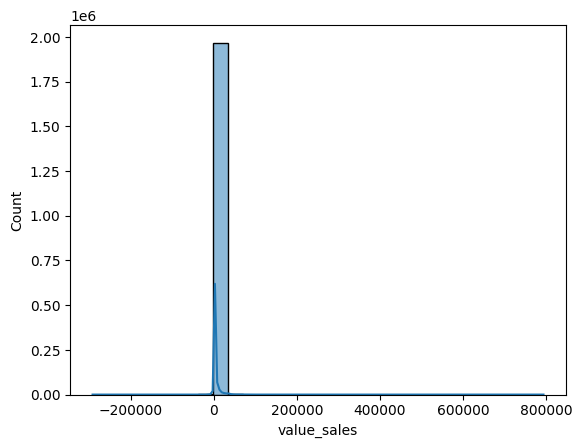

In [163]:
sns.histplot(data=data, x='value_sales', bins=30, kde=True)

In [164]:
#create daily sale
filtered_data = data[['order_date', 'value_sales']]
#change order_date to datetime
filtered_data['order_date'] = pd.to_datetime(filtered_data['order_date'])
#posive value sales
filtered_data = filtered_data[filtered_data['value_sales'] >= 0]
#create daily sale
daily_sale = filtered_data.groupby('order_date')['value_sales'].sum().reset_index()
#filter date between 2012 and 2013
daily_sale = daily_sale[(daily_sale['order_date'] >= '2012-01-01') & (daily_sale['order_date'] <= '2013-12-31')]
#interpolate missing date
daily_sale = daily_sale.set_index('order_date').resample('D').sum().reset_index()
#fill missing value
daily_sale['value_sales'] = daily_sale['value_sales'].fillna(0)
daily_sale

,order_date,value_sales
0,2012-01-01,325.2000
1,2012-01-02,44819.3620
2,2012-01-03,659479.3300
3,2012-01-04,608059.4060
4,2012-01-05,342315.6920
...,...,...
725,2013-12-26,278.6000
726,2013-12-27,8976.7500
727,2013-12-28,0.0000
728,2013-12-29,0.0000


we calculated daily sales and fill the missing date with 0

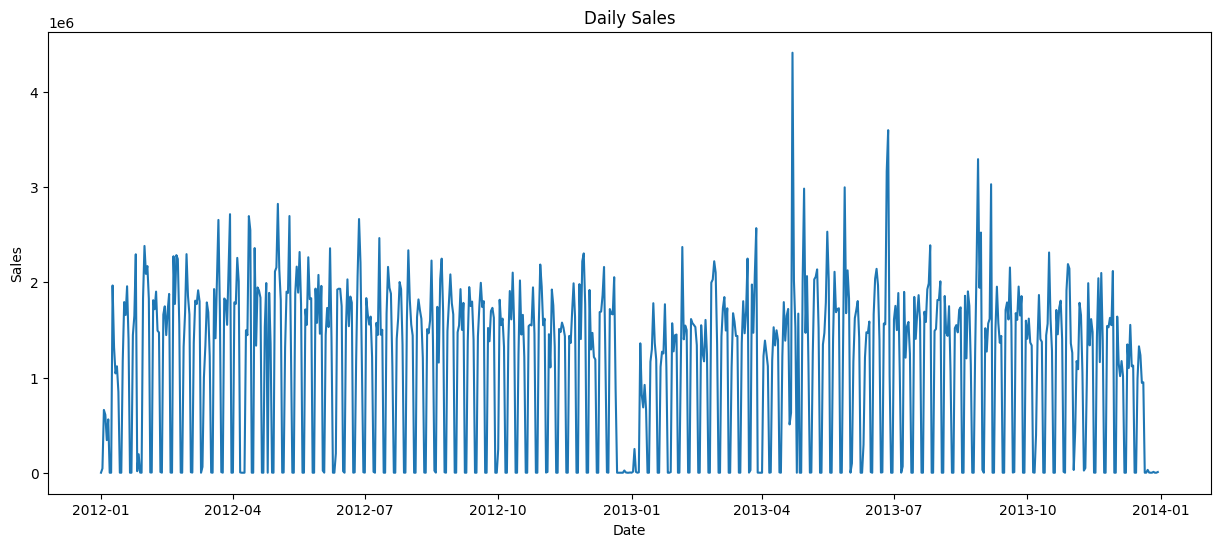

In [165]:
#plot daily sale
plt.figure(figsize=(15, 6))
plt.plot(daily_sale['order_date'], daily_sale['value_sales'])
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


from the sales data i assume that it has 0 sales on weekend and holiday because it is a B2B sales

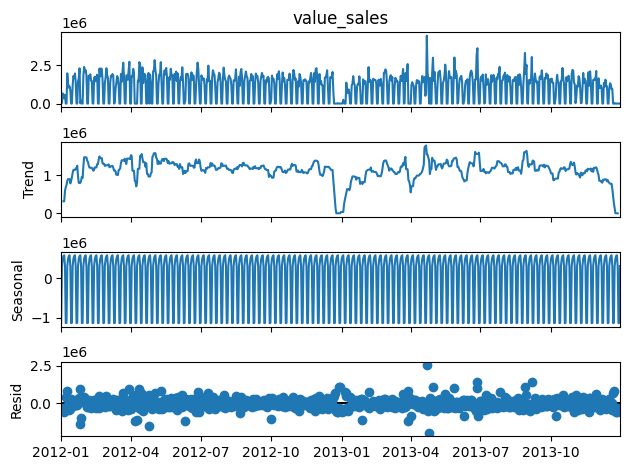

In [166]:
#decompose time series
from statsmodels.tsa.seasonal import seasonal_decompose
daily_sale = daily_sale.set_index('order_date')
result = seasonal_decompose(daily_sale['value_sales'], model='additive')
result.plot()
plt.show()

This chart is a time series decomposition plot for the variable `value_sales`, using an additive decomposition approach. The chart is split into four components, each representing a different aspect of the `value_sales` time series:

1. **Observed**: The top plot shows the actual `value_sales` over time, capturing all components (trend, seasonality, and residuals) together. This gives an overall view of the fluctuations and patterns in sales from 2012 to late 2013.

2. **Trend**: The second plot reveals the underlying trend in `value_sales` by smoothing out the short-term fluctuations. It shows a slight upward trend in 2012, followed by a more irregular pattern with some dips in early 2013. Toward the end, there seems to be a downward movement, potentially reflecting a decline in sales.

3. **Seasonal**: The third plot highlights the seasonal patterns in `value_sales`, capturing any repeating cycles. This regular pattern suggests there are consistent periodic fluctuations within each year, which might be tied to monthly or quarterly variations in demand, possibly related to seasonality in lighting bulb sales.

4. **Residual**: The bottom plot displays the residuals, which are the remaining values after removing the trend and seasonality. Ideally, these should appear random if the decomposition has successfully captured the trend and seasonality. However, we see some outliers and variability, particularly around early 2013, indicating periods where the model’s expected values diverged from the actual sales data.

This decomposition helps identify whether the variations in `value_sales` are due to consistent seasonal patterns, a general trend, or irregular/random fluctuations. It can be useful for understanding patterns in sales, especially if the goal is to make forecasts or explore factors influencing sales trends.

C:\Users\exp55\anaconda3\envs\BUSA8000\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\exp55\anaconda3\envs\BUSA8000\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


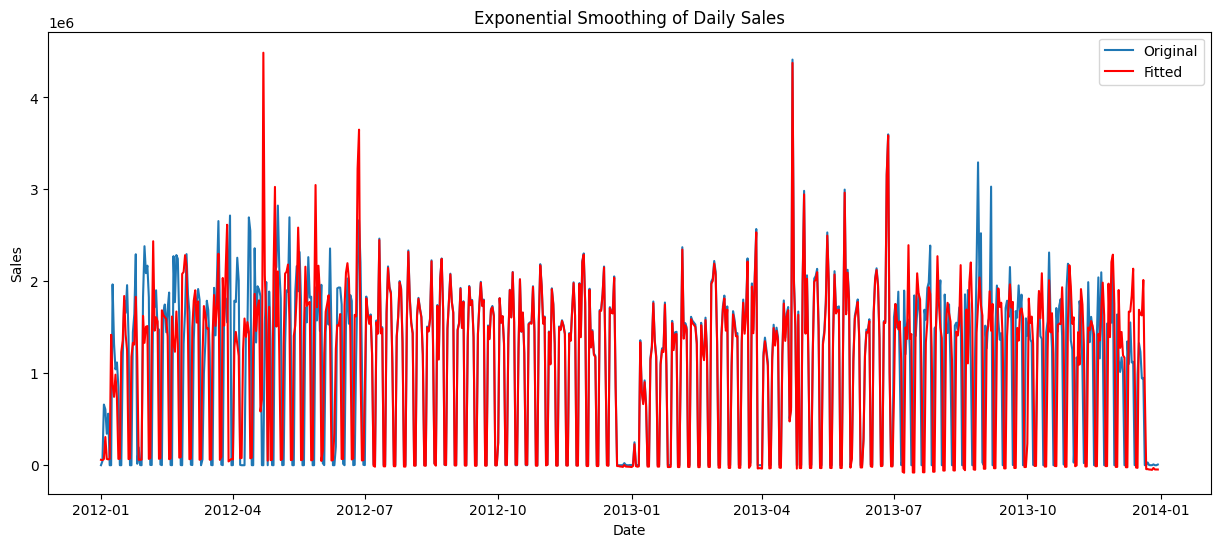

In [167]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply exponential smoothing
model = ExponentialSmoothing(daily_sale['value_sales']+1, trend='mul', seasonal='add', seasonal_periods=365) # Add 1 to avoid taking log of 0
fit = model.fit()

# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(daily_sale.index, daily_sale['value_sales'], label='Original')
plt.plot(daily_sale.index, fit.fittedvalues, label='Fitted', color='red')
plt.title('Exponential Smoothing of Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
# save the plot
plt.savefig('../reports/figures/exponential_smoothing.png')
plt.show()

Holt-Winters exponential smoothing, also known as Triple Exponential Smoothing, is a forecasting method used for time series data that accounts for trend and seasonality. This technique is ideal for data with both a trend and seasonal variation, making it commonly used in inventory management, sales forecasting, and other areas with cyclical patterns.

There are three main components to Holt-Winters:

1. **Level** \((L_t)\): The baseline value of the series at a given time.
2. **Trend** \((T_t)\): The change in the series over time.
3. **Seasonality** \((S_t)\): The repetitive seasonal pattern within the data.

The model has two types:

- **Additive**: When the seasonal variations are roughly constant over time.
- **Multiplicative**: When the seasonal variations grow proportionally to the trend.

### Holt-Winters Equations

For the additive model, the equations are:

1. **Level**: \(L_t = \alpha (y_t - S_{t-m}) + (1 - \alpha)(L_{t-1} + T_{t-1})\)
2. **Trend**: \(T_t = \beta (L_t - L_{t-1}) + (1 - \beta)T_{t-1}\)
3. **Seasonality**: \(S_t = \gamma (y_t - L_t) + (1 - \gamma)S_{t-m}\)
4. **Forecast** for \(k\) periods ahead: \(\hat{y}_{t+k} = L_t + kT_t + S_{t+k-m}\)

where:
- \(y_t\): Actual value at time \(t\)
- \(\alpha\), \(\beta\), \(\gamma\): Smoothing parameters (0 < \(\alpha\), \(\beta\), \(\gamma\) < 1)
- \(m\): Number of periods in a season (e.g., 12 for monthly data with yearly seasonality)


In [168]:
# evaluate model
from sklearn.metrics import mean_squared_error
from math import sqrt

# Make predictions
predictions = fit.fittedvalues
#replace negative value with 0
predictions[predictions < 0] = 0

# Calculate RMSE
rmse = sqrt(mean_squared_error(daily_sale['value_sales'], predictions))
print(f"root mean squared error = {rmse:,.2f}")
# Calculate MAE
mae = np.mean(np.abs(daily_sale['value_sales'] - predictions))
print(f"mean absolute error = {mae:,.2f}")
# Calculate MSE
mse = mean_squared_error(daily_sale['value_sales'], predictions)
print(f"mean squared error = {mse:,.2f}")
#R2 score
from sklearn.metrics import r2_score
r2 = r2_score(daily_sale['value_sales'], predictions)
print(f"R2 score = {r2:.2%}")


root mean squared error = 644,673.90
mean absolute error = 331,203.67
mean squared error = 415,604,435,887.42
R2 score = 42.37%


In [169]:
# Forecast the future
forecast = fit.forecast(steps=365)
forecast = pd.DataFrame(forecast, columns=['value_sales'])
forecast['order_date'] = pd.date_range(start='2014-01-01', periods=365)
forecast = forecast.set_index('order_date')
# replace negative value with 0
forecast['value_sales'] = forecast['value_sales'].apply(lambda x: 0 if x < 0 else x)
forecast

,value_sales
order_date,
2014-01-01,0.000000
2014-01-02,0.000000
2014-01-03,0.000000
2014-01-04,197871.158088
2014-01-05,0.000000
...,...
2014-12-27,0.000000
2014-12-28,0.000000
2014-12-29,0.000000


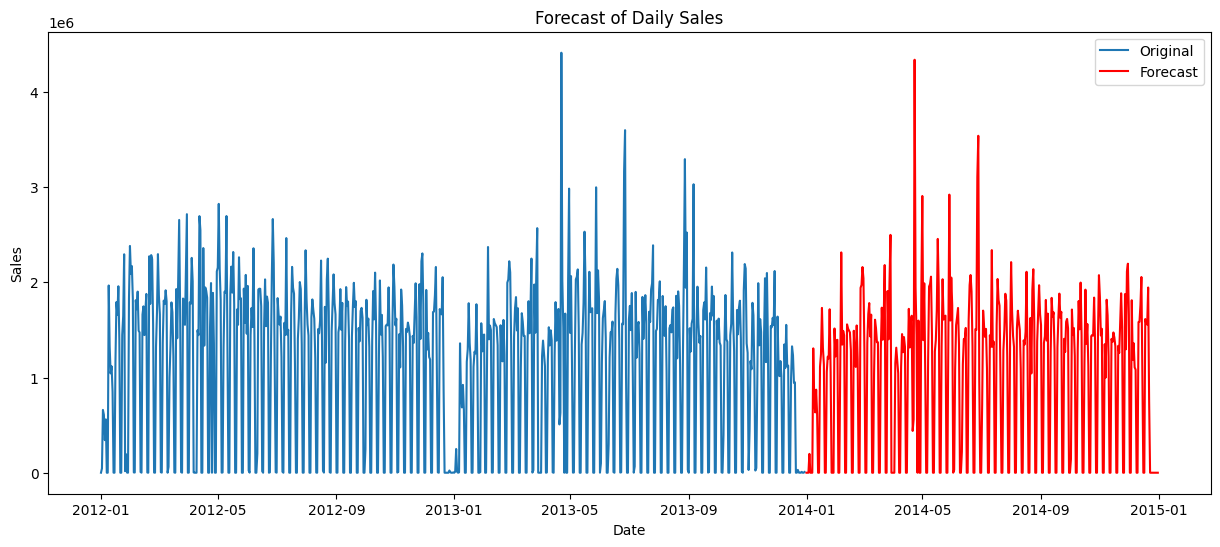

In [170]:
# Plot the forecast
plt.figure(figsize=(15, 6))
plt.plot(daily_sale.index, daily_sale['value_sales'], label='Original')
plt.plot(forecast.index, forecast['value_sales'], label='Forecast', color='red')
plt.title('Forecast of Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
#save plot
plt.savefig('../reports/figures/forecast.png')
plt.show()


In [171]:
#print sum 2012 daily sale
print(f"sum 2012 daily sale = {daily_sale[daily_sale.index.year == 2012]['value_sales'].sum():,.2f} AUD")
#print sum 2013 daily sale
print(f"sum 2013 daily sale = {daily_sale[daily_sale.index.year == 2013]['value_sales'].sum():,.2f} AUD")
#print sum forecast
print(f"sum forecast = {forecast['value_sales'].sum():,.2f} AUD")

sum 2012 daily sale = 423,990,503.37 AUD
sum 2013 daily sale = 397,950,946.62 AUD
sum forecast = 382,886,737.63 AUD


## Monthly forecast

In [172]:
# create monthly sale
monthly_sale = daily_sale.resample('M').sum()
monthly_sale = monthly_sale.reset_index()
monthly_sale

,order_date,value_sales
0,2012-01-31,2.630926e+07
1,2012-02-29,3.836766e+07
2,2012-03-31,3.908568e+07
3,2012-04-30,3.429333e+07
4,2012-05-31,4.433829e+07
5,2012-06-30,3.618815e+07
6,2012-07-31,3.737509e+07
7,2012-08-31,3.868501e+07
8,2012-09-30,3.319137e+07
9,2012-10-31,3.646247e+07


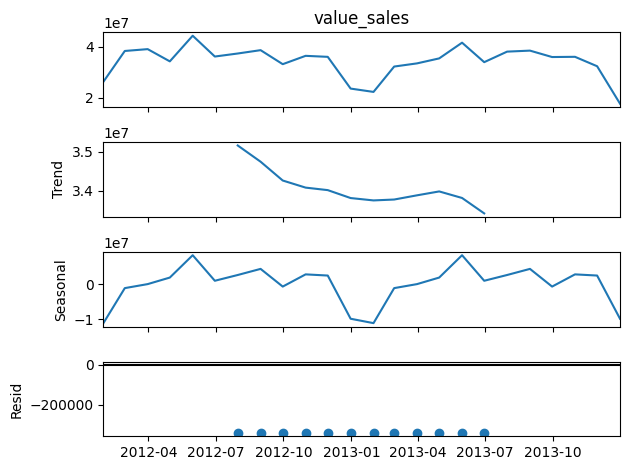

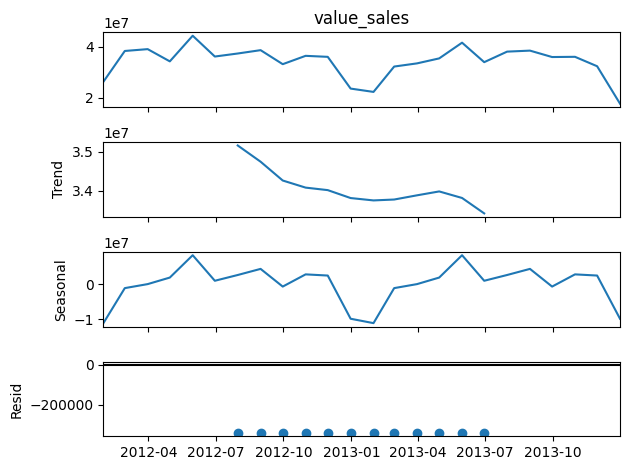

In [173]:
seasonal_decompose(monthly_sale.set_index('order_date')['value_sales'], model='additive').plot()

In [174]:
# Apply exponential smoothing
model = ExponentialSmoothing(monthly_sale['value_sales']+1, trend='add', seasonal='add', seasonal_periods=12) # Add 1 to avoid taking log of 0
fit = model.fit()


C:\Users\exp55\anaconda3\envs\BUSA8000\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


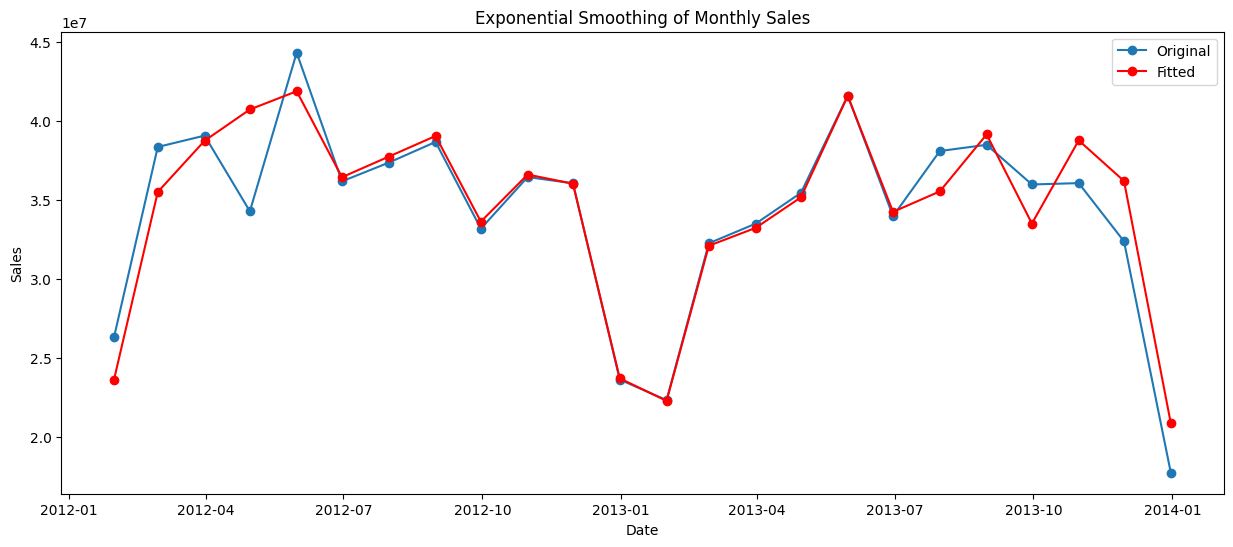

In [175]:
# Plot the results
plt.figure(figsize=(15, 6))
plt.plot(monthly_sale['order_date'], monthly_sale['value_sales'], label='Original', marker='o')
plt.plot(monthly_sale['order_date'], fit.fittedvalues, label='Fitted', color='red', marker='o')
plt.title('Exponential Smoothing of Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()


In [176]:
# forecast the future
forecast = fit.forecast(steps=12)
forecast = pd.DataFrame(forecast, columns=['value_sales'])
forecast['order_date'] = pd.date_range(start='2014-01-01', periods=12, freq='M')
forecast = forecast.set_index('order_date')
forecast


,value_sales
order_date,
2014-01-31,1.704184e+07
2014-02-28,2.683233e+07
2014-03-31,2.784226e+07
2014-04-30,2.956879e+07
2014-05-31,3.577222e+07
2014-06-30,2.841327e+07
2014-07-31,2.992276e+07
2014-08-31,3.152833e+07
2014-09-30,2.639742e+07


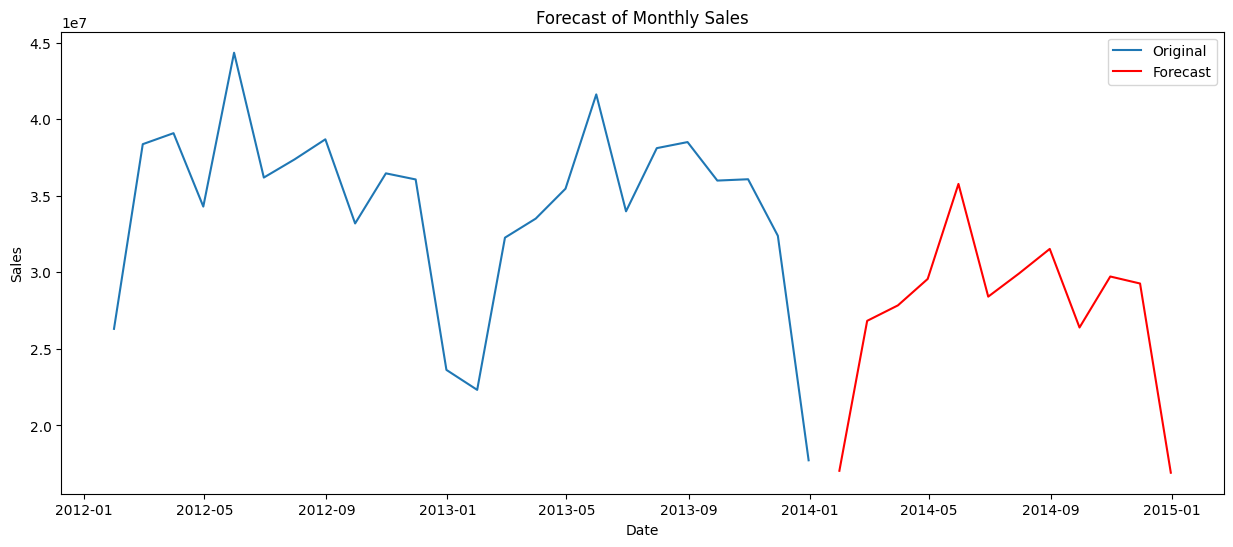

In [177]:
# Plot the forecast
plt.figure(figsize=(15, 6))
plt.plot(monthly_sale['order_date'], monthly_sale['value_sales'], label='Original')
plt.plot(forecast.index, forecast['value_sales'], label='Forecast', color='red')
plt.title('Forecast of Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()


In [178]:
# Calculate evaluation metrics
# Make predictions
predictions = fit.fittedvalues
# Calculate RMSE
rmse = sqrt(mean_squared_error(monthly_sale['value_sales'], predictions))
print(f"root mean squared error = {rmse:,.2f}")
# Calculate MAE
mae = np.mean(np.abs(monthly_sale['value_sales'] - predictions))
print(f"mean absolute error = {mae:,.2f}")
# Calculate MSE
mse = mean_squared_error(monthly_sale['value_sales'], predictions)
print(f"mean squared error = {mse:,.2f}")
#R2 score
r2 = r2_score(monthly_sale['value_sales'], predictions)
print(f"R2 score = {r2:.2%}")


root mean squared error = 2,128,217.54
mean absolute error = 1,369,563.26
mean squared error = 4,529,309,906,725.95
R2 score = 87.63%


## Summary

This Jupyter Notebook performs a comprehensive analysis of sales data, focusing on time series analysis and forecasting. Below is a summary of the key steps and findings:

1. **Data Import and Initial Exploration**:
    - The dataset is imported from a CSV file and initial exploration is performed using `data.head()` and `data.info()` to understand the structure and content of the data.

2. **Data Visualization**:
    - A histogram of the `value_sales` column is plotted using Seaborn to visualize the distribution of sales values.

3. **Data Preprocessing**:
    - The dataset is filtered to include only relevant columns (`order_date` and `value_sales`).
    - The `order_date` column is converted to datetime format.
    - Negative sales values are removed.
    - Daily sales are calculated by grouping the data by `order_date` and summing the `value_sales`.
    - The data is filtered to include only dates between 2012 and 2013.
    - Missing dates are interpolated, and missing sales values are filled with 0.

4. **Daily Sales Plot**:
    - A line plot of daily sales is created to visualize the sales trend over time.

5. **Time Series Decomposition**:
    - The time series is decomposed into its components (trend, seasonality, and residuals) using an additive model. The decomposition plots are generated to analyze these components.

6. **Exponential Smoothing**:
    - Holt-Winters exponential smoothing is applied to the daily sales data to model and forecast future sales. The model accounts for both trend and seasonality.
    - The fitted values from the model are plotted alongside the original sales data.

7. **Model Evaluation**:
    - The model's performance is evaluated using the Root Mean Squared Error (RMSE) and R-squared (R²) metrics. The RMSE is calculated to be 644673.90, and the R² score is 0.42.

8. **Sales Forecasting**:
    - The model is used to forecast sales for the next year (2014). The forecasted values are plotted alongside the original sales data.
    - The total forecasted sales for 2014 are calculated and printed.

### Key Variables

- **daily_sale**: DataFrame containing daily sales data from 2012-01-01 to 2013-12-30.
- **data**: Original dataset containing detailed sales information.
- **filtered_data**: DataFrame containing filtered sales data with relevant columns and positive sales values.
- **fit**: Holt-Winters model fitted to the daily sales data.
- **forecast**: DataFrame containing forecasted sales values for 2014.
- **predictions**: Series containing the fitted values from the Holt-Winters model.
- **r2**: R-squared value of the model.
- **result**: Decomposition result of the time series.
- **rmse**: Root Mean Squared Error of the model.
- **mse**: Mean Squared Error of the model.
- **mae**: Mean Absolute Error.


# Section 6: Higher Likelihood of Losing Customers 

In [179]:
data= data_5_percent.copy()

In [180]:
data['order_date'] = pd.to_datetime(data['order_date']) #convert to datetime
data['customer_order_number'] = data['customer_order_number'].astype(str) #convert to string
data['customer_code'] = data['customer_code'].astype(str) #convert to string


## Create RFM metric

RFM (Recency, Frequency, Monetary) analysis is a marketing technique used to segment customers based on their purchasing behaviors. It helps businesses identify their most valuable customers and tailor their marketing strategies accordingly. Here’s a breakdown of each component:

**Recency** (R): Measures how recently a customer made a purchase. Customers who purchased more recently are generally more likely to return, as recent activity often indicates stronger engagement.

**Frequency** (F): Measures how often a customer makes a purchase. High-frequency customers are typically more loyal and engaged. Frequency helps businesses understand customer loyalty and predict the likelihood of repeat purchases.

**Monetary** (M): Measures the amount of money a customer spends. Customers with higher monetary values contribute more to the company’s revenue, making them more valuable.

Each component is scored, often on a scale (e.g., 1-5), and combined to create an RFM score for each customer. For instance:

High R, High F, High M: These customers are the most valuable—they shop often, have shopped recently, and spend a lot. They're prime targets for loyalty programs or exclusive offers.
High R, Low F, Low M: These customers recently made a small or infrequent purchase. They might be encouraged to make a second purchase with tailored promotions.
Low R, High F, High M: These customers are big spenders but haven't purchased recently, so a win-back campaign could be effective.

In [181]:
data = data[data['value_sales'] > 0] #remove negative sales

In [182]:
# Reference date for calculating recency
reference_date = pd.to_datetime('2013-12-31')

# Group by customer_code to calculate RFM metrics
rfm = data.groupby('customer_code').agg({
    'order_date': lambda x: (reference_date - x.max()).days,  # Recency
    'customer_order_number': 'nunique',  # Frequency
    'value_sales': 'sum'  # Monetary
})

# Rename columns for clarity
rfm.columns = ['recency', 'frequency', 'monetary']

# Display the RFM table
rfm = rfm.reset_index()
rfm.round(2)


,customer_code,recency,frequency,monetary
0,100050100,12,30,4835922.58
1,100210100,40,22,73415.70
2,100230100,266,4,37190.92
3,100250200,40,4,13273.45
4,100270100,42,22,91784.41
...,...,...,...,...
4416,ZI9000101,22,157,307456.52
4417,ZI9000102,28,237,1172088.92
4418,ZI9000103,340,1,658.66
4419,ZI9500101,382,1,212.11


recency metric was calculated by refference date - max(order_date)
refference date is the date that we are interest such as the end of years or the end of month, or the end of quarter

frequency metric was calculated by count unique customer_order_number

Monetary metric was calculated by sum value_sales

In [183]:
# Assign scores using quantiles
rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['monetary_score'] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine the scores to create a composite RFM score
rfm['RFM_score'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str) + rfm['monetary_score'].astype(str)

# Display the scored RFM table
rfm[['customer_code', 'recency', 'frequency', 'monetary', 'recency_score', 'frequency_score', 'monetary_score', 'RFM_score']]


,customer_code,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score
0,100050100,12,30,4.835923e+06,5,3,5,535
1,100210100,40,22,7.341570e+04,3,3,4,334
2,100230100,266,4,3.719092e+04,1,1,3,113
3,100250200,40,4,1.327345e+04,3,1,3,313
4,100270100,42,22,9.178441e+04,3,3,4,334
...,...,...,...,...,...,...,...,...
4416,ZI9000101,22,157,3.074565e+05,3,4,5,345
4417,ZI9000102,28,237,1.172089e+06,3,5,5,355
4418,ZI9000103,340,1,6.586650e+02,1,1,1,111
4419,ZI9500101,382,1,2.121120e+02,1,1,1,111


In [184]:
def segment_customer(rfm_score):
    if rfm_score == '555':  # Best customers
        return 'Champion'
    elif rfm_score.startswith('5'): # High spenders
        return 'Loyal Customer'
    elif rfm_score[1] == '5': # Frequent buyers
        return 'Frequent Buyer'
    elif rfm_score[0] == '1': # Lost customers
        return 'At Risk'
    else:
        return 'Others'

# Apply segmentation
rfm['segment'] = rfm['RFM_score'].apply(segment_customer)

# Display the segmented RFM table
rfm[['customer_code', 'recency', 'frequency', 'monetary', 'RFM_score', 'segment']]


,customer_code,recency,frequency,monetary,RFM_score,segment
0,100050100,12,30,4.835923e+06,535,Loyal Customer
1,100210100,40,22,7.341570e+04,334,Others
2,100230100,266,4,3.719092e+04,113,At Risk
3,100250200,40,4,1.327345e+04,313,Others
4,100270100,42,22,9.178441e+04,334,Others
...,...,...,...,...,...,...
4416,ZI9000101,22,157,3.074565e+05,345,Others
4417,ZI9000102,28,237,1.172089e+06,355,Frequent Buyer
4418,ZI9000103,340,1,6.586650e+02,111,At Risk
4419,ZI9500101,382,1,2.121120e+02,111,At Risk


In [185]:
# change the data type of the columns
rfm['recency_score'] = rfm['recency_score'].astype(int)
rfm['frequency_score'] = rfm['frequency_score'].astype(int)
rfm['monetary_score'] = rfm['monetary_score'].astype(int)

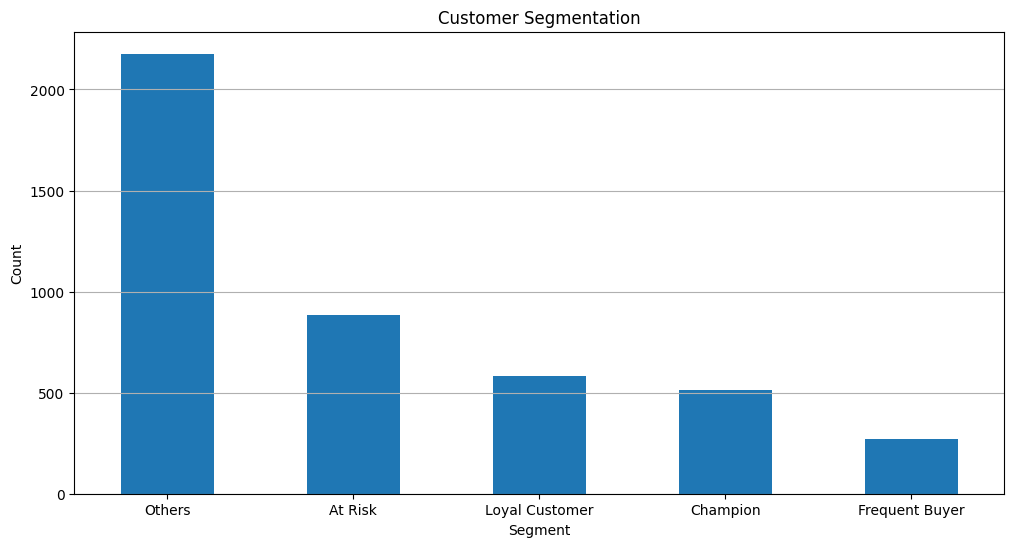

In [186]:
rfm['segment'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Customer Segmentation')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
#save the plot
plt.savefig('../reports/figures/segmentation.png')

The bar chart showing customer segment counts highlights that the majority of customers fall into the "Others" segment, which includes regular customers with moderate engagement. The "At Risk" segment has a significant count, suggesting that a notable portion of customers may be close to churning. In contrast, high-value segments such as "Champion" and "Frequent Buyer" are smaller in count, indicating fewer highly engaged customers. This distribution emphasizes the need to nurture high-value segments (Champions and Loyal Customers) while focusing retention efforts on the At-Risk segment. A proactive churn reduction strategy could involve personalized offers or loyalty rewards for at-risk customers to increase engagement and reduce churn.

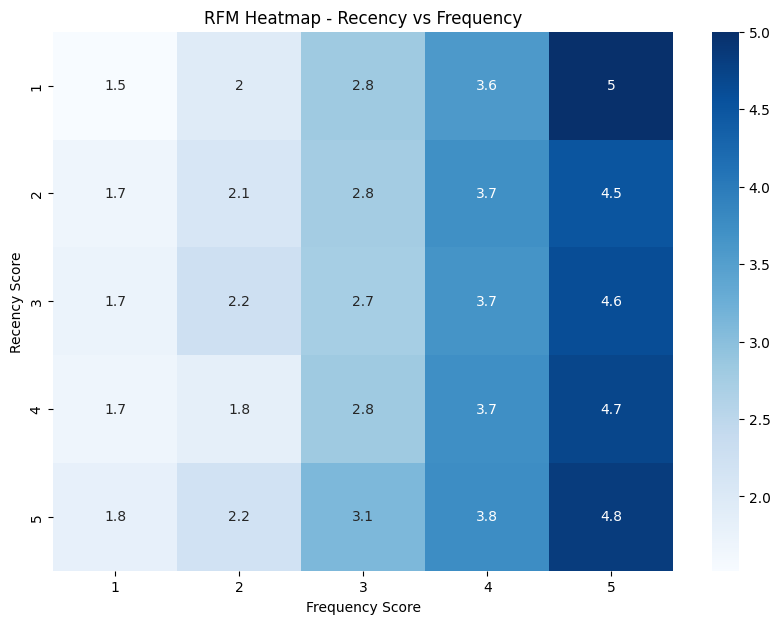

In [187]:
# Pivot table for Recency vs Frequency
rf_matrix = rfm.pivot_table(index='recency_score', columns='frequency_score', values='monetary_score', aggfunc='mean')

# Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(rf_matrix, annot=True, cmap='Blues')
plt.title('RFM Heatmap - Recency vs Frequency')
plt.xlabel('Frequency Score')
plt.ylabel('Recency Score')
#save the plot
plt.savefig('../reports/figures/heatmap.png')
plt.show()

1. High Recency and Frequency (Bottom Right of the Heatmap):

 - The values are higher in the bottom right, where both recency and frequency scores are high. This indicates that customers who purchased more recently and more frequently tend to have higher monetary value. These segments are likely your "best customers" and deserve focused marketing efforts.
2. Low Recency and High Frequency (Top Right):

- Customers with high frequency but low recency tend to still show higher monetary values. It may suggest that even if they haven't made a recent purchase, they have a history of frequent and high-value purchases. Consider targeted campaigns to re-engage this group.
3. High Recency and Low Frequency (Bottom Left):

- The lighter cells in this region show that customers who have purchased recently but infrequently have relatively lower monetary values. These customers could be new or need some incentive to make more frequent purchases.
4. Balanced Segments (Middle):

- The middle cells indicate segments with average scores. Their monetary values vary, so they might need more targeted campaigns based on additional factors beyond just RFM scores.

The heatmap shows that customers with high Recency and Frequency scores contribute the most to revenue (darker cells), making them priority targets for retention. Customers with high frequency but low recency scores still have substantial monetary value, suggesting they could benefit from re-engagement. In contrast, low recency and frequency customers show low monetary value, indicating a higher churn risk. This analysis helps prioritise loyalty for engaged customers and re-engagement for frequent but less recent buyers.

In [188]:
rfm_count = rfm.groupby('segment').size().reset_index(name='count')
rfm_count

,segment,count
0,At Risk,883
1,Champion,512
2,Frequent Buyer,269
3,Loyal Customer,580
4,Others,2177


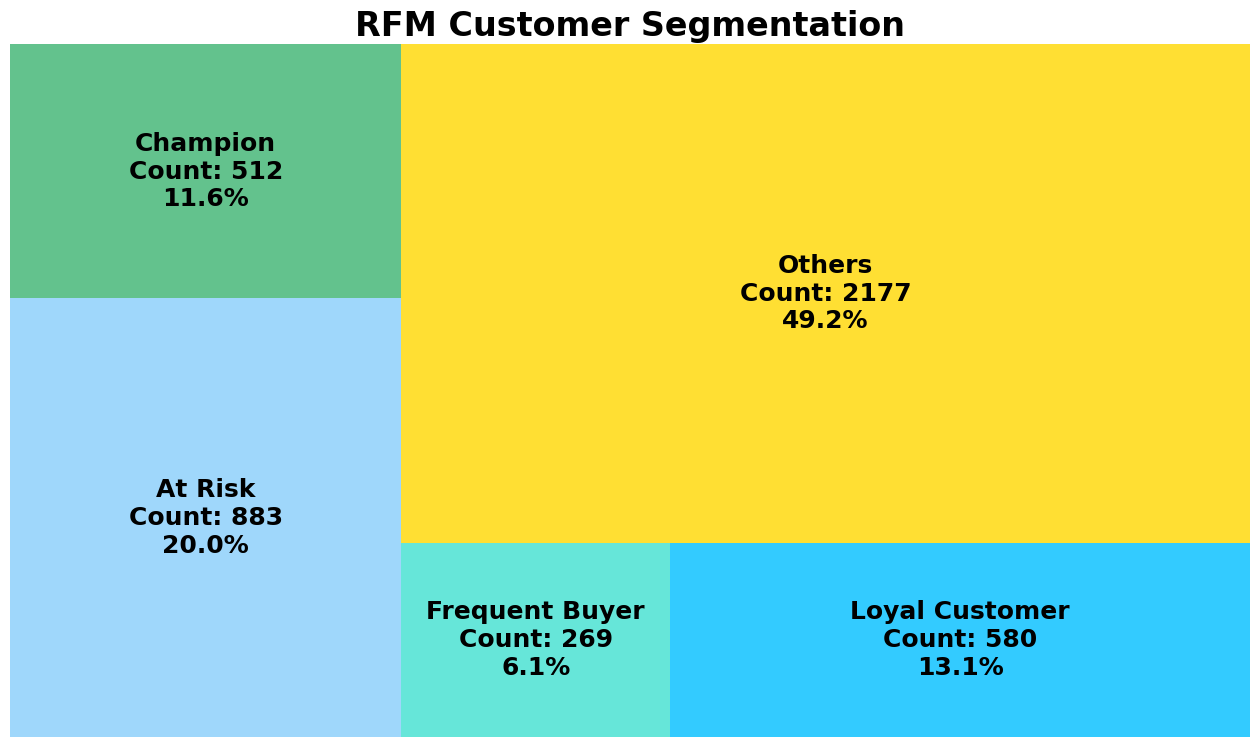

In [189]:
import squarify
# Calculate percentage for each segment
rfm_count['Percentage'] = (rfm_count['count'] / rfm_count['count'].sum()) * 100
rfm_count['Label'] = rfm_count['segment'] + "\nCount: " + rfm_count['count'].astype(str) + "\n" + rfm_count['Percentage'].round(1).astype(str) + '%'

# Define color palette to match the shared image
colors = ['#87CEFA', '#3CB371', '#40E0D0', '#00BFFF', '#FFD700']

# Plot Treemap
plt.figure(figsize=(16, 9))
squarify.plot(
    sizes=rfm_count['count'], 
    label=rfm_count['Label'], 
    color=colors, 
    alpha=0.8,
    text_kwargs={'fontsize': 18, 'weight': 'bold', 'color': 'black'}
)

plt.axis('off')
plt.title("RFM Customer Segmentation", fontsize=24, weight='bold')
#save the plot
plt.savefig('../reports/figures/treemap.png')
plt.show()

The treemap of customer segment counts shows that most customers fall into the "Others" category, which comprises nearly half of the customer base (49.2%). The "At Risk" segment also has a substantial portion at 20%, suggesting a notable number of customers may be close to churning. In contrast, high-value segments like "Champion" (11.6%) and "Frequent Buyer" (6.1%) are smaller, underscoring the importance of retaining these valuable customers. This distribution highlights the need to focus retention efforts on at-risk customers through loyalty programs or personalised offers to increase engagement and reduce churn.

### Quartile RFM

In [190]:
data['quarter'] = data['order_date'].dt.to_period("Q")
data['quarter']

0          2012Q2
1          2012Q1
2          2012Q2
3          2012Q2
4          2012Q1
            ...  
1988377    2013Q4
1988378    2013Q2
1988379    2013Q4
1988380    2013Q4
1988381    2013Q3
Name: quarter, Length: 1849971, dtype: period[Q-DEC]

In [191]:
# Reference date (for each quarter, you may update accordingly for your needs)
data['quarter_end_date'] = data['quarter'].dt.end_time
data['quarter_end_date'] = pd.to_datetime(data['quarter_end_date'].dt.date)
data['order_date'] = pd.to_datetime(data['order_date'])
data['quarter_end_date'] = pd.to_datetime(data['quarter_end_date'])
# Group by customer and quarter to calculate RFM metrics
quarterly_rfm = data.groupby(['customer_code', 'quarter', 'quarter_end_date']).agg({
    'order_date': lambda x: (data.loc[x.index, 'quarter_end_date'].iloc[0] - x.max()).days,  # Recency
    'customer_order_number': 'nunique',  # Frequency
    'value_sales': 'sum'  # Monetary
})

# Rename columns
quarterly_rfm.columns = ['recency', 'frequency', 'monetary']

# Display the quarterly RFM table
quarterly_rfm = quarterly_rfm.reset_index()
quarterly_rfm.round(2)


,customer_code,quarter,quarter_end_date,recency,frequency,monetary
0,100050100,2013Q2,2013-06-30,3,12,3947816.08
1,100050100,2013Q3,2013-09-30,8,8,606204.00
2,100050100,2013Q4,2013-12-31,12,10,281902.50
3,100210100,2012Q1,2012-03-31,18,3,5555.12
4,100210100,2012Q2,2012-06-30,25,4,7347.79
...,...,...,...,...,...,...
26073,ZI9000102,2013Q3,2013-09-30,0,28,188963.78
26074,ZI9000102,2013Q4,2013-12-31,28,22,30793.17
26075,ZI9000103,2013Q1,2013-03-31,65,1,658.66
26076,ZI9500101,2012Q4,2012-12-31,17,1,212.11


In [192]:
# Assign scores using quantiles
quarterly_rfm['recency_score'] = pd.qcut(quarterly_rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
quarterly_rfm['frequency_score'] = pd.qcut(quarterly_rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
quarterly_rfm['monetary_score'] = pd.qcut(quarterly_rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine the scores to create a composite RFM score
quarterly_rfm['RFM_score'] = quarterly_rfm['recency_score'].astype(str) + quarterly_rfm['frequency_score'].astype(str) + quarterly_rfm['monetary_score'].astype(str)

# Display the scored RFM table
quarterly_rfm


,customer_code,quarter,quarter_end_date,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_score
0,100050100,2013Q2,2013-06-30,3,12,3.947816e+06,5,3,5,535
1,100050100,2013Q3,2013-09-30,8,8,6.062040e+05,4,3,5,435
2,100050100,2013Q4,2013-12-31,12,10,2.819025e+05,3,3,5,335
3,100210100,2012Q1,2012-03-31,18,3,5.555120e+03,2,2,3,223
4,100210100,2012Q2,2012-06-30,25,4,7.347790e+03,2,2,3,223
...,...,...,...,...,...,...,...,...,...,...
26073,ZI9000102,2013Q3,2013-09-30,0,28,1.889638e+05,5,4,5,545
26074,ZI9000102,2013Q4,2013-12-31,28,22,3.079317e+04,1,4,5,145
26075,ZI9000103,2013Q1,2013-03-31,65,1,6.586650e+02,1,1,1,111
26076,ZI9500101,2012Q4,2012-12-31,17,1,2.121120e+02,2,1,1,211


In [193]:
quarterly_rfm = quarterly_rfm[quarterly_rfm['quarter_end_date'] >= '2012-01-01']

In [194]:
# Apply segmentation
quarterly_rfm['segment'] = quarterly_rfm['RFM_score'].apply(segment_customer)

In [195]:
quarterly_rfm['monetary_score'] = quarterly_rfm['monetary_score'].astype(int)
quarterly_rfm['frequency_score'] = quarterly_rfm['frequency_score'].astype(int)
quarterly_rfm['recency_score'] = quarterly_rfm['recency_score'].astype(int)

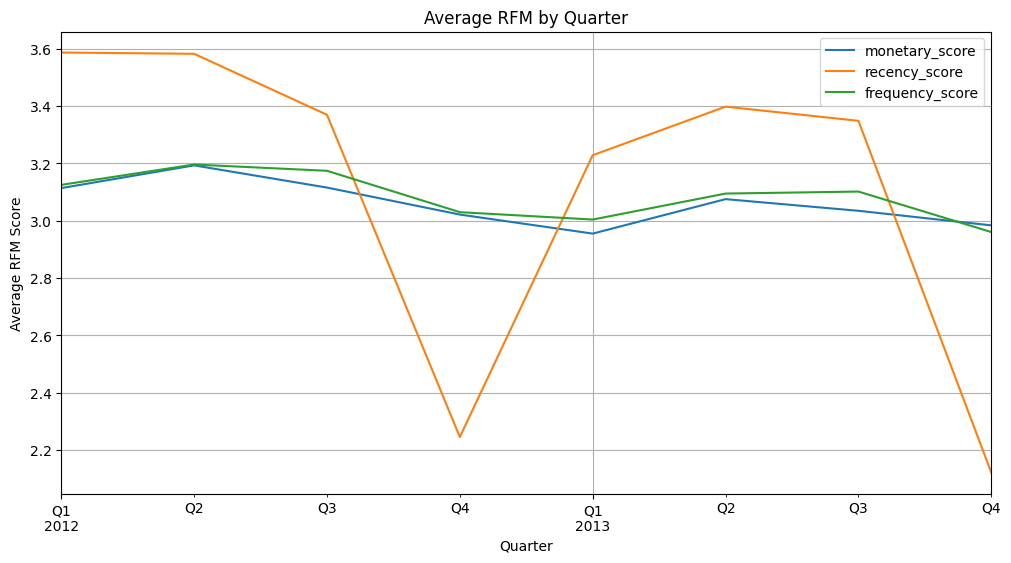

In [196]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import pandas as pd

#plot line chart for average monetary value
plt.figure(figsize=(12, 6))
quarterly_rfm.groupby('quarter_end_date')['monetary_score'].mean().plot(kind='line')
quarterly_rfm.groupby('quarter_end_date')['recency_score'].mean().plot(kind='line')
quarterly_rfm.groupby('quarter_end_date')['frequency_score'].mean().plot(kind='line')
plt.title('Average RFM by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average RFM Score')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend()
#save the plot
plt.savefig('../reports/figures/average_rfm_by_quarter.png')
plt.show()

The line chart of quarterly trends shows declining Monetary Value and Recency scores in Q1 2013 and Q4 2013, suggesting reduced spending and engagement during these periods. Meanwhile, Frequency remains relatively stable, though with a slight dip in Q1 2013, indicating consistent purchase patterns with occasional declines. These insights suggest that targeted re-engagement efforts, especially in Q1 and Q4, could help sustain customer engagement and spending.

In [197]:
#count the number of customers in each segment quarterly
segment_counts = quarterly_rfm.groupby(['quarter', 'segment']).size().unstack().fillna(0)
segment_counts = segment_counts.div(segment_counts.sum(axis=1), axis=0).round(2)
segment_counts

segment,At Risk,Champion,Frequent Buyer,Loyal Customer,Others
quarter,,,,,
2012Q1,0.16,0.14,0.02,0.29,0.39
2012Q2,0.16,0.17,0.02,0.27,0.38
2012Q3,0.19,0.14,0.05,0.19,0.43
2012Q4,0.24,0.00,0.19,0.00,0.56
2013Q1,0.18,0.09,0.07,0.12,0.54
2013Q2,0.17,0.14,0.05,0.17,0.47
2013Q3,0.18,0.11,0.07,0.18,0.46
2013Q4,0.26,0.00,0.17,0.00,0.56


<Figure size 1200x600 with 0 Axes>

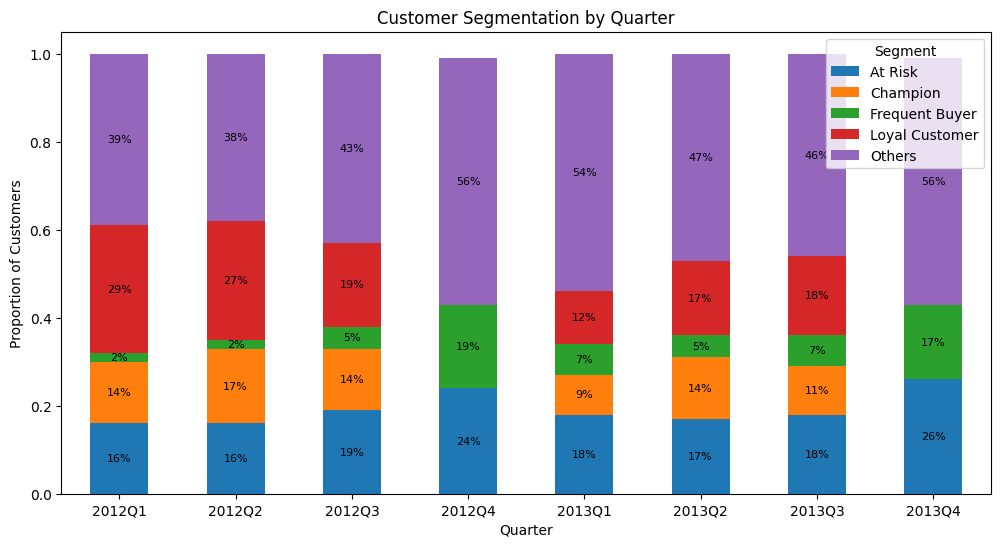

In [198]:
#plot the stacked bar chart
plt.figure(figsize=(12, 6))
segment_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Customer Segmentation by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=0)
plt.legend(title='Segment')
#show values on each bar
# Displaying values on each segment of the bar
for c in plt.gca().containers:
    # Add labels to each segment in the stack
    labels = [f"{v.get_height() * 100:.0f}%" if v.get_height() > 0.01 else '' for v in c]  # Only show if > 5%
    plt.gca().bar_label(c, labels=labels, label_type='center', fontsize=8)
#save the plot
plt.savefig('../reports/figures/customer_segmentation_by_quarter.png')
plt.show()

The chart of Customer Segmentation by Quarter reveals engagement shifts, with "Others" peaking in Q4 of 2012 and 2013, indicating reduced engagement toward year-end. The "At Risk" segment also grows in these quarters, suggesting seasonal disengagement and a higher likelihood of churn. High-value segments like "Champion" and "Loyal Customer" are more prominent in early quarters but decline over time, indicating a need for consistent retention efforts.

In summary, the data reveals trends that could benefit from targeted interventions. For example, focusing on converting "Others" and "At Risk" customers into more loyal segments could improve retention and engagement, while the fluctuations in more loyal segments like "Champion" and "Frequent Buyer" might highlight areas to stabilize customer relationships.

#### Key note

This Jupyter Notebook performs an RFM (Recency, Frequency, Monetary) analysis on customer data to segment customers based on their purchasing behaviors. The analysis includes the following steps:

1. **Data Loading and Preparation**:
    - The dataset is loaded and initial data types are fixed.
    - Negative sales values are removed to focus on gross sales.

2. **RFM Metric Calculation**:
    - Recency is calculated as the number of days since the last purchase.
    - Frequency is calculated as the number of unique orders.
    - Monetary is calculated as the total sales value.

3. **RFM Scoring**:
    - Scores for recency, frequency, and monetary are assigned using quantiles.
    - A composite RFM score is created by combining the individual scores.

4. **Customer Segmentation**:
    - Customers are segmented based on their RFM scores into categories such as Champion, Loyal Customer, Frequent Buyer, At Risk, and Others.

5. **Visualization**:
    - The distribution of customer segments is visualized using bar charts.
    - Trends in average RFM scores by quarter are plotted to identify patterns over time.

6. **Insights**:
    - The data reveals trends such as stable but slightly declining monetary and frequency metrics, and seasonal fluctuations in recency scores.
    - Targeted interventions can be designed to improve customer retention and engagement, especially for segments like "At Risk" and "Others".

The analysis provides valuable insights into customer behavior, helping businesses tailor their marketing strategies to different customer segments.